<p style="color:#008bcb; font-family:Arial; font-size:19px;"> Notebook Information </p>

<table style="color:rgb(88,89,91); font-family:Arial; float:left; font-size:13px; text-align:left;">
<tr>
<td style="color:#008BCB;font-size:14px; text-align:left;"><b>Data Migration</b></td>
<td style="text-align:left;">Exploratory Data Analysis and Automated ETL pipeline for Aims Data </td>
</tr>
<tr>
<td style="color:#008BCB;font-size:13px; text-align:left;"><b>Author</b></td>
<td style="text-align:left;">Sanmi Ibitoye</td>
</tr>
<tr>
<td style="color:#008BCB;font-size:13px; text-align:left;"><b>Email</b></td>
<td style="text-align:left;">Sanmi.Ibitoye@hs2.org.uk</td>
</tr>
<tr>
<td style="color:#008BCB;font-size:13px; text-align:left;"><b>Summary</b></td>
<td style="text-align:left;">

This notebook can be used as an example of all future etl, tools and infrastructure deployable in relation to AIMS Data. <br>

</td>
</tr>
<tr>
<td style="color:#008BCB;font-size:13px; text-align:left;"><b>Date</b></td>
<td style="text-align:left;">Last Updated: 05 - 07 - 2025</td>
</tr>

<!-- <td style="text-align:left;">Re-created: 13 - 01 - 2025 </td> -->
</tr>

</table>


In [1]:
import os
import re
import shutil
import pandas as pd
import logging
from typing import Union
from pyspark.sql import SparkSession
# from delta import configure_spark_with_delta_pip
from delta.tables import DeltaTable

StatementMeta(, 27d0dfbd-8a03-4b5b-84fd-990ce7ace221, 3, Finished, Available, Finished)

In [3]:
directory_path: str = "/lakehouse/default/Files"  # Set this to your Fabric workspace folder

# delta_table_path: str = "/lakehouse/default/Files/audit_log_delta_table"  # Microsoft Fabric Delta Table Path



StatementMeta(, f9c16098-10b3-493b-9400-31edae36405a, 4, Finished, Available, Finished)

In [4]:
directory = os.fspath(directory_path)
print(directory)

StatementMeta(, f9c16098-10b3-493b-9400-31edae36405a, 5, Finished, Available, Finished)

/lakehouse/default/Files


In [5]:


# Define path to OneLake Files folder
base_path = "/lakehouse/default/Files"

StatementMeta(, f9c16098-10b3-493b-9400-31edae36405a, 6, Finished, Available, Finished)

In [2]:
from notebookutils import mssparkutils

def list_files_recursive(path):
    files = []
    items = mssparkutils.fs.ls(path)
    for item in items:
        if item.isDir:
            files.extend(list_files_recursive(item.path))  # Recurse into folder
        else:
            files.append(item)
    return files

# Run it on your OneLake 'Files' folder
all_files = list_files_recursive("Files")

# Filter to CSV and CSV.GZ files
csv_files = [f.path for f in all_files if f.path.endswith(".csv") or f.path.endswith(".csv.gz")]

print("Discovered CSV/GZ files:")
for path in csv_files:
    print(path)



StatementMeta(, 27d0dfbd-8a03-4b5b-84fd-990ce7ace221, 4, Finished, Available, Finished)

Discovered CSV/GZ files:
abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetAttributes.csv.gz
abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetClassAttributes.csv
abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetClassChangeLogs.csv
abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetClassRelationships.csv
abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetClasses.csv
abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetHierarchyMap.csv.gz
abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8

In [3]:
# Sample preview of the first 5 lines of each file
for path in csv_files[:5]:  # limit to first 5 to avoid flooding
    print(f"\n🔍 Inspecting: {path}")
    lines = spark.read.text(path).limit(5).collect()
    for line in lines:
        print(line.value)


StatementMeta(, 27d0dfbd-8a03-4b5b-84fd-990ce7ace221, 5, Finished, Available, Finished)


🔍 Inspecting: abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetAttributes.csv.gz

"ID","ASSET","ATTRIBUTE","TEXTVALUE","NUMERICVALUE","DATEVALUE","DECIMALVALUE2DP","SELECTIONVALUE","LOCATION","VALIDFROM","VALIDTO","KINO_CSID","HS2_KINO_CUID","KINO_CWHEN","KINO_USID","KINO_UUID","KINO_UWHEN","BASEDON","OWNER","PHASE","PERSON","ORGANISATION","TEXTSTOREFORTYPETRANSITION","DECIMALSTOREFORTYPETRANSITION","NUMERICSTOREFORTYPETRANSITION","STARTCHAINAGE","ENDCHAINAGE","NUMERICENDVALUE","DECIMALENDVALUE2DP","ISBEINGSPLIT","SPLITATCHAINAGE","AFTERNUMERICSTARTVALUE","AFTERNUMERICENDVALUE","AFTERDECIMALSTARTVALUE2DP","AFTERDECIMALENDVALUE2DP","AFTERTEXTVALUE","AFTERDATEVALUE","AFTERSELECTIONVALUE","ROUTE","DECIMALVALUE3DP","DECIMALENDVALUE3DP","AFTERDECIMALSTARTVALUE3DP","AFTERDECIMALENDVALUE3DP","COPIEDFROM","ASSETCLASS","DECIMALENDSTOREFORTYPETRANS","NUMERICENDSTOREFORTYPETRANS","DECIMALVALUE4DP","CONSTRAINTOGROUP","AD

In [5]:
display(lines)

StatementMeta(, 27d0dfbd-8a03-4b5b-84fd-990ce7ace221, 7, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 275415ad-548a-4dd6-94c8-8487548fe759)

In [6]:
# for file_path in csv_files:
#     print(f"Loading {file_path}...")
#     df = spark.read.option("header", True).csv(file_path)
    
#     # Display preview
#     df.show(2)

def detect_header_and_read(path):
    # Read first N lines to detect header
    lines = spark.read.text(path).rdd.map(lambda r: r[0]).zipWithIndex()
    preview_lines = lines.take(10)

    # Find the line with the most commas and quote-wrapped tokens
    def score(line):
        raw = line[0]
        return raw.count(",") if '"' in raw and raw.count(",") > 2 else 0

    header_line = max(preview_lines, key=score)
    header_index = header_line[1]
    header_fields = [col.strip().strip('"') for col in header_line[0].split(",")]

    print(f"📌 Detected header at line {header_index}: {header_fields}")

    # Filter data lines (after the header)
    data_lines = lines.filter(lambda r: r[1] > header_index).map(lambda r: r[0])

    # Load into DataFrame
    df = spark.read.csv(data_lines, header=False)
    df = df.toDF(*header_fields)
    return df


# for path in csv_files[:5]:
#     try:
#         print(f"\n🔍 Inspecting: {path}")
#         df = detect_header_and_read(path)
#         df.printSchema()
#         df.show(3)
#     except Exception as e:
#         print(f"❌ Failed on {path}: {e}")


StatementMeta(, 27d0dfbd-8a03-4b5b-84fd-990ce7ace221, 8, Finished, Available, Finished)

In [7]:
success_files = []
failure_files = []

for path in csv_files:
    try:
        print(f"\n🔍 Inspecting: {path}")
        df = detect_header_and_read(path)
        schema = df.schema.simpleString()
        success_files.append({"path": path, "schema": schema})
        print(f"✅ Success: {path}")
    except Exception as e:
        failure_files.append({"path": path, "error": str(e)})
        print(f"❌ Failed: {path} — {e}")



StatementMeta(, 27d0dfbd-8a03-4b5b-84fd-990ce7ace221, 9, Finished, Available, Finished)


🔍 Inspecting: abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetAttributes.csv.gz
📌 Detected header at line 1: ['ID', 'ASSET', 'ATTRIBUTE', 'TEXTVALUE', 'NUMERICVALUE', 'DATEVALUE', 'DECIMALVALUE2DP', 'SELECTIONVALUE', 'LOCATION', 'VALIDFROM', 'VALIDTO', 'KINO_CSID', 'HS2_KINO_CUID', 'KINO_CWHEN', 'KINO_USID', 'KINO_UUID', 'KINO_UWHEN', 'BASEDON', 'OWNER', 'PHASE', 'PERSON', 'ORGANISATION', 'TEXTSTOREFORTYPETRANSITION', 'DECIMALSTOREFORTYPETRANSITION', 'NUMERICSTOREFORTYPETRANSITION', 'STARTCHAINAGE', 'ENDCHAINAGE', 'NUMERICENDVALUE', 'DECIMALENDVALUE2DP', 'ISBEINGSPLIT', 'SPLITATCHAINAGE', 'AFTERNUMERICSTARTVALUE', 'AFTERNUMERICENDVALUE', 'AFTERDECIMALSTARTVALUE2DP', 'AFTERDECIMALENDVALUE2DP', 'AFTERTEXTVALUE', 'AFTERDATEVALUE', 'AFTERSELECTIONVALUE', 'ROUTE', 'DECIMALVALUE3DP', 'DECIMALENDVALUE3DP', 'AFTERDECIMALSTARTVALUE3DP', 'AFTERDECIMALENDVALUE3DP', 'COPIEDFROM', 'ASSETCLASS', 'DECIMALENDSTOREFORTYPETRA

In [10]:
print("\n📊 Summary of File Inspection")

print(f"\n✅ {len(success_files)} Files Parsed Successfully:")
for f in success_files:
    print(f" - {f['path']}\n   Schema: {f['schema']}")

print(f"\n❌ {len(failure_files)} Files Failed:")
for f in failure_files:
    print(f" - {f['path']}\n   Error: {f['error']}")


StatementMeta(, f9c16098-10b3-493b-9400-31edae36405a, 11, Finished, Available, Finished)


📊 Summary of File Inspection

✅ 22 Files Parsed Successfully:
 - abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetAttributes.csv.gz
   Schema: struct<ID:string,ASSET:string,ATTRIBUTE:string,TEXTVALUE:string,NUMERICVALUE:string,DATEVALUE:string,DECIMALVALUE2DP:string,SELECTIONVALUE:string,LOCATION:string,VALIDFROM:string,VALIDTO:string,KINO_CSID:string,HS2_KINO_CUID:string,KINO_CWHEN:string,KINO_USID:string,KINO_UUID:string,KINO_UWHEN:string,BASEDON:string,OWNER:string,PHASE:string,PERSON:string,ORGANISATION:string,TEXTSTOREFORTYPETRANSITION:string,DECIMALSTOREFORTYPETRANSITION:string,NUMERICSTOREFORTYPETRANSITION:string,STARTCHAINAGE:string,ENDCHAINAGE:string,NUMERICENDVALUE:string,DECIMALENDVALUE2DP:string,ISBEINGSPLIT:string,SPLITATCHAINAGE:string,AFTERNUMERICSTARTVALUE:string,AFTERNUMERICENDVALUE:string,AFTERDECIMALSTARTVALUE2DP:string,AFTERDECIMALENDVALUE2DP:string,AFTERTEXTVALUE:string,AFTERDATEVALUE:str

In [15]:
parsed_dfs = {}
failures = []

for path in csv_files:
    try:
        print(f"\n🔍 Inspecting: {path}")
        df = detect_header_and_read(path)
        df.cache()  # Optional: Speeds up repeated access
        parsed_dfs[path] = df
        print(f"✅ Success: {path}")
    except Exception as e:
        failures.append({"path": path, "error": str(e)})
        print(f"❌ Failed: {path} — {e}")


StatementMeta(, a2ee9435-480d-48df-80db-e07c1c20da38, 17, Finished, Available, Finished)


🔍 Inspecting: abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetAttributes.csv.gz
📌 Detected header at line 1: ['ID', 'ASSET', 'ATTRIBUTE', 'TEXTVALUE', 'NUMERICVALUE', 'DATEVALUE', 'DECIMALVALUE2DP', 'SELECTIONVALUE', 'LOCATION', 'VALIDFROM', 'VALIDTO', 'KINO_CSID', 'HS2_KINO_CUID', 'KINO_CWHEN', 'KINO_USID', 'KINO_UUID', 'KINO_UWHEN', 'BASEDON', 'OWNER', 'PHASE', 'PERSON', 'ORGANISATION', 'TEXTSTOREFORTYPETRANSITION', 'DECIMALSTOREFORTYPETRANSITION', 'NUMERICSTOREFORTYPETRANSITION', 'STARTCHAINAGE', 'ENDCHAINAGE', 'NUMERICENDVALUE', 'DECIMALENDVALUE2DP', 'ISBEINGSPLIT', 'SPLITATCHAINAGE', 'AFTERNUMERICSTARTVALUE', 'AFTERNUMERICENDVALUE', 'AFTERDECIMALSTARTVALUE2DP', 'AFTERDECIMALENDVALUE2DP', 'AFTERTEXTVALUE', 'AFTERDATEVALUE', 'AFTERSELECTIONVALUE', 'ROUTE', 'DECIMALVALUE3DP', 'DECIMALENDVALUE3DP', 'AFTERDECIMALSTARTVALUE3DP', 'AFTERDECIMALENDVALUE3DP', 'COPIEDFROM', 'ASSETCLASS', 'DECIMALENDSTOREFORTYPETRA

In [11]:
print("\n📈 Summary of Parsing")

print(f"\n✅ {len(parsed_dfs)} Files Parsed Successfully:")
for path in parsed_dfs:
    print(f" - {path}")

print(f"\n❌ {len(failures)} Files Failed:")
for f in failures:
    print(f" - {f['path']} | Error: {f['error']}")


StatementMeta(, f9c16098-10b3-493b-9400-31edae36405a, 12, Finished, Available, Finished)


📈 Summary of Parsing


NameError: name 'parsed_dfs' is not defined

In [12]:
# To access the DataFrame from a specific file:
some_df = parsed_dfs['abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetAttributes.csv.gz']
some_df.printSchema()
some_df.show()


StatementMeta(, f9c16098-10b3-493b-9400-31edae36405a, 13, Finished, Available, Finished)

NameError: name 'parsed_dfs' is not defined

In [22]:
display(some_df)

StatementMeta(, a2ee9435-480d-48df-80db-e07c1c20da38, 24, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, cc57c279-ef09-44f8-9289-ffc06a97d1e7)

In [13]:
# To access the DataFrame from a specific file:
some_df2 = parsed_dfs['abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetClassAttributes.csv']
some_df2.printSchema()
some_df2.show()


StatementMeta(, f9c16098-10b3-493b-9400-31edae36405a, 14, Finished, Available, Finished)

NameError: name 'parsed_dfs' is not defined

In [25]:
display(some_df2)

StatementMeta(, a2ee9435-480d-48df-80db-e07c1c20da38, 27, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 5f7787c2-7ecf-4233-9eeb-99c7b2a2b0c9)

In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType
from pyspark.sql.functions import col, lit, regexp_extract, udf
from pyspark.sql.types import BooleanType

# Initialize SparkSession (if not already initialized in your environment)
spark = SparkSession.builder.appName("FabricDataLakeLoader").getOrCreate()

# Define the base path to your data lake files
# This will likely be something like 'abfss://<container_name>@<storage_account_name>.dfs.core.windows.net/Items/AimsDataFromBlob2025/'
# or just '/Items/AimsDataFromBlob2025/' if running within Fabric/Synapse context
base_path = "abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/"

# List of files to process
files_to_process =  [
    "AssetAttributes.csv.gz",
    "AssetClassAttributes.csv",
    "AssetClassChangeLogs.csv",
    "AssetClassRelationships.csv",
    "AssetClasses.csv",
    "AssetHierarchyMap.csv",
    "AssetLocations.csv.gz",
    "AssetStatuses.csv",
    "Assets.csv.gz",
    "AttributeDomainValues.csv",
    "AttributeDomains.csv",
    "AttributeGroups.csv",
    "Attributes.csv",
    "ChainageBaselines.csv",
    "LinkTypes.csv",
    "Links.csv",
    "Organisations.csv",
    "Owners.csv",
    "People.csv",
    "Phases.csv",
    "RelationshipTypes.csv",
    "Relationships.csv.gz",
    "Routes.csv",
    "SecondaryAssetClassCodes.csv",
    "SecondaryCodingSystems.csv",
    "Stages.csv",
    "Tracks.csv",
    "Users.csv"
]

# I'm selecting a few that haven't failed just to confirm that the logic I'm attempting to implement in the helper function works.

# [
#     "AssetAttributes.csv.gz",
#     "AssetClassAttributes.csv",
#     "AssetClassChangeLogs.csv",
#     "AssetClassRelationships.csv",
#     "AssetClasses.csv",
#     "AssetHierarchyMap.csv",
#     "AssetLocations.csv.gz",
#     "AssetStatuses.csv",
#     "Assets.csv.gz",
#     "AttributeDomainValues.csv",
#     "AttributeDomains.csv",
#     "AttributeGroups.csv",
#     "Attributes.csv",
#     "ChainageBaselines.csv",
#     "LinkTypes.csv",
#     "Links.csv",
#     "Organisations.csv",
#     "Owners.csv",
#     "People.csv",
#     "Phases.csv",
#     "RelationshipTypes.csv",
#     "Relationships.csv.gz",
#     "Routes.csv",
#     "SecondaryAssetClassCodes.csv",
#     "SecondaryCodingSystems.csv",
#     "Stages.csv",
#     "Tracks.csv",
#     "Users.csv"
# ]

# --- Helper functions ---

# This function's main goal is to look through a defined length of rows and satisfy the defined logic
def find_header_row_and_delimiter(file_path, spark_session, max_rows_to_check=20, allowable_delimiters=[',', '|', '\t', ';']):
    """
    Attempts to find the header row and its delimiter within the first `max_rows_to_check` rows.
    Ignores rows containing problematic characters like '>', '*', ';'.

    Returns a tuple: (header_row_index, detected_delimiter)
    """
    try:
        # Read the file as plain text to inspect lines
        rdd = spark_session.sparkContext.textFile(file_path).zipWithIndex()
        
        # Filter for the first max_rows_to_check and exclude problematic lines
        lines_to_check = rdd.filter(lambda x: x[1] < max_rows_to_check).map(lambda x: x[0]).collect()

        for i, line in enumerate(lines_to_check):
            # Skip rows with problematic characters
            if any(char in line for char in ['>', '*', ';']):
                continue

            # Try to infer delimiter and check if it's a plausible header
            for delimiter in allowable_delimiters:
                if delimiter in line:
                    if len(line.split(delimiter)) > 1:
                        return i, delimiter
        return None, None 
    except Exception as e:
        print(f"Error finding header/delimiter for {file_path}: {e}")
        return None, None


def validate_and_load_csv(file_name, base_path, spark_session):
    full_file_path = f"{base_path}{file_name}"
    table_name = file_name.replace(".csv", "").replace(".gz", "").replace("-", "_").lower() 

    print(f"\n--- Processing {file_name} ---")

    header_index, detected_delimiter = find_header_row_and_delimiter(full_file_path, spark_session)

    if header_index is None:
        print(f"WARNING: Could not determine a valid header row or delimiter for {file_name}. Skipping.")
        return

    print(f"Detected header on row: {header_index + 1}, with delimiter: '{detected_delimiter}'")

    try:
        # Read the entire file as text lines
        lines_rdd = spark_session.sparkContext.textFile(full_file_path)
        
        # Get the lines from the header onwards
        data_lines_rdd = lines_rdd.zipWithIndex().filter(lambda x: x[1] >= header_index).map(lambda x: x[0])
        
        # Now parse this RDD of strings as CSV.
        df = spark_session.read.option("header", "true") \
                               .option("inferSchema", "true") \
                               .option("delimiter", detected_delimiter) \
                               .csv(data_lines_rdd) 

        print(f"Schema for {file_name} (inferred from header onward):")
        df.printSchema()

        # --- Schema Validation ---
        if not all(col_name for col_name in df.columns):
            print(f"ERROR: Schema for {file_name} contains empty column names. Review header.")
            return

        # --- Load into Data Lake Table (Delta Lake recommended for schema enforcement) ---
        
        # Write to Delta Lake table
        df.write.format("delta") \
            .mode("overwrite") \
            .saveAsTable(table_name) # This creates a managed table in Fabric's metastore

        print(f"Successfully loaded {file_name} into Delta table '{table_name}'")

    except Exception as e:
        print(f"ERROR processing {file_name}: {e}")

# --- Main execution loop ---
for file_name in files_to_process:
    validate_and_load_csv(file_name, base_path, spark)

print("\n--- All files processed ---")

StatementMeta(, f9c16098-10b3-493b-9400-31edae36405a, 16, Finished, Available, Finished)


--- Processing AssetAttributes.csv.gz ---
Detected header on row: 2, with delimiter: ','
Schema for AssetAttributes.csv.gz (inferred from header onward):
root
 |-- ID: string (nullable = true)
 |-- ASSET: string (nullable = true)
 |-- ATTRIBUTE: string (nullable = true)
 |-- TEXTVALUE: string (nullable = true)
 |-- NUMERICVALUE: string (nullable = true)
 |-- DATEVALUE: string (nullable = true)
 |-- DECIMALVALUE2DP: string (nullable = true)
 |-- SELECTIONVALUE: string (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- VALIDFROM: string (nullable = true)
 |-- VALIDTO: string (nullable = true)
 |-- KINO_CSID: string (nullable = true)
 |-- HS2_KINO_CUID: string (nullable = true)
 |-- KINO_CWHEN: string (nullable = true)
 |-- KINO_USID: string (nullable = true)
 |-- KINO_UUID: string (nullable = true)
 |-- KINO_UWHEN: string (nullable = true)
 |-- BASEDON: string (nullable = true)
 |-- OWNER: string (nullable = true)
 |-- PHASE: string (nullable = true)
 |-- PERSON: string (nul

# The section below is to demonstrate a few points.
1. Without proper inspection of the source files, it is unsafe to assume they can be loaded into a table.
2. Even where the schema validation failed, it was still possible to load the file into a table.
3. Where a schema validation is not enforced as in the below example, a manual inspection of the source file is required to understand the best way to load the files correctly. Otherwise, the load will be successful but the shcema would be invalid.
4. **IMPORTANT**: To write the files into tables within a schemad other than the default schema, such schema must already exist in your Microsoft Fabric Lakehouse. If it doesn't exist, you'll need to create it (e.g., using a SQL query in a Fabric SQL endpoint: CREATE DATABASE YourCustomSchema;)


In [1]:
%%sql
--CREATE DATABASE aims_dbo;
--CREATE DATABASE experimental_aims_dbo;
-- CREATE DATABASE experimental_aims_dbo2;

-- THIS IS NECCESSARY ONLY ONCE. SEE BELOW FOR WHY

StatementMeta(, 18cedd2e-b53e-4962-8cbd-cdbf56eb66c7, 2, Finished, Available, Finished)

<Spark SQL result set with 0 rows and 0 fields>

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType
from pyspark.sql.functions import col, lit, regexp_extract, udf
from pyspark.sql.types import BooleanType

# Initialize SparkSession (if not already initialized in your environment)
spark = SparkSession.builder.appName("FabricDataLakeLoader").getOrCreate()

# Define the base path to your data lake files
base_path = "abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/"

# I define a target schema (database) name where to write the tables.
# IMPORTANT: This schema must already exist in your Microsoft Fabric Lakehouse.
# If it doesn't exist, you'll need to create it (e.g., using a SQL query in a Fabric SQL endpoint: CREATE DATABASE YourCustomSchema;)
target_schema_name = "aims_dbo" # <--- **REPLACE THIS WITH YOUR ACTUAL SCHEMA NAME**

# List of files to process (from your image)
files_to_process = [
    "AssetAttributes.csv.gz",
    "AssetClassAttributes.csv",
    "AssetClassChangeLogs.csv",
    "AssetClassRelationships.csv",
    "AssetClasses.csv",
    "AssetHierarchyMap.csv",
    "AssetLocations.csv.gz",
    "AssetStatuses.csv",
    "Assets.csv.gz",
    "AttributeDomainValues.csv",
    "AttributeDomains.csv",
    "AttributeGroups.csv",
    "Attributes.csv",
    "ChainageBaselines.csv",
    "LinkTypes.csv",
    "Links.csv",
    "Organisations.csv",
    "Owners.csv",
    "People.csv",
    "Phases.csv",
    "RelationshipTypes.csv",
    "Relationships.csv.gz",
    "Routes.csv",
    "SecondaryAssetClassCodes.csv",
    "SecondaryCodingSystems.csv",
    "Stages.csv",
    "Tracks.csv",
    "Users.csv",
    "raw_source_data_aims2025" 
]

# --- Helper functions ---

# This function's main goal is to look through a defined length of rows and satisfy the defined logic
def find_header_row_and_delimiter(file_path, spark_session, max_rows_to_check=20, allowable_delimiters=[',', '|', '\t', ';']):
    """
    Attempts to find the header row and its delimiter within the first `max_rows_to_check` rows.
    Ignores rows containing problematic characters like '>', '*', ';'.

    Returns a tuple: (header_row_index, detected_delimiter)
    """
    try:
        # Read the file as plain text to inspect lines
        rdd = spark_session.sparkContext.textFile(file_path).zipWithIndex()
        
        # Filter for the first max_rows_to_check and exclude problematic lines
        lines_to_check = rdd.filter(lambda x: x[1] < max_rows_to_check).map(lambda x: x[0]).collect()

        for i, line in enumerate(lines_to_check):
            # Skip rows with problematic characters
            if any(char in line for char in ['>', '*', ';']):
                continue

            # Try to infer delimiter and check if it's a plausible header
            for delimiter in allowable_delimiters:
                if delimiter in line:
                    if len(line.split(delimiter)) > 1:
                        return i, delimiter
        return None, None 
    except Exception as e:
        print(f"Error finding header/delimiter for {file_path}: {e}")
        return None, None


def validate_and_load_csv(file_name, base_path, spark_session, target_schema):
    """
    Validates the schema of a CSV file, loads it into a Delta Lake table
    within the specified schema, and returns True on success, False on failure.
    """
    full_file_path = f"{base_path}{file_name}"
    table_name = file_name.replace(".csv", "").replace(".gz", "").replace("-", "_").lower() 
    full_table_name = f"{target_schema}.{table_name}"

    print(f"\n--- Processing {file_name} ---")

    header_index, detected_delimiter = find_header_row_and_delimiter(full_file_path, spark_session)

    if header_index is None:
        print(f"WARNING: Could not determine a valid header row or delimiter for {file_name}. Skipping.")
        return False # Mark as failed

    print(f"Detected header on row: {header_index + 1}, with delimiter: '{detected_delimiter}'")

    try:
        # Read the entire file as text lines
        lines_rdd = spark_session.sparkContext.textFile(full_file_path)
        
        # Get the lines from the header onwards
        data_lines_rdd = lines_rdd.zipWithIndex().filter(lambda x: x[1] >= header_index).map(lambda x: x[0])
        
        # Now parse this RDD of strings as CSV.
        df = spark_session.read.option("header", "true") \
                               .option("inferSchema", "true") \
                               .option("delimiter", detected_delimiter) \
                               .csv(data_lines_rdd) 

        print(f"Schema for {file_name} (inferred from header onward):")
        df.printSchema()

        # --- Schema Validation ---
        # Current validation: ensure no empty column names
        if not all(col_name for col_name in df.columns):
            print(f"ERROR: Schema for {file_name} contains empty column names. Skipping this file.")
            return False # Mark as failed

        # You can add more specific schema validation here if needed, e.g.:
        # expected_schema = StructType([
        #     StructField("ID", StringType(), True),
        #     StructField("NAME", StringType(), True)
        # ])
        # if not df.schema == expected_schema:
        #    print(f"ERROR: Schema for {file_name} does not match expected schema. Skipping this file.")
        #    return False

        # --- Load into Data Lake Table (Delta Lake recommended for schema enforcement) ---
        
        # Write to Delta Lake table within the specified target_schema
        df.write.format("delta") \
            .mode("overwrite") \
            .saveAsTable(full_table_name) # This creates a managed table in Fabric's metastore

        print(f"Successfully loaded {file_name} into Delta table '{full_table_name}'")
        return True # Mark as successful

    except Exception as e:
        print(f"ERROR processing {file_name}: {e}")
        return False # Mark as failed

# --- Main execution loop ---
failed_files = [] # List to store names of files that failed processing

for file_name in files_to_process:
    # Pass the target_schema_name to the validation and load function
    if not validate_and_load_csv(file_name, base_path, spark, target_schema_name):
        failed_files.append(file_name)

print("\n--- All files processed ---")

if failed_files:
    print("\n--- Failed Files ---")
    for f in failed_files:
        print(f"- {f}")
else:
    print("\nAll files processed successfully!")

StatementMeta(, 25dd1193-a060-4c4e-b9f4-87f5d4e7bdb9, 13, Finished, Available, Finished)


--- Processing AssetAttributes.csv.gz ---
Detected header on row: 2, with delimiter: ','
Schema for AssetAttributes.csv.gz (inferred from header onward):
root
 |-- ID: string (nullable = true)
 |-- ASSET: string (nullable = true)
 |-- ATTRIBUTE: string (nullable = true)
 |-- TEXTVALUE: string (nullable = true)
 |-- NUMERICVALUE: string (nullable = true)
 |-- DATEVALUE: string (nullable = true)
 |-- DECIMALVALUE2DP: string (nullable = true)
 |-- SELECTIONVALUE: string (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- VALIDFROM: string (nullable = true)
 |-- VALIDTO: string (nullable = true)
 |-- KINO_CSID: string (nullable = true)
 |-- HS2_KINO_CUID: string (nullable = true)
 |-- KINO_CWHEN: string (nullable = true)
 |-- KINO_USID: string (nullable = true)
 |-- KINO_UUID: string (nullable = true)
 |-- KINO_UWHEN: string (nullable = true)
 |-- BASEDON: string (nullable = true)
 |-- OWNER: string (nullable = true)
 |-- PHASE: string (nullable = true)
 |-- PERSON: string (nul

In [12]:
df = spark.sql("SELECT * FROM AimsDataFromBlob2025.aims_dbo.assetclasses LIMIT 1000")
display(df)

StatementMeta(, 25dd1193-a060-4c4e-b9f4-87f5d4e7bdb9, 14, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, dde8b0ec-7207-4c0d-a735-cc5c5a65bba4)

# EXPERIMENT Z

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType
from pyspark.sql.functions import col, lit, regexp_extract, udf
from pyspark.sql.types import BooleanType

# Initialize SparkSession (if not already initialized in your environment)
spark = SparkSession.builder.appName("FabricDataLakeLoader").getOrCreate()

# Define the base path to your data lake files
base_path = "abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/"

# Define the target schema (database) name where you want to write the tables
# IMPORTANT: This schema must already exist in your Microsoft Fabric Lakehouse.
# If it doesn't exist, you'll need to create it (e.g., using a SQL query in a Fabric SQL endpoint: CREATE DATABASE YourCustomSchema;)
target_schema_name = "experimental_aims_dbo2" # <--- **REPLACE THIS WITH YOUR ACTUAL SCHEMA NAME**

# List of files to process (from your image)
files_to_process = [
    "AssetAttributes.csv.gz",
    "AssetClassAttributes.csv",
    "AssetClassChangeLogs.csv",
    "AssetClassRelationships.csv",
    "AssetClasses.csv",
    "AssetHierarchyMap.csv",
    "AssetLocations.csv.gz",
    "AssetStatuses.csv",
    "Assets.csv.gz",
    "AttributeDomainValues.csv",
    "AttributeDomains.csv",
    "AttributeGroups.csv",
    "Attributes.csv",
    "ChainageBaselines.csv",
    "LinkTypes.csv",
    "Links.csv",
    "Organisations.csv",
    "Owners.csv",
    "People.csv",
    "Phases.csv",
    "RelationshipTypes.csv",
    "Relationships.csv.gz",
    "Routes.csv",
    "SecondaryAssetClassCodes.csv",
    "SecondaryCodingSystems.csv",
    "Stages.csv",
    "Tracks.csv",
    "Users.csv",
    "raw_source_data_aims2025" 
]

# --- Helper functions ---

# This function's main goal is to look through a defined length of rows and satisfy the defined logic
def find_header_row_and_delimiter(file_path, spark_session, max_rows_to_check=20, allowable_delimiters=[',', '|', '\t', ';']):
    """
    Attempts to find the header row and its delimiter within the first `max_rows_to_check` rows.
    Ignores rows containing problematic characters like '>', '*', ';'.

    Returns a tuple: (header_row_index, detected_delimiter)
    """
    try:
        # Read the file as plain text to inspect lines
        rdd = spark_session.sparkContext.textFile(file_path).zipWithIndex()
        
        # Filter for the first max_rows_to_check and exclude problematic lines
        lines_to_check = rdd.filter(lambda x: x[1] < max_rows_to_check).map(lambda x: x[0]).collect()

        for i, line in enumerate(lines_to_check):
            # Skip rows with problematic characters
            if any(char in line for char in ['>', '*', ';', 'SQL > select * from']):
                continue

            # Try to infer delimiter and check if it's a plausible header
            for delimiter in allowable_delimiters:
                if delimiter in line:
                    if len(line.split(delimiter)) > 1:
                        # A simple heuristic: if a line has multiple fields with this delimiter,
                        # it's a potential header. We'll refine this later with schema validation.
                        return i, delimiter
        return None, None 
    except Exception as e:
        print(f"Error finding header/delimiter for {file_path}: {e}")
        return None, None


def validate_and_load_csv(file_name, base_path, spark_session, target_schema):
    """
    Validates the schema of a CSV file, loads it into a Delta Lake table
    within the specified schema, and returns True on success, False on failure.
    """
    full_file_path = f"{base_path}{file_name}"
    table_name = file_name.replace(".csv", "").replace(".gz", "").replace("-", "_").lower() 
    full_table_name = f"{target_schema}.{table_name}"

    print(f"\n--- Processing {file_name} ---")

    header_index, detected_delimiter = find_header_row_and_delimiter(full_file_path, spark_session)

    if header_index is None:
        print(f"WARNING: Could not determine a valid header row or delimiter for {file_name}. Skipping.")
        return False # Mark as failed

    print(f"Detected header on row: {header_index + 1}, with delimiter: '{detected_delimiter}'")

    try:
        # Read the entire file as text lines
        lines_rdd = spark_session.sparkContext.textFile(full_file_path)
        
        # Filter out problematic rows globally before processing.
        # This ensures rows with '>', '*', ';' are never passed to the CSV parser.
        filtered_lines_rdd = lines_rdd.filter(
            lambda line: not any(char in line for char in ['>', '*', ';'])
        )

        # Get the lines from the header onwards from the *filtered* RDD

        
        # Re-fetch lines from the original file, apply filter, then find header in filtered subset
        raw_lines_rdd_with_idx = spark_session.sparkContext.textFile(full_file_path).zipWithIndex()
        
        # Filter out problematic lines first, keep original index for header detection
        clean_lines_with_idx = raw_lines_rdd_with_idx.filter(
            lambda x: not any(char in x[0] for char in ['>', '*', ';'])
        )
        
        # Attempt to find the header again in the *clean* lines for more accuracy
   
        
        # Original lines with index
        all_lines_rdd_with_idx = spark_session.sparkContext.textFile(full_file_path).zipWithIndex()

        # Filter to get only data lines (from header_index onwards) AND filter out problematic characters
        data_lines_for_parsing_rdd = all_lines_rdd_with_idx.filter(
            lambda x: x[1] >= header_index and not any(char in x[0] for char in ['>', '*', ';'])
        ).map(lambda x: x[0]) # Get just the string content

        # Now parse this RDD of strings as CSV.
        df = spark_session.read.option("header", "true") \
                               .option("inferSchema", "true") \
                               .option("delimiter", detected_delimiter) \
                               .csv(data_lines_for_parsing_rdd) 

        print(f"Schema for {file_name} (inferred from header onward):")
        df.printSchema()

        # --- Enhanced Schema Validation ---
        # 1. Check for empty column names
        if not all(col_name for col_name in df.columns):
            print(f"ERROR: Schema for {file_name} contains empty column names. Skipping this file.")
            return False 
        
        # 2. Check for generic Spark inferred column names (e.g., _c0, _c1), which often indicates parsing failure
        #    This is particularly useful if the delimiter was wrong or header was misidentified.
        if len(df.columns) == 1 and df.columns[0].startswith("_c"):
            print(f"ERROR: Schema for {file_name} inferred as a single generic column ('{df.columns[0]}'). "
                  f"This often indicates a parsing failure (e.g., incorrect delimiter or no valid header). Skipping this file.")
            return False
            
        # 3. Check if too few columns were parsed (e.g., if a file should have many columns but only a few are inferred)
        min_expected_columns = 2 # Adjust this minimum based on your data's general structure
        if len(df.columns) < min_expected_columns:
            print(f"ERROR: Schema for {file_name} inferred only {len(df.columns)} columns, which is less than "
                  f"the minimum expected ({min_expected_columns}). Skipping this file.")
            return False

        # --- Load into Data Lake Table (Delta Lake recommended for schema enforcement) ---
        df.write.format("delta") \
            .mode("overwrite") \
            .saveAsTable(full_table_name) 

        print(f"Successfully loaded {file_name} into Delta table '{full_table_name}'")
        return True 

    except Exception as e:
        print(f"ERROR processing {file_name}: {e}")
        return False # Mark as failed

# --- Main execution loop ---
failed_files = [] # List to store names of files that failed processing

for file_name in files_to_process:
    # Pass the target_schema_name to the validation and load function
    if not validate_and_load_csv(file_name, base_path, spark, target_schema_name):
        failed_files.append(file_name)

print("\n--- All files processed ---")

if failed_files:
    print("\n--- Failed Files ---")
    for f in failed_files:
        print(f"- {f}")
else:
    print("\nAll files processed successfully!")

StatementMeta(, 18cedd2e-b53e-4962-8cbd-cdbf56eb66c7, 7, Finished, Available, Finished)


--- Processing AssetAttributes.csv.gz ---
Detected header on row: 2, with delimiter: ','
Schema for AssetAttributes.csv.gz (inferred from header onward):
root
 |-- ID: string (nullable = true)
 |-- ASSET: string (nullable = true)
 |-- ATTRIBUTE: string (nullable = true)
 |-- TEXTVALUE: string (nullable = true)
 |-- NUMERICVALUE: string (nullable = true)
 |-- DATEVALUE: string (nullable = true)
 |-- DECIMALVALUE2DP: string (nullable = true)
 |-- SELECTIONVALUE: string (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- VALIDFROM: string (nullable = true)
 |-- VALIDTO: string (nullable = true)
 |-- KINO_CSID: string (nullable = true)
 |-- HS2_KINO_CUID: string (nullable = true)
 |-- KINO_CWHEN: string (nullable = true)
 |-- KINO_USID: string (nullable = true)
 |-- KINO_UUID: string (nullable = true)
 |-- KINO_UWHEN: string (nullable = true)
 |-- BASEDON: string (nullable = true)
 |-- OWNER: string (nullable = true)
 |-- PHASE: string (nullable = true)
 |-- PERSON: string (nul

# EXPERIMENT FAILED
MANUAL INSPECTION OF FAILING FILES REQUIRED TO FULLY UNDERSTAND HOW TO CORRECTLY DEFINE A LOGIC THAT LOADS IT INTO A DATAFRAME

# EXPERIMENT 80% SUCCESSFUL FOLLOWING MANUAL INSPECTION OF FAILING FILES
THE OVERALL LOGIC WAS ADJUSTED FOLLOWING MANUAL INSPECTION OF 6 FAILING FILES.
ONLY ONE FILE FAILED AFTER THE ADJUSTMENT WAS MADE.

ADDITIONAL INSPECTION OF LAST FAILING FILE REQUIRED.

In [4]:
df = spark.sql("SELECT * FROM AimsDataFromBlob2025.experimental_aims_dbo.assetclasses LIMIT 1000")
display(df)

StatementMeta(, 18cedd2e-b53e-4962-8cbd-cdbf56eb66c7, 6, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, bcc80c7d-b5d2-46ed-9482-a4122af4459e)

# DROP TABLES FUNCTIONS

In [65]:
target_schema = "aims_dbo"  # Replace with your schema/database name
spark.catalog.setCurrentDatabase(target_schema)


StatementMeta(, 8cb7b8a7-a72e-4843-990a-73fd3cffd115, 67, Finished, Available, Finished)

In [66]:
tables = spark.catalog.listTables()


StatementMeta(, 8cb7b8a7-a72e-4843-990a-73fd3cffd115, 68, Finished, Available, Finished)

In [67]:
for table in tables:
    table_name = table.name
    print(f"Dropping table: {table_name}")
    spark.sql(f"DROP TABLE IF EXISTS {target_schema}.{table_name}")


StatementMeta(, 8cb7b8a7-a72e-4843-990a-73fd3cffd115, 69, Finished, Available, Finished)

Dropping table: assetclassattributes
Dropping table: assetclasschangelogs
Dropping table: assetclasses
Dropping table: assetclassrelationships
Dropping table: assetstatuses
Dropping table: attributedomains
Dropping table: attributedomainvalues
Dropping table: attributegroups
Dropping table: attributes
Dropping table: chainagebaselines
Dropping table: links
Dropping table: linktypes
Dropping table: organisations
Dropping table: owners
Dropping table: people
Dropping table: phases
Dropping table: relationshiptypes
Dropping table: routes
Dropping table: secondaryassetclasscodes
Dropping table: secondarycodingsystems
Dropping table: stages
Dropping table: tracks
Dropping table: users


# SECTION TWO : ALTERNATIVE APPROACH

**This version:**
    Handles .csv and .csv.gz

    Detects the header dynamically (not necessarily first row)

    Names each resulting DataFrame after the file

    Stores each as an entry in a dictionary (parsed_dfs)

### dynamically load CSV/CSV.GZ files with non-standard header positions, using a safe Spark-compatible approach

#### 1. configure the base path and the number of lines to check in each csv

In [16]:
base_path = "abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/"
output_path = "abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/processed_raw_source_data_aims2025"
lines_to_check = 200  # You can increase this if headers are deeper


StatementMeta(, f9c16098-10b3-493b-9400-31edae36405a, 17, Finished, Available, Finished)

#### 2. Recursively wlak through all sub-directories to get all csv files. This approach elminates the need to manually submit a list of the csv files. It presents a benefit that when other files are added, the code won't require update as the list is automatically updated to include new additions or deliberate omissions.

In [17]:
from notebookutils import mssparkutils

def list_csv_files_recursive(base_path):
    csv_files = []

    def walk(path):
        for item in mssparkutils.fs.ls(path):
            if item.isDir:
                walk(item.path)
            elif item.path.endswith(".csv") or item.path.endswith(".csv.gz"):
                csv_files.append(item.path)

    walk(base_path)
    return csv_files

# ✅ Use this to get all CSV files
csv_files = list_csv_files_recursive("Files/")
print(f"📁 Found {len(csv_files)} CSV files")



StatementMeta(, f9c16098-10b3-493b-9400-31edae36405a, 18, Finished, Available, Finished)

📁 Found 28 CSV files


#### 3. Logic to implement the dynamic schema validation

In [38]:
# import tempfile
# import os

# def detect_header_and_read_csv(path, lines_to_check=20):
#     # Read first N lines
#     raw_lines = spark.read.text(path).rdd.map(lambda r: r[0]).zipWithIndex()
#     preview = raw_lines.take(lines_to_check)

#     # Detect header line
#     def score(line_tuple):
#         line = line_tuple[0]
#         comma_score = line.count(",")
#         quoted_score = line.count('"')
#         return comma_score + quoted_score

#     header_line = max(preview, key=score)
#     header_index = header_line[1]
#     header_raw = header_line[0]
#     header_fields = [col.strip().strip('"') for col in header_raw.split(",")]

#     print(f"📌 Header detected in {path} at line {header_index}: {header_fields}")

#     # Get only valid data lines
#     data_lines = raw_lines.filter(lambda x: x[1] > header_index).map(lambda x: x[0])

#     # Write the cleaned lines to a temp file in DBFS
#     temp_path = f"/tmp_cleaned_{os.path.basename(path)}"
#     data_lines.saveAsTextFile(temp_path)

#     # Now load it as a proper CSV
#     df = spark.read.csv(temp_path, header=False)
#     df = df.toDF(*header_fields)
#     return df

import os
from urllib.parse import urlparse

def detect_header_and_read_csv(path, lines_to_check=20):
    # Read the first N lines to detect the header
    raw_lines = spark.read.text(path).rdd.map(lambda r: r[0]).zipWithIndex()
    preview = raw_lines.take(lines_to_check)

    def score(line_tuple):
        line = line_tuple[0]
        comma_score = line.count(",")
        quoted_score = line.count('"')
        return comma_score + quoted_score

    header_line = max(preview, key=score)
    header_index = header_line[1]
    header_raw = header_line[0]
    header_fields = [col.strip().strip('"') for col in header_raw.split(",")]

    print(f"📌 Header detected in {path} at line {header_index}: {header_fields}")

    # Filter only data lines after the header
    data_lines = raw_lines.filter(lambda x: x[1] > header_index).map(lambda x: x[0])

    # Construct a valid temporary path in OneLake (under /Files/)
    parsed = urlparse(path)
    #lakehouse_id = parsed.path.split('/')[1]
    filename = os.path.basename(path).replace(".csv", "")
    temp_dir = output_path #f"abfss://@onelake.dfs.fabric.microsoft.com/{lakehouse_id}/Files/tmp_cleaned_csvs"
    temp_path = f"{temp_dir}/{filename}"

    # ✅ Check if temp_path already exists, delete if so
    try:
        if spark._jsparkSession.sessionState().newHadoopConf().get("fs.defaultFS", "").startswith("abfss"):
            # Use DBFS utils if available
            dbutils.fs.rm(temp_path, True)
    except Exception:
        try:
            # Try Spark's Hadoop FileSystem API if dbutils not available
            fs = spark._jvm.org.apache.hadoop.fs.FileSystem.get(spark._jsc.hadoopConfiguration())
            if fs.exists(spark._jvm.org.apache.hadoop.fs.Path(temp_path)):
                fs.delete(spark._jvm.org.apache.hadoop.fs.Path(temp_path), True)
        except Exception as cleanup_err:
            print(f"⚠️ Warning: Could not clean up temp path: {cleanup_err}")

    # Save the cleaned data lines to OneLake
    data_lines.saveAsTextFile(temp_path)

    # Read cleaned data into Spark DataFrame
    df = spark.read.csv(temp_path, header=False)
    df = df.toDF(*header_fields)

    return df




StatementMeta(, 8cb7b8a7-a72e-4843-990a-73fd3cffd115, 40, Finished, Available, Finished)

In [50]:
import os
from urllib.parse import urlparse

# Set these constants
output_path = output_path
TARGET_SCHEMA = "aims_dbo"
TABLE_SAVE_MODE = "overwrite"  # or "append", depending on your use case

# Track results
parsed_dfs = {}
write_success = []
write_failure = {}

# Step 1: Read and parse CSVs
parsed_dfs = {}

for path in csv_files:
    try:
        print(f"\n🔍 Inspecting: {path}")
        df = detect_header_and_read_csv(path)
        parsed_dfs[path] = df
        df.printSchema()
        df.show(2)
    except Exception as e:
        print(f"❌ Error loading {path}: {e}")



StatementMeta(, 8cb7b8a7-a72e-4843-990a-73fd3cffd115, 52, Finished, Available, Finished)


🔍 Inspecting: abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetAttributes.csv.gz
📌 Header detected in abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetAttributes.csv.gz at line 1: ['ID', 'ASSET', 'ATTRIBUTE', 'TEXTVALUE', 'NUMERICVALUE', 'DATEVALUE', 'DECIMALVALUE2DP', 'SELECTIONVALUE', 'LOCATION', 'VALIDFROM', 'VALIDTO', 'KINO_CSID', 'HS2_KINO_CUID', 'KINO_CWHEN', 'KINO_USID', 'KINO_UUID', 'KINO_UWHEN', 'BASEDON', 'OWNER', 'PHASE', 'PERSON', 'ORGANISATION', 'TEXTSTOREFORTYPETRANSITION', 'DECIMALSTOREFORTYPETRANSITION', 'NUMERICSTOREFORTYPETRANSITION', 'STARTCHAINAGE', 'ENDCHAINAGE', 'NUMERICENDVALUE', 'DECIMALENDVALUE2DP', 'ISBEINGSPLIT', 'SPLITATCHAINAGE', 'AFTERNUMERICSTARTVALUE', 'AFTERNUMERICENDVALUE', 'AFTERDECIMALSTARTVALUE2DP', 'AFTERDECIMALENDVALUE2DP', 'AFTERTEXTVALUE', 'AFTERDATEVALUE', 'AFTERSELECTIONVALUE', 'ROUTE', 'DEC

In [51]:
# Step 2: Write DataFrames to Delta Tables
for path, df in parsed_dfs.items():
    try:
        table_name = os.path.basename(path).replace(".csv", "").lower()
        full_table_name = f"{TARGET_SCHEMA}.{table_name}"

        print(f"💾 Writing to table: {full_table_name}")
        df.write.format("delta").mode(TABLE_SAVE_MODE).saveAsTable(full_table_name)
        print(f"✅ Successfully written: {full_table_name}")
        write_success.append(full_table_name)

    except Exception as e:
        print(f"❌ Failed to write {full_table_name}: {e}")
        write_failure[full_table_name] = str(e)

# Step 3: Final Summary
print("\n📊 Delta Write Summary")
print(f"✅ Successful writes: {len(write_success)}")
for s in write_success:
    print(f"  - {s}")

print(f"\n❌ Failed writes: {len(write_failure)}")
for f, err in write_failure.items():
    print(f"  - {f}\n    ⛔ Error: {err}")

StatementMeta(, 8cb7b8a7-a72e-4843-990a-73fd3cffd115, 53, Finished, Available, Finished)

💾 Writing to table: aims_dbo.assetattributes.gz
❌ Failed to write aims_dbo.assetattributes.gz: An error occurred while calling o17741.saveAsTable.
: com.microsoft.fabric.spark.catalog.metadata.DoesNotExistException: Artifact not found: `COE_F_EUC_P2`.`aims_dbo`
	at com.microsoft.fabric.spark.catalog.metadata.NamespaceResolver.getArtifact(pathResolvers.scala:276)
	at com.microsoft.fabric.spark.catalog.metadata.NamespaceResolver.inferRealNamespace(pathResolvers.scala:283)
	at com.microsoft.fabric.spark.catalog.metadata.NamespaceResolver.$anonfun$toRealNamespace$1(pathResolvers.scala:260)
	at java.base/java.util.concurrent.ConcurrentHashMap.computeIfAbsent(ConcurrentHashMap.java:1705)
	at com.microsoft.fabric.spark.catalog.metadata.NamespaceResolver.toRealNamespace(pathResolvers.scala:260)
	at com.microsoft.fabric.spark.catalog.metadata.NamespaceResolver.toNamespace(pathResolvers.scala:250)
	at com.microsoft.fabric.spark.catalog.metadata.MetadataManager.toNamespace(MetadataManager.scala:2

In [42]:
TARGET_SCHEMA = "experimental_aims_dbo"  # or your schema name
TABLE_SAVE_MODE = "overwrite"  # or "append"

import os

successes = []
failures = {}

for path, df in parsed_dfs.items():
    try:
        table_name = os.path.basename(path).replace(".csv", "").lower()
        full_table_name = f"{TARGET_SCHEMA}.{table_name}"

        print(f"💾 Writing to table: {full_table_name}")

        df.write.format("delta").mode(TABLE_SAVE_MODE).saveAsTable(full_table_name)

        print(f"✅ Successfully written: {full_table_name}")
        successes.append(full_table_name)

    except Exception as e:
        print(f"❌ Failed to write {full_table_name}: {e}")
        failures[full_table_name] = str(e)

# Summary Report
print("\n📊 Write Summary Report")
print(f"✅ Successful tables: {len(successes)}")
for s in successes:
    print(f"  - {s}")

print(f"\n❌ Failed tables: {len(failures)}")
for f, error in failures.items():
    print(f"  - {f}\n    ⛔ Error: {error}")



StatementMeta(, 8cb7b8a7-a72e-4843-990a-73fd3cffd115, 44, Finished, Available, Finished)

💾 Writing to table: experimental_aims_dbo.assetattributes.gz
❌ Failed to write experimental_aims_dbo.assetattributes.gz: An error occurred while calling o15027.saveAsTable.
: com.microsoft.fabric.spark.catalog.metadata.DoesNotExistException: Artifact not found: `COE_F_EUC_P2`.`experimental_aims_dbo`
	at com.microsoft.fabric.spark.catalog.metadata.NamespaceResolver.getArtifact(pathResolvers.scala:276)
	at com.microsoft.fabric.spark.catalog.metadata.NamespaceResolver.inferRealNamespace(pathResolvers.scala:283)
	at com.microsoft.fabric.spark.catalog.metadata.NamespaceResolver.$anonfun$toRealNamespace$1(pathResolvers.scala:260)
	at java.base/java.util.concurrent.ConcurrentHashMap.computeIfAbsent(ConcurrentHashMap.java:1705)
	at com.microsoft.fabric.spark.catalog.metadata.NamespaceResolver.toRealNamespace(pathResolvers.scala:260)
	at com.microsoft.fabric.spark.catalog.metadata.NamespaceResolver.toNamespace(pathResolvers.scala:250)
	at com.microsoft.fabric.spark.catalog.metadata.MetadataMana

# ✅  SECTION 3 - FINAL WORKING VERSION WITH VALID SCHEMA AND VALID TABLE LOADING

# <mark>final working correctly version</mark> 

## This section contains the final logic that works correctly.
## 5 tables still failing to write but logic works correctly on all tables that have written successfully

In [6]:
%%sql
-- -- run this only if the schema does not exist.

-- CREATE DATABASE aims_dbo2;
-- --CREATE DATABASE experimental_aims_dbo;
-- --CREATE DATABASE experimental_aims_dbo2;

-- -- THIS IS NECCESSARY ONLY ONCE. SEE BELOW FOR WHY

StatementMeta(, 954c8786-3a48-444f-8763-7dcffede4735, 8, Finished, Available, Finished)

<Spark SQL result set with 0 rows and 0 fields>

In [5]:
TARGET_SCHEMA = "aims_dbo"  # or your schema name
TABLE_SAVE_MODE = "overwrite"  # or "append"


StatementMeta(, 954c8786-3a48-444f-8763-7dcffede4735, 7, Finished, Available, Finished)

In [18]:
from notebookutils import mssparkutils

def list_csv_files_recursive(base_path):
    csv_files = []

    def walk(path):
        for item in mssparkutils.fs.ls(path):
            if item.isDir:
                walk(item.path)
            elif item.path.endswith(".csv") or item.path.endswith(".csv.gz"):
                csv_files.append(item.path)

    walk(base_path)
    return csv_files

# ✅ Use this to get all CSV files
csv_files = list_csv_files_recursive("Files/")
print(f"📁 Found {len(csv_files)} CSV files")


StatementMeta(, f9c16098-10b3-493b-9400-31edae36405a, 19, Finished, Available, Finished)

📁 Found 28 CSV files


In [2]:
import os
from urllib.parse import urlparse

def detect_header_and_read_csv(path, lines_to_check=20):
    # Step 1: Read file as raw lines with line numbers
    raw_lines = spark.read.text(path).rdd.map(lambda r: r[0]).zipWithIndex()
    preview = raw_lines.take(lines_to_check)

    # Step 2: Score lines to find best candidate for header
    def score(line_tuple):
        line = line_tuple[0]
        return line.count(",") + line.count('"')

    header_line = max(preview, key=score)
    header_index = header_line[1]
    header_raw = header_line[0]

    # Step 3: Parse header fields
    header_fields = [col.strip().strip('"').replace('\ufeff', '') for col in header_raw.split(",")]
    num_fields = len(header_fields)

    print(f"📌 Header detected in {path} at line {header_index}: {header_fields}")

    # Step 4: Get only data lines AFTER the header
    data_lines = (
        raw_lines
        .filter(lambda x: x[1] > header_index)
        .map(lambda x: x[0])
        .filter(lambda line: line.count(",") >= num_fields - 1)  # Optional: ignore malformed lines
    )

    # Step 5: Save cleaned lines to OneLake temp location
    filename = os.path.splitext(os.path.basename(path))[0].replace(".", "_").lower() #os.path.basename(path).replace(".csv", "")
    temp_path = f"{output_path}/{filename}"

    try:
        fs = spark._jvm.org.apache.hadoop.fs.FileSystem.get(spark._jsc.hadoopConfiguration())
        hadoop_path = spark._jvm.org.apache.hadoop.fs.Path(temp_path)
        if fs.exists(hadoop_path):
            fs.delete(hadoop_path, True)
    except Exception as cleanup_err:
        print(f"⚠️ Could not clean temp path: {cleanup_err}")

    data_lines.saveAsTextFile(temp_path)

    # Step 6: Read back the cleaned lines
    df = spark.read.option("header", "false").csv(temp_path)
    
    # Step 7: Force column count alignment
    actual_fields = len(df.columns)
    if actual_fields != num_fields:
        print(f"⚠️ Mismatch: {actual_fields} fields in data vs {num_fields} in header. Trimming/padding...")

        # Pad with dummy columns or trim extra columns
        if actual_fields > num_fields:
            df = df.select(df.columns[:num_fields])
        else:
            df = df.selectExpr("*", *["null as dummy_col_" + str(i) for i in range(num_fields - actual_fields)])

    df = df.toDF(*header_fields)

    return df


StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 4, Finished, Available, Finished)

In [3]:
output_path_ = "abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/processed_raw_source_data_aims2025"


StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 5, Finished, Available, Finished)

### ochestrate the logic above


In [4]:
import os
from urllib.parse import urlparse

# Setup
parsed_dfs = {}
successfully_loaded = []
failed_to_load = []

successfully_written = []
failed_to_write = []

TARGET_SCHEMA = "aims_dbo"  # e.g., 'bronze', 'staging'
TABLE_SAVE_MODE = "overwrite"       # or "append"
output_path = output_path_  # Adjust to the OneLake temp path

# STEP 1: Load all CSVs
for path in csv_files:
    try:
        print(f"\n🔍 Inspecting: {path}")
        df = detect_header_and_read_csv(path)
        parsed_dfs[path] = df
        successfully_loaded.append(path)
        df.printSchema()
        df.show(2)
    except Exception as e:
        print(f"❌ Error loading {path}: {e}")
        failed_to_load.append((path, str(e)))

# STEP 2: Write to tables
for path, df in parsed_dfs.items():
    table_name = os.path.splitext(os.path.basename(path))[0].replace(".", "_").lower() #os.path.splitext(os.path.basename(path))[0].lower() #os.path.basename(path).replace(".csv", "").replace(".csv.gz", "").lower()
    full_table_name = f"{TARGET_SCHEMA}.{table_name}"

    try:
        print(f"\n💾 Writing to table: {full_table_name}")
        df.write.format("delta").mode(TABLE_SAVE_MODE).saveAsTable(full_table_name)
        print(f"✅ Successfully written: {full_table_name}")
        successfully_written.append(full_table_name)
    except Exception as e:
        print(f"❌ Failed to write {full_table_name}: {e}")
        failed_to_write.append((full_table_name, str(e)))

# STEP 3: Summary Report
print("\n📊 LOAD SUMMARY")
print(f"✅ Loaded: {len(successfully_loaded)} files")
print(f"❌ Failed to load: {len(failed_to_load)} files")
if failed_to_load:
    for path, err in failed_to_load:
        print(f"   - {path} → {err}")

print("\n📊 WRITE SUMMARY")
print(f"✅ Written to tables: {len(successfully_written)}")
print(f"❌ Failed to write: {len(failed_to_write)}")
if failed_to_write:
    for tbl, err in failed_to_write:
        print(f"   - {tbl} → {err}")



StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 6, Finished, Available, Finished)


🔍 Inspecting: abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetAttributes.csv.gz
📌 Header detected in abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetAttributes.csv.gz at line 1: ['ID', 'ASSET', 'ATTRIBUTE', 'TEXTVALUE', 'NUMERICVALUE', 'DATEVALUE', 'DECIMALVALUE2DP', 'SELECTIONVALUE', 'LOCATION', 'VALIDFROM', 'VALIDTO', 'KINO_CSID', 'HS2_KINO_CUID', 'KINO_CWHEN', 'KINO_USID', 'KINO_UUID', 'KINO_UWHEN', 'BASEDON', 'OWNER', 'PHASE', 'PERSON', 'ORGANISATION', 'TEXTSTOREFORTYPETRANSITION', 'DECIMALSTOREFORTYPETRANSITION', 'NUMERICSTOREFORTYPETRANSITION', 'STARTCHAINAGE', 'ENDCHAINAGE', 'NUMERICENDVALUE', 'DECIMALENDVALUE2DP', 'ISBEINGSPLIT', 'SPLITATCHAINAGE', 'AFTERNUMERICSTARTVALUE', 'AFTERNUMERICENDVALUE', 'AFTERDECIMALSTARTVALUE2DP', 'AFTERDECIMALENDVALUE2DP', 'AFTERTEXTVALUE', 'AFTERDATEVALUE', 'AFTERSELECTIONVALUE', 'ROUTE', 'DEC

# test that tables were loaded correctly


In [5]:
df = spark.sql("SELECT * FROM AimsDataFromBlob2025.aims_dbo.assetclasschangelogs LIMIT 1000")
display(df)

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 7, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 805bb337-4ed6-4f0f-9619-9b94e06766df)

In [6]:
df = spark.sql("SELECT * FROM AimsDataFromBlob2025.aims_dbo.assetstatuses LIMIT 1000")
display(df)

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 8, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 9ccc8600-774f-43b0-bbbf-e87fae7cb31b)

In [7]:
# spark.sql("DROP DATABASE IF EXISTS experimental_aims_dbo2 CASCADE")



StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 9, Finished, Available, Finished)

In [8]:
df = spark.sql("SELECT * FROM AimsDataFromBlob2025.aims_dbo.attributedomainvalues LIMIT 1000")
display(df)

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 10, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 8c8e649d-96b9-4e82-80e0-e1500361df5d)

### ✅ 1. Asset Counts by Phase and Status

In [9]:


spark.sql("""
SELECT
    p.ID AS PhaseID,
    s.ID AS StatusID,
    COUNT(a.ID) AS AssetCount
FROM aims_dbo.assets_csv a
LEFT JOIN aims_dbo.Phases p ON a.Phase = p.ID
LEFT JOIN aims_dbo.AssetStatuses s ON a.Status = s.ID
GROUP BY p.ID, s.ID
ORDER BY AssetCount DESC
""").show()


StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 11, Finished, Available, Finished)

+--------+--------+----------+
| PhaseID|StatusID|AssetCount|
+--------+--------+----------+
|13000015|       1|   1007849|
|13000015|       4|    399242|
|13000017|       1|    246742|
|13000016|       2|    167212|
|13000015|       3|    131041|
|13000016|       1|    113795|
|13000015|       2|     93411|
|13000017|       2|      3118|
|13000016|       4|      1578|
|13000016|    NULL|        27|
|13000015|    NULL|        22|
|13000068|       2|         2|
|13000118|       3|         1|
|13000018|       1|         1|
|13000068|       1|         1|
+--------+--------+----------+



### ✅ 2. Asset Distribution by Class and Stage

In [10]:
spark.sql("""
SELECT
    ac.ID AS AssetClassID,
    st.ID AS StageID,
    COUNT(a.ID) AS AssetCount
FROM aims_dbo.assets_csv a
LEFT JOIN aims_dbo.assetlocations_csv al ON a.ID = al.Asset
LEFT JOIN aims_dbo.AssetClasses ac ON al.AssetClass = ac.ID
LEFT JOIN aims_dbo.Stages st ON a.Stage = st.ID
GROUP BY ac.ID, st.ID
ORDER BY AssetCount DESC
""").show()


StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 12, Finished, Available, Finished)

+------------+-------+----------+
|AssetClassID|StageID|AssetCount|
+------------+-------+----------+
|    13002143|      2|    220629|
|    13002682|      6|     95828|
|    13001994|      4|     74708|
|        NULL|      4|     74028|
|    13007434|      4|     65631|
|    13002689|      6|     58842|
|    13003770|      4|     56887|
|    13002679|      6|     56397|
|    13002864|      4|     52365|
|        NULL|      6|     51195|
|    13003978|      4|     50466|
|    13003162|      6|     45925|
|    13002223|      4|     39999|
|    13003766|      4|     35626|
|    13002706|      6|     28559|
|    13002685|      6|     27652|
|    13003782|      4|     26987|
|    13002137|      4|     26802|
|    13003780|      4|     24242|
|    13002155|      4|     22990|
+------------+-------+----------+
only showing top 20 rows



### ✅ 3. Asset Class Hierarchy Overview


In [11]:
spark.sql("""
SELECT
    parent.ID AS ParentClassID,
    child.ID AS ChildClassID,
    COUNT(ac.ID) AS AssetCount
FROM aims_dbo.AssetClasses parent
JOIN aims_dbo.AssetClasses child ON child.Parent = parent.ID
LEFT JOIN aims_dbo.assets_csv ac ON ac.ID = child.ID
GROUP BY parent.ID, child.ID
ORDER BY AssetCount DESC
""").show()


StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 13, Finished, Available, Finished)

+-------------+------------+----------+
|ParentClassID|ChildClassID|AssetCount|
+-------------+------------+----------+
|     13002193|    13001977|         0|
|     13001999|    13001982|         0|
|     13002250|    13001987|         0|
|     13002115|    13001986|         0|
|     13002806|    13001979|         0|
|     13002060|    13001991|         0|
|     13002070|    13002019|         0|
|     13002070|    13002011|         0|
|     13002216|    13001999|         0|
|     13001989|    13002013|         0|
|     13002106|    13002057|         0|
|     13002105|    13002028|         0|
|     13002083|    13001998|         0|
|     13002136|    13002033|         0|
|     13002187|    13002123|         0|
|     13002161|    13002036|         0|
|     13002169|    13002009|         0|
|     13002806|    13002041|         0|
|     13002252|    13002152|         0|
|     13002057|    13002085|         0|
+-------------+------------+----------+
only showing top 20 rows



### ✅ 4. Assets per Owner and Organisation

In [12]:
spark.sql("""
SELECT
    o.ID AS OwnerID,
    org.ID AS OrganisationID,
    COUNT(a.ID) AS AssetCount
FROM aims_dbo.assets_csv a
LEFT JOIN aims_dbo.Owners o ON a.Owner = o.ID
LEFT JOIN aims_dbo.People p ON p.ID = o.ID
LEFT JOIN aims_dbo.Organisations org ON p.Organisation = org.ID
GROUP BY o.ID, org.ID
ORDER BY AssetCount DESC
""").show()


StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 14, Finished, Available, Finished)

+--------+--------------+----------+
| OwnerID|OrganisationID|AssetCount|
+--------+--------------+----------+
|13000000|          NULL|    846540|
|13000105|          NULL|    552373|
|13000503|          NULL|    236522|
|13000103|          NULL|    222945|
|13000106|          NULL|    101991|
|13000104|          NULL|     91637|
|13000553|          NULL|     44111|
|13000603|          NULL|     34345|
|13000303|          NULL|     14672|
|13000804|          NULL|      9033|
|13000253|          NULL|      3300|
|13000453|          NULL|      1681|
|13000304|          NULL|      1637|
|13000153|          NULL|      1534|
|13000703|          NULL|       616|
|13000353|          NULL|       423|
|13000654|          NULL|       327|
|13000753|          NULL|       220|
|13000001|          NULL|       135|
+--------+--------------+----------+



In [13]:
spark.sql("""
SELECT
    rt.ID AS RelationshipTypeID,
    COUNT(r.ID) AS RelationshipCount
FROM aims_dbo.relationships_csv r
LEFT JOIN aims_dbo.RelationshipTypes rt ON r.RelationshipType = rt.ID
GROUP BY rt.ID
ORDER BY RelationshipCount DESC
""").show()


StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 15, Finished, Available, Finished)

+------------------+-----------------+
|RelationshipTypeID|RelationshipCount|
+------------------+-----------------+
|          13010001|           906991|
|          13010000|            24760|
|          13010155|            20190|
|          13010353|            15165|
|          13010552|            12792|
|          13010302|             6740|
|          13010154|             5840|
|          13010103|             3660|
|          13010153|             2541|
|          13010253|             1699|
|          13010152|             1126|
|          13010957|             1073|
|          13010952|              671|
|          13010953|              562|
|          13010602|              392|
|          13010050|              230|
|          13010954|              162|
|          13010158|               95|
|          13010502|               28|
|          13010252|               15|
+------------------+-----------------+
only showing top 20 rows



In [14]:
df = spark.sql("SELECT * FROM AimsDataFromBlob2025.aims_dbo.relationships_csv LIMIT 1000")
display(df)

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 16, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, e4d69337-5489-4f1f-b2cb-ace23fe47ab3)

In [15]:
df = spark.sql("SELECT * FROM AimsDataFromBlob2025.aims_dbo.relationshiptypes LIMIT 1000")
display(df)

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 17, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 20cf5c9d-719e-4aff-aff9-b4dc3bb1374b)

In [16]:
df_assets_by_route_track = spark.sql("""
SELECT
    r.ID AS RouteID,
    t.ID AS TrackID,
    COUNT(al.ASSET) AS AssetCount
FROM aims_dbo.assetlocations_csv al
LEFT JOIN aims_dbo.Routes r ON al.Route = r.ID
LEFT JOIN aims_dbo.Tracks t ON al.Track = t.ID
GROUP BY r.ID, t.ID
ORDER BY AssetCount DESC
""")


StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 18, Finished, Available, Finished)

In [17]:
display(df_assets_by_route_track)

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 19, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, e5176b8d-f789-4bdf-ac5d-f723b34639e1)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

pdf = df_assets_by_route_track.toPandas()


StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 20, Finished, Available, Finished)

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 21, Finished, Available, Finished)

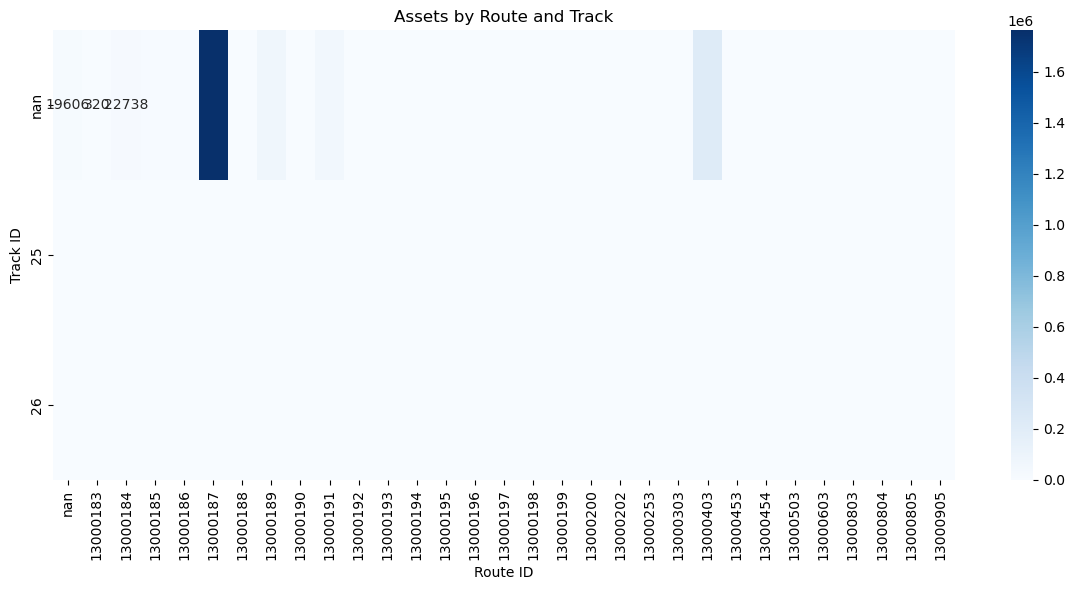

In [19]:
pivot = pdf.pivot(index="TrackID", columns="RouteID", values="AssetCount").fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Assets by Route and Track")
plt.xlabel("Route ID")
plt.ylabel("Track ID")
plt.tight_layout()
plt.show()


StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 22, Finished, Available, Finished)

Attempting to load table: AimsDataFromBlob2025.aims_dbo.Assets_csv
Successfully loaded Assets_csv.
Schema for Assets_csv:
root
 |-- ID: string (nullable = true)
 |-- OWNER: string (nullable = true)
 |-- PHASE: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- NOTES: string (nullable = true)
 |-- HYBRIDBILLCODE: string (nullable = true)
 |-- ACCESSDBID: string (nullable = true)
 |-- OWNERASSETATTRIBUTE: string (nullable = true)
 |-- PHASEASSETATTRIBUTE: string (nullable = true)
 |-- HYBRIDBILLCODEASSETATTRIBUTE: string (nullable = true)
 |-- NAMEASSETATTRIBUTE: string (nullable = true)
 |-- REFERENCECHAINAGE: string (nullable = true)
 |-- LENGTH: string (nullable = true)
 |-- LEGACYID: string (nullable = true)
 |-- VALIDFROM: string (nullable = true)
 |-- VALIDTO: string (nullable = true)
 |-- DELETED: string (nullable = true)
 |-- KINO_CSID: string (nullable = true)
 |-- KINO_CUID: string (nullable = true)
 |-- KINO_CWHEN: string (nullable = true)
 |-- KINO_USID: string

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


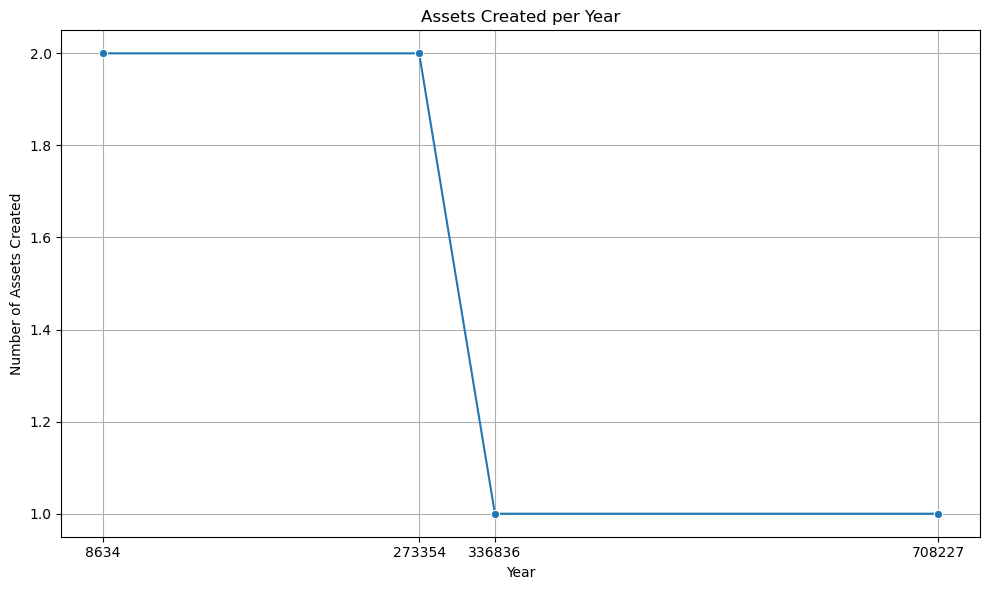


--- 8. Data Quality Checks ---

  Missing values in Assets table:
+---+-----+-----+----+-------+--------------+----------+-------------------+-------------------+----------------------------+------------------+-----------------+------+--------+---------+-------+-------+---------+---------+----------+---------+---------+----------+--------+-------------+--------------+-------------------------+--------------------+-------------------+--------------------+--------------------------+----------+----------------------+---------+-------------+-----+-------------------+------+--------------------+-------+-----------+----------------+-------------------+--------------+-----------------------+-------+----------+-----------------------------+-------------+--------------------+-------------------------+-------------+-------------------+-------------------+------------------+------------------+-----------------------+--------------------+-----------+------------+-------+--------------------+
| ID

In [20]:
# Import necessary PySpark functions
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, countDistinct, when, isnull, avg, sum, min, max, round, concat_ws, lit, expr, year, month, quarter, to_date
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'spark' SparkSession is already available in Fabric Notebook

# --- Configuration ---
# IMPORTANT: Confirm these are correct for your Fabric environment.
DATABASE_NAME = "AimsDataFromBlob2025"
SCHEMA_NAME = "aims_dbo"

# --- Function to load a table (with better diagnostics) ---
def load_table(table_name):
    full_table_name = f"{DATABASE_NAME}.{SCHEMA_NAME}.{table_name}"
    print(f"Attempting to load table: {full_table_name}")
    try:
        df = spark.read.table(full_table_name)
        # IMPORTANT: Print schema and first few rows immediately after loading
        print(f"Successfully loaded {table_name}.")
        print(f"Schema for {table_name}:")
        df.printSchema() # This is CRUCIAL for debugging column casing!
        print(f"First 5 rows for {table_name}:")
        df.show(5, truncate=False)
        print(f"Row count for {table_name}: {df.count()}")
        return df
    except Exception as e:
        print(f"ERROR: Failed to load table {table_name} from {full_table_name}: {e}")
        return None

# --- Load Core Entities ---
# Explicitly list all DataFrames needed for the analyses.
df_assets = load_table("Assets_csv")
df_asset_classes = load_table("AssetClasses")
df_attributes = load_table("Attributes")
df_attribute_domains = load_table("AttributeDomains")
df_attribute_groups = load_table("AttributeGroups")
df_owners = load_table("Owners")
df_asset_attributes = load_table("AssetAttributes_csv")
df_stages = load_table("Stages")
df_asset_statuses = load_table("AssetStatuses")
df_people = load_table("People")
df_organisations = load_table("Organisations")
df_asset_locations = load_table("AssetLocations_csv")
df_links = load_table("Links")
df_relationships = load_table("Relationships_csv")
df_relationship_types = load_table("RelationshipTypes")
df_secondary_coding_systems = load_table("SecondaryCodingSystems")
df_secondary_codings = load_table("SecondaryCodings")
df_routes = load_table("Routes")
df_asset_class_attributes = load_table("AssetClassAttributes")

# --- Initial DataFrame Loading Status Check (Important diagnostic) ---
print("\n--- Initial DataFrame Loading Status Check ---")
dfs_to_check = {
    "df_assets": df_assets,
    "df_asset_classes": df_asset_classes,
    "df_owners": df_owners,
    "df_organisations": df_organisations,
    "df_stages": df_stages,
    "df_asset_statuses": df_asset_statuses,
    "df_asset_locations": df_asset_locations,
    "df_attributes": df_attributes,
    "df_asset_attributes": df_asset_attributes,
    "df_relationships": df_relationships,
    "df_relationship_types": df_relationship_types,
    "df_routes": df_routes,
    "df_asset_class_attributes": df_asset_class_attributes
}

for df_name, df_obj in dfs_to_check.items():
    if df_obj is None:
        print(f"  CRITICAL ERROR: {df_name} is None. Table failed to load. Check previous 'ERROR: Failed to load table' messages for details.")
    else:
        print(f"  {df_name} loaded successfully.")
print("\n--- End of Initial DataFrame Loading Status Check ---")


# --- Detailed Analysis Examples (All column references now use Spark's internal table aliases) ---

print("\n--- Starting Business Intelligence Insights Generation ---")

# 1. Asset Inventory by Class, Stage, and Owner
if all(df is not None for df in [df_assets, df_asset_classes, df_stages, df_asset_statuses, df_owners, df_asset_locations]):
    print("\n--- 1. Asset Inventory by Class, Stage, and Owner ---")
    print("  NOTE: 'OwnerOrganisationName' has been removed from this analysis as the provided 'Owners' schema does not contain an 'ORGANISATION' column to link to the 'Organisations' table.")

    # Join Assets with AssetLocations to get AssetClass
    assets_with_class = df_assets.join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "left")

    asset_summary = assets_with_class.join(df_asset_classes, assets_with_class.ASSETCLASS == df_asset_classes.ID, "left") \
                                     .join(df_stages, df_assets.STAGE == df_stages.ID, "left") \
                                     .join(df_asset_statuses, df_assets.STATUS == df_asset_statuses.ID, "left") \
                                     .join(df_owners, df_assets.OWNER == df_owners.ID, "left") \
                                     .groupBy(
                                         col("AssetClasses.NAME").alias("AssetClassName"), 
                                         col("Stages.DESCRIPTION").alias("StageDescription"), 
                                         col("AssetStatuses.NAME").alias("AssetStatus"), 
                                         col("Owners.NAME").alias("OwnerName") 
                                     ) \
                                     .agg(
                                         count(col("Assets_csv.ID")).alias("TotalAssets"), # Corrected from df_assets.ID
                                         avg(col("Assets_csv.LENGTH").cast("double")).alias("AverageLength") # Corrected from df_assets.LENGTH
                                     ) \
                                     .orderBy(col("TotalAssets").desc())

    num_asset_summary = asset_summary.count()
    print(f"  Found {num_asset_summary} asset inventory summaries.")
    if num_asset_summary > 0:
        asset_summary.show(truncate=False)
        if num_asset_summary < 1000: # Heuristic for plotting feasibility
            try:
                asset_summary_pd = asset_summary.toPandas()
                plt.figure(figsize=(12, 6))
                sns.barplot(data=asset_summary_pd.head(10), x="AssetClassName", y="TotalAssets", hue="StageDescription")
                plt.title('Top 10 Asset Classes by Total Assets and Stage')
                plt.xlabel('Asset Class')
                plt.ylabel('Total Assets')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Asset Inventory: {e}")
        else:
            print("  Too many rows for direct Pandas plotting. Displaying top 10 table results.")
    else:
        print("  No asset inventory data found.")
else:
    print("  Skipping Asset Inventory by Class, Stage, and Owner: Required DataFrames not loaded or schema mismatch (Owner Organisation).")


# 2. Most Common Asset Attributes
if df_asset_attributes is not None and df_attributes is not None:
    print("\n--- 2. Most Common Asset Attributes ---")
    common_attributes = df_asset_attributes.join(df_attributes, df_asset_attributes.ATTRIBUTE == df_attributes.ID, "left") \
                                            .groupBy(col("Attributes.NAME").alias("AttributeName"), col("Attributes.TYPE").alias("AttributeType")) \
                                            .agg(count(df_asset_attributes.ID).alias("AttributeUsageCount")) \
                                            .orderBy(col("AttributeUsageCount").desc())

    num_common_attributes = common_attributes.count()
    print(f"  Found {num_common_attributes} common attributes.")
    if num_common_attributes > 0:
        common_attributes.show(10, truncate=False)
        if num_common_attributes < 1000:
            try:
                common_attributes_pd = common_attributes.toPandas()
                plt.figure(figsize=(10, 6))
                sns.barplot(data=common_attributes_pd.head(10), x="AttributeName", y="AttributeUsageCount", hue="AttributeType")
                plt.title('Top 10 Most Used Asset Attributes')
                plt.xlabel('Attribute Name')
                plt.ylabel('Usage Count')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Most Common Asset Attributes: {e}")
    else:
        print("  No common asset attributes found.")
else:
    print("  Skipping Most Common Asset Attributes: Required DataFrames not loaded.")

# 3. Assets with Missing Critical Attributes (Example: Assets without a "Material" attribute)
if df_assets is not None and df_asset_attributes is not None and df_attributes is not None:
    print("\n--- 3. Assets with Missing Critical Attributes (e.g., 'Material') ---")
    # First, find the ID of the 'Material' attribute
    material_attribute_id_df = df_attributes.filter(col("NAME") == "Material").select("ID").collect()
    if material_attribute_id_df:
        material_attribute_id = material_attribute_id_df[0]["ID"]

        assets_with_material = df_asset_attributes.filter(col("ATTRIBUTE") == material_attribute_id) \
                                                  .select(col("ASSET").alias("AssetID_WithMaterial"))

        assets_without_material = df_assets.join(assets_with_material, df_assets.ID == assets_with_material.AssetID_WithMaterial, "left_anti")

        num_assets_without_material = assets_without_material.count()
        print(f"  Assets without 'Material' attribute: {num_assets_without_material} found.")
        if num_assets_without_material > 0:
            assets_without_material.select("ID", "NAME").show(10, truncate=False)
        else:
            print("  All assets appear to have a 'Material' attribute.")
    else:
        print("  'Material' attribute not found in Attributes table.")
else:
    print("  Skipping Assets with Missing Critical Attributes: Required DataFrames not loaded.")


# 4. Hierarchical Asset Class Analysis (Parent-Child relationships)
if df_asset_classes is not None and df_assets is not None and df_asset_locations is not None:
    print("\n--- 4. Hierarchical Asset Class Analysis ---")
    # Self-join to find parent-child relationships
    hierarchical_classes = df_asset_classes.alias("child") \
                                           .join(df_asset_classes.alias("parent"), col("child.PARENT") == col("parent.ID"), "left") \
                                           .select(
                                               col("child.NAME").alias("ChildAssetClass"),
                                               col("parent.NAME").alias("ParentAssetClass")
                                           )
    num_hierarchical_classes = hierarchical_classes.count()
    print(f"  Found {num_hierarchical_classes} asset class parent-child relationships.")
    if num_hierarchical_classes > 0:
        print("  Asset Class Parent-Child Relationships:")
        hierarchical_classes.show(10, truncate=False)

    root_classes = df_asset_classes.filter(col("PARENT").isNull())
    if df_assets is not None and df_asset_locations is not None:
        assets_by_root_class = df_assets.join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "inner") \
                                        .join(df_asset_classes, df_asset_locations.ASSETCLASS == df_asset_classes.ID, "inner") \
                                        .withColumn("root_asset_class",
                                            when(col("AssetClasses.PARENT").isNull(), col("AssetClasses.NAME")) \
                                            .otherwise("Nested Class")) \
                                        .groupBy("root_asset_class") \
                                        .agg(count(col("Assets_csv.ID")).alias("CountOfAssets")) \
                                        .orderBy(col("CountOfAssets").desc())
        num_assets_by_root_class = assets_by_root_class.count()
        print(f"  Found {num_assets_by_root_class} root asset classes with associated assets.")
        if num_assets_by_root_class > 0:
            print("\n  Assets by Root Asset Class:")
            assets_by_root_class.show(truncate=False)
        else:
            print("  No assets found associated with root asset classes.")
    else:
        print("  Skipping Assets by Root Asset Class: Required DataFrames (df_assets, df_asset_locations) not loaded.")
else:
    print("  Skipping Hierarchical Asset Class Analysis: Required DataFrames not loaded.")


# 5. Asset Relationship Analysis (e.g., "Connected To" or "Part Of")
if df_relationships is not None and df_relationship_types is not None and df_assets is not None:
    print("\n--- 5. Asset Relationship Analysis ---")
    asset_relationships_detail = df_relationships.join(df_relationship_types, df_relationships.RELATIONSHIPTYPE == df_relationship_types.ID, "left") \
                                                .join(df_assets.alias("source_asset"), df_relationships.SOURCEASSET == col("source_asset.ID"), "left") \
                                                .join(df_assets.alias("target_asset"), df_relationships.TARGETASSET == col("target_asset.ID"), "left") \
                                                .select(
                                                    col("source_asset.NAME").alias("SourceAssetName"),
                                                    col("source_asset.NOTES").alias("SourceAssetDescription"), # CORRECTED: Changed from DESCRIPTION to NOTES
                                                    col("RelationshipTypes.DESCRIPTION").alias("RelationshipType"),
                                                    col("target_asset.NAME").alias("TargetAssetName"),
                                                    col("target_asset.NOTES").alias("TargetAssetDescription") # CORRECTED: Changed from DESCRIPTION to NOTES
                                                )
    num_relationships_detail = asset_relationships_detail.count()
    print(f"  Found {num_relationships_detail} detailed asset relationships.")
    if num_relationships_detail > 0:
        print("  Detailed Asset Relationships:")
        asset_relationships_detail.show(10, truncate=False)

    relationship_type_counts = asset_relationships_detail.groupBy("RelationshipType").agg(count("RelationshipType").alias("Count"))
    num_relationship_type_counts = relationship_type_counts.count()
    print(f"  Found {num_relationship_type_counts} relationship types.")
    if num_relationship_type_counts > 0:
        print("\n  Relationship Type Counts:")
        relationship_type_counts.show(truncate=False)
    else:
        print("  No relationship type counts found.")
else:
    print("  Skipping Asset Relationship Analysis: Required DataFrames not loaded.")


# 6. Analysis of Assets by Location (e.g., count assets per route)
if df_assets is not None and df_asset_locations is not None and df_routes is not None:
    print("\n--- 6. Assets by Location/Route ---")
    assets_by_route = df_asset_locations.join(df_assets, df_asset_locations.ASSET == df_assets.ID, "left") \
                                        .join(df_routes, df_asset_locations.ROUTE == df_routes.ID, "left") \
                                        .groupBy(col("Routes.DESCRIPTION").alias("RouteDescription"), col("Routes.CODE").alias("RouteCode")) \
                                        .agg(count(col("Assets_csv.ID")).alias("TotalAssetsOnRoute")) \
                                        .orderBy(col("TotalAssetsOnRoute").desc())
    num_assets_by_route = assets_by_route.count()
    print(f"  Found {num_assets_by_route} routes with assets.")
    if num_assets_by_route > 0:
        print("  Total Assets by Route:")
        assets_by_route.show(10, truncate=False)
    else:
        print("  No assets found on any routes.")
else:
    print("  Skipping Assets by Location/Route: Required DataFrames not loaded.")

# 7. Time-based Analysis (Assets created per month/year)
# 'KINO_CWHEN' is present in Assets_csv schema
if df_assets is not None and "KINO_CWHEN" in df_assets.columns:
    print("\n--- 7. Assets Created Over Time ---")
    # Cast KINO_CWHEN to DateType for date functions.
    # Filter out rows where CreationDate could not be parsed (is null)
    df_assets_with_date = df_assets.withColumn("CreationDate", to_date(col("KINO_CWHEN"))) \
                                   .filter(col("CreationDate").isNotNull()) \
                                   .withColumn("CreationYear", year(col("CreationDate"))) \
                                   .withColumn("CreationQuarter", quarter(col("CreationDate"))) \
                                   .withColumn("CreationMonth", month(col("CreationDate")))

    quarterly_assets = df_assets_with_date.groupBy("CreationYear", "CreationQuarter") \
                                              .agg(count("ID").alias("AssetsCreated")) \
                                              .orderBy("CreationYear", "CreationQuarter")
    num_quarterly_periods = quarterly_assets.count()
    print(f"  Found {num_quarterly_periods} quarterly periods with asset creation data.")
    if num_quarterly_periods > 0:
        print("\n  Quarterly Asset Creation:")
        quarterly_assets.show(20, truncate=False)
    else:
        print("  No quarterly asset creation data found.")

    yearly_assets = df_assets_with_date.groupBy("CreationYear") \
                                          .agg(count("ID").alias("AssetsCreated")) \
                                          .orderBy("CreationYear")
    num_yearly_periods = yearly_assets.count()
    print(f"  Found {num_yearly_periods} yearly periods with asset creation data.")
    if num_yearly_periods > 0:
        print("\n  Yearly Asset Creation:")
        yearly_assets.show(20, truncate=False)
        if num_yearly_periods > 0 and num_yearly_periods < 30: # Heuristic for reasonable plot size
            try:
                yearly_assets_pd = yearly_assets.toPandas()
                # Ensure the 'CreationYear' column is of an integer type for xticks
                # Fill NaN (if any slipped through for some reason) with a placeholder or drop
                yearly_assets_pd["CreationYear"] = yearly_assets_pd["CreationYear"].fillna(0).astype(int) # Fill NaNs and convert to int

                plt.figure(figsize=(10, 6))
                sns.lineplot(data=yearly_assets_pd, x="CreationYear", y="AssetsCreated", marker='o')
                plt.title('Assets Created per Year')
                plt.xlabel('Year')
                plt.ylabel('Number of Assets Created')
                # Use unique years from the DataFrame for xticks to avoid issues with non-integer values
                plt.xticks(yearly_assets_pd["CreationYear"].unique())
                plt.grid(True)
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Yearly Asset Creation: {e}")
                # Print the head of the Pandas DataFrame if a plot error occurs
                if 'yearly_assets_pd' in locals():
                    print("  Debug info: First 5 rows of yearly_assets_pd that caused error:")
                    print(yearly_assets_pd.head())
        else:
            print("  Too many years for direct line plot visualization or no data.")
    else:
        print("  No yearly asset creation data found.")
else:
    print("  Skipping Assets Created Over Time: Required DataFrame df_assets not loaded or 'KINO_CWHEN' column missing.")
    
# 8. Data Quality Checks (Missing Values, Duplicates, etc.)
print("\n--- 8. Data Quality Checks ---")
if df_assets:
    print("\n  Missing values in Assets table:")
    df_assets.select([count(when(isnull(c), c)).alias(c) for c in df_assets.columns]).show()

    print("\n  Duplicate Asset IDs:")
    duplicate_ids = df_assets.groupBy("ID").agg(count("ID").alias("Count")).filter("Count > 1")
    num_duplicate_ids = duplicate_ids.count()
    print(f"  Found {num_duplicate_ids} duplicate Asset IDs.")
    if num_duplicate_ids > 0:
        duplicate_ids.show(truncate=False)
    else:
        print("  No duplicate Asset IDs found.")
else:
    print("  Skipping Data Quality Checks: df_assets not loaded.")

# 9. Value Distribution for Key Categorical Attributes (Asset Class via AssetLocations)
if df_assets is not None and df_asset_locations is not None and df_asset_classes is not None:
    print("\n--- 9. Value Distribution: Asset Class ---")
    asset_class_distribution = df_assets.join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "left") \
             .join(df_asset_classes, df_asset_locations.ASSETCLASS == df_asset_classes.ID, "left") \
             .groupBy(col("AssetClasses.NAME").alias("AssetClassName")) \
             .agg(count(col("Assets_csv.ID")).alias("AssetCount")) \
             .orderBy(col("AssetCount").desc())
    num_asset_class_distribution = asset_class_distribution.count()
    print(f"  Found {num_asset_class_distribution} asset classes with associated assets.")
    if num_asset_class_distribution > 0:
        asset_class_distribution.show(20, truncate=False)
    else:
        print("  No asset class distribution data found.")
else:
    print("  Skipping Value Distribution: Asset Class: Required DataFrames not loaded.")

# 10. Analyzing Specific Attribute Values (e.g., average length of bridges)
if all(df is not None for df in [df_asset_attributes, df_attributes, df_assets, df_asset_locations, df_asset_classes]):
    print("\n--- 10. Analyzing Specific Attribute Values (e.g., 'Length' for 'Bridge') ---")
    # 'Length' and 'ID' from Attributes table
    length_attribute_id_df = df_attributes.filter(col("NAME") == "Length").select("ID").collect()
    # 'Bridge' and 'ID' from AssetClasses table
    bridge_asset_class_id_df = df_asset_classes.filter(col("NAME") == "Bridge").select("ID").collect()

    if length_attribute_id_df and bridge_asset_class_id_df:
        length_attr_id = length_attribute_id_df[0]["ID"]
        bridge_class_id = bridge_class_id_df[0]["ID"]

        # Use ASSET, ATTRIBUTE, ASSETCLASS. NUMERICVALUE confirmed as column in AssetAttributes
        bridge_lengths = df_asset_attributes.filter(col("ATTRIBUTE") == length_attr_id) \
                                            .join(df_assets, df_asset_attributes.ASSET == df_assets.ID, "inner") \
                                            .join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "inner") \
                                            .filter(col("AssetLocations_csv.ASSETCLASS") == bridge_class_id) \
                                            .select(col("NUMERICVALUE").cast("double").alias("Length"))

        num_bridge_lengths = bridge_lengths.count()
        print(f"  Found {num_bridge_lengths} 'Length' attribute records for 'Bridge' assets.")
        if num_bridge_lengths > 0:
            bridge_lengths_stats = bridge_lengths.agg(
                avg("Length").alias("AverageBridgeLength"),
                min("Length").alias("MinBridgeLength"),
                max("Length").alias("MaxBridgeLength")
            )
            print("  Statistics for 'Length' attribute on 'Bridge' assets:")
            bridge_lengths_stats.show(truncate=False)
        else:
            print("  No 'Length' attributes found for 'Bridge' assets.")
    else:
        print("  Could not find 'Length' attribute or 'Bridge' asset class in the lookup tables.")
else:
    print("  Skipping Analyzing Specific Attribute Values: Required DataFrames not loaded.")


print("\n--- Detailed Analysis Complete ---")

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 23, Finished, Available, Finished)

Attempting to load table: AimsDataFromBlob2025.aims_dbo.Assets_csv
Successfully loaded Assets_csv.
Schema for Assets_csv:
root
 |-- ID: string (nullable = true)
 |-- OWNER: string (nullable = true)
 |-- PHASE: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- NOTES: string (nullable = true)
 |-- HYBRIDBILLCODE: string (nullable = true)
 |-- ACCESSDBID: string (nullable = true)
 |-- OWNERASSETATTRIBUTE: string (nullable = true)
 |-- PHASEASSETATTRIBUTE: string (nullable = true)
 |-- HYBRIDBILLCODEASSETATTRIBUTE: string (nullable = true)
 |-- NAMEASSETATTRIBUTE: string (nullable = true)
 |-- REFERENCECHAINAGE: string (nullable = true)
 |-- LENGTH: string (nullable = true)
 |-- LEGACYID: string (nullable = true)
 |-- VALIDFROM: string (nullable = true)
 |-- VALIDTO: string (nullable = true)
 |-- DELETED: string (nullable = true)
 |-- KINO_CSID: string (nullable = true)
 |-- KINO_CUID: string (nullable = true)
 |-- KINO_CWHEN: string (nullable = true)
 |-- KINO_USID: string

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


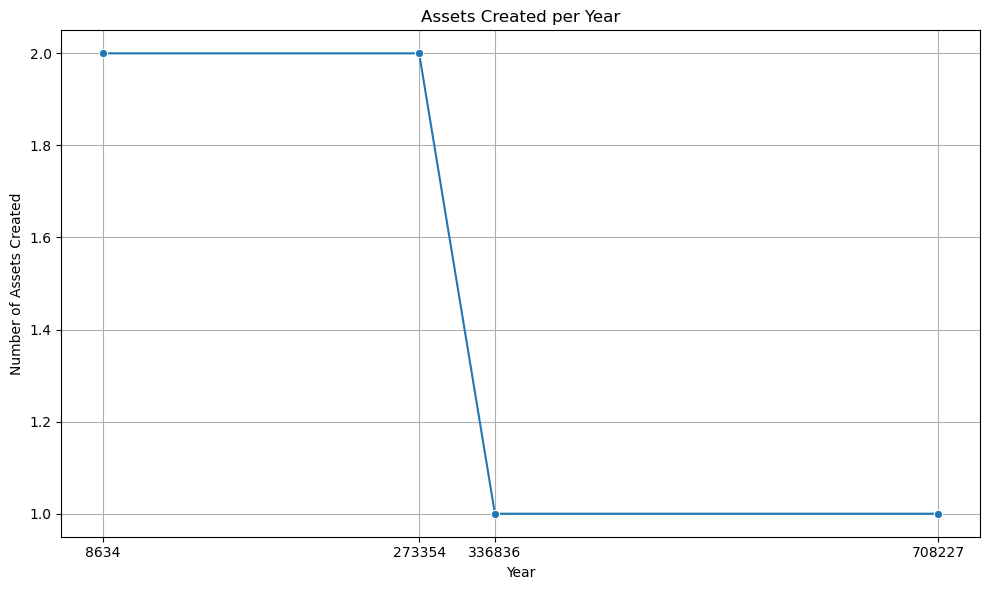


--- 8. Data Quality Checks ---

  Missing values in Assets table:
+---+-----+-----+----+-------+--------------+----------+-------------------+-------------------+----------------------------+------------------+-----------------+------+--------+---------+-------+-------+---------+---------+----------+---------+---------+----------+--------+-------------+--------------+-------------------------+--------------------+-------------------+--------------------+--------------------------+----------+----------------------+---------+-------------+-----+-------------------+------+--------------------+-------+-----------+----------------+-------------------+--------------+-----------------------+-------+----------+-----------------------------+-------------+--------------------+-------------------------+-------------+-------------------+-------------------+------------------+------------------+-----------------------+--------------------+-----------+------------+-------+--------------------+
| ID

In [21]:
# Import necessary PySpark functions
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, countDistinct, when, isnull, avg, sum, min, max, round, concat_ws, lit, expr, year, month, quarter, to_date, current_date
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'spark' SparkSession is already available in Fabric Notebook

# --- Configuration ---
# IMPORTANT: Confirm these are correct for your Fabric environment.
DATABASE_NAME = "AimsDataFromBlob2025"
SCHEMA_NAME = "aims_dbo"

# --- Function to load a table (with better diagnostics) ---
def load_table(table_name):
    full_table_name = f"{DATABASE_NAME}.{SCHEMA_NAME}.{table_name}"
    print(f"Attempting to load table: {full_table_name}")
    try:
        df = spark.read.table(full_table_name)
        # IMPORTANT: Print schema and first few rows immediately after loading
        print(f"Successfully loaded {table_name}.")
        print(f"Schema for {table_name}:")
        df.printSchema() # This is CRUCIAL for debugging column casing!
        print(f"First 5 rows for {table_name}:")
        df.show(5, truncate=False)
        print(f"Row count for {table_name}: {df.count()}")
        return df
    except Exception as e:
        print(f"ERROR: Failed to load table {table_name} from {full_table_name}: {e}")
        return None

# --- Load Core Entities ---
# Explicitly list all DataFrames needed for the analyses.
df_assets = load_table("Assets_csv")
df_asset_classes = load_table("AssetClasses")
df_attributes = load_table("Attributes")
df_attribute_domains = load_table("AttributeDomains")
df_attribute_groups = load_table("AttributeGroups")
df_owners = load_table("Owners")
df_asset_attributes = load_table("AssetAttributes_csv")
df_stages = load_table("Stages")
df_asset_statuses = load_table("AssetStatuses")
df_people = load_table("People")
df_organisations = load_table("Organisations")
df_asset_locations = load_table("AssetLocations_csv")
df_links = load_table("Links")
df_relationships = load_table("Relationships_csv")
df_relationship_types = load_table("RelationshipTypes")
df_secondary_coding_systems = load_table("SecondaryCodingSystems")
df_secondary_codings = load_table("SecondaryCodings")
df_routes = load_table("Routes")
df_asset_class_attributes = load_table("AssetClassAttributes")

# --- Initial DataFrame Loading Status Check (Important diagnostic) ---
print("\n--- Initial DataFrame Loading Status Check ---")
dfs_to_check = {
    "df_assets": df_assets,
    "df_asset_classes": df_asset_classes,
    "df_owners": df_owners,
    "df_organisations": df_organisations,
    "df_stages": df_stages,
    "df_asset_statuses": df_asset_statuses,
    "df_asset_locations": df_asset_locations,
    "df_attributes": df_attributes,
    "df_asset_attributes": df_asset_attributes,
    "df_relationships": df_relationships,
    "df_relationship_types": df_relationship_types,
    "df_routes": df_routes,
    "df_asset_class_attributes": df_asset_class_attributes
}

for df_name, df_obj in dfs_to_check.items():
    if df_obj is None:
        print(f"  CRITICAL ERROR: {df_name} is None. Table failed to load. Check previous 'ERROR: Failed to load table' messages for details.")
    else:
        print(f"  {df_name} loaded successfully.")
print("\n--- End of Initial DataFrame Loading Status Check ---")


# --- Detailed Analysis Examples (All column references now use Spark's internal table aliases) ---

print("\n--- Starting Business Intelligence Insights Generation ---")

# 1. Asset Inventory by Class, Stage, and Owner
if all(df is not None for df in [df_assets, df_asset_classes, df_stages, df_asset_statuses, df_owners, df_asset_locations]):
    print("\n--- 1. Asset Inventory by Class, Stage, and Owner ---")
    print("  NOTE: 'OwnerOrganisationName' has been removed from this analysis as the provided 'Owners' schema does not contain an 'ORGANISATION' column to link to the 'Organisations' table.")

    # Join Assets with AssetLocations to get AssetClass
    assets_with_class = df_assets.join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "left")

    asset_summary = assets_with_class.join(df_asset_classes, assets_with_class.ASSETCLASS == df_asset_classes.ID, "left") \
                                     .join(df_stages, df_assets.STAGE == df_stages.ID, "left") \
                                     .join(df_asset_statuses, df_assets.STATUS == df_asset_statuses.ID, "left") \
                                     .join(df_owners, df_assets.OWNER == df_owners.ID, "left") \
                                     .groupBy(
                                         col("AssetClasses.NAME").alias("AssetClassName"),
                                         col("Stages.DESCRIPTION").alias("StageDescription"),
                                         col("AssetStatuses.NAME").alias("AssetStatus"),
                                         col("Owners.NAME").alias("OwnerName")
                                     ) \
                                     .agg(
                                         count(col("Assets_csv.ID")).alias("TotalAssets"), # Corrected from df_assets.ID
                                         avg(col("Assets_csv.LENGTH").cast("double")).alias("AverageLength") # Corrected from df_assets.LENGTH
                                     ) \
                                     .orderBy(col("TotalAssets").desc())

    num_asset_summary = asset_summary.count()
    print(f"  Found {num_asset_summary} asset inventory summaries.")
    if num_asset_summary > 0:
        asset_summary.show(truncate=False)
        if num_asset_summary < 1000: # Heuristic for plotting feasibility
            try:
                asset_summary_pd = asset_summary.toPandas()
                plt.figure(figsize=(12, 6))
                sns.barplot(data=asset_summary_pd.head(10), x="AssetClassName", y="TotalAssets", hue="StageDescription")
                plt.title('Top 10 Asset Classes by Total Assets and Stage')
                plt.xlabel('Asset Class')
                plt.ylabel('Total Assets')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Asset Inventory: {e}")
        else:
            print("  Too many rows for direct Pandas plotting. Displaying top 10 table results.")
    else:
        print("  No asset inventory data found.")
else:
    print("  Skipping Asset Inventory by Class, Stage, and Owner: Required DataFrames not loaded or schema mismatch (Owner Organisation).")


# 2. Most Common Asset Attributes
if df_asset_attributes is not None and df_attributes is not None:
    print("\n--- 2. Most Common Asset Attributes ---")
    common_attributes = df_asset_attributes.join(df_attributes, df_asset_attributes.ATTRIBUTE == df_attributes.ID, "left") \
                                            .groupBy(col("Attributes.NAME").alias("AttributeName"), col("Attributes.TYPE").alias("AttributeType")) \
                                            .agg(count(df_asset_attributes.ID).alias("AttributeUsageCount")) \
                                            .orderBy(col("AttributeUsageCount").desc())

    num_common_attributes = common_attributes.count()
    print(f"  Found {num_common_attributes} common attributes.")
    if num_common_attributes > 0:
        common_attributes.show(10, truncate=False)
        if num_common_attributes < 1000:
            try:
                common_attributes_pd = common_attributes.toPandas()
                plt.figure(figsize=(10, 6))
                sns.barplot(data=common_attributes_pd.head(10), x="AttributeName", y="AttributeUsageCount", hue="AttributeType")
                plt.title('Top 10 Most Used Asset Attributes')
                plt.xlabel('Attribute Name')
                plt.ylabel('Usage Count')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Most Common Asset Attributes: {e}")
    else:
        print("  No common asset attributes found.")
else:
    print("  Skipping Most Common Asset Attributes: Required DataFrames not loaded.")

# 3. Assets with Missing Critical Attributes (Example: Assets without a "Material" attribute)
if df_assets is not None and df_asset_attributes is not None and df_attributes is not None:
    print("\n--- 3. Assets with Missing Critical Attributes (e.g., 'Material') ---")
    # First, find the ID of the 'Material' attribute
    material_attribute_id_df = df_attributes.filter(col("NAME") == "Material").select("ID").collect()
    if material_attribute_id_df:
        material_attribute_id = material_attribute_id_df[0]["ID"]

        assets_with_material = df_asset_attributes.filter(col("ATTRIBUTE") == material_attribute_id) \
                                                  .select(col("ASSET").alias("AssetID_WithMaterial"))

        assets_without_material = df_assets.join(assets_with_material, df_assets.ID == assets_with_material.AssetID_WithMaterial, "left_anti")

        num_assets_without_material = assets_without_material.count()
        print(f"  Assets without 'Material' attribute: {num_assets_without_material} found.")
        if num_assets_without_material > 0:
            assets_without_material.select("ID", "NAME").show(10, truncate=False)
        else:
            print("  All assets appear to have a 'Material' attribute.")
    else:
        print("  'Material' attribute not found in Attributes table.")
else:
    print("  Skipping Assets with Missing Critical Attributes: Required DataFrames not loaded.")


# 4. Hierarchical Asset Class Analysis (Parent-Child relationships)
if df_asset_classes is not None and df_assets is not None and df_asset_locations is not None:
    print("\n--- 4. Hierarchical Asset Class Analysis ---")
    # Self-join to find parent-child relationships
    hierarchical_classes = df_asset_classes.alias("child") \
                                           .join(df_asset_classes.alias("parent"), col("child.PARENT") == col("parent.ID"), "left") \
                                           .select(
                                               col("child.NAME").alias("ChildAssetClass"),
                                               col("parent.NAME").alias("ParentAssetClass")
                                           )
    num_hierarchical_classes = hierarchical_classes.count()
    print(f"  Found {num_hierarchical_classes} asset class parent-child relationships.")
    if num_hierarchical_classes > 0:
        print("  Asset Class Parent-Child Relationships:")
        hierarchical_classes.show(10, truncate=False)

    root_classes = df_asset_classes.filter(col("PARENT").isNull())
    if df_assets is not None and df_asset_locations is not None:
        assets_by_root_class = df_assets.join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "inner") \
                                        .join(df_asset_classes, df_asset_locations.ASSETCLASS == df_asset_classes.ID, "inner") \
                                        .withColumn("root_asset_class",
                                            when(col("AssetClasses.PARENT").isNull(), col("AssetClasses.NAME")) \
                                            .otherwise("Nested Class")) \
                                        .groupBy("root_asset_class") \
                                        .agg(count(col("Assets_csv.ID")).alias("CountOfAssets")) \
                                        .orderBy(col("CountOfAssets").desc())
        num_assets_by_root_class = assets_by_root_class.count()
        print(f"  Found {num_assets_by_root_class} root asset classes with associated assets.")
        if num_assets_by_root_class > 0:
            print("\n  Assets by Root Asset Class:")
            assets_by_root_class.show(truncate=False)
        else:
            print("  No assets found associated with root asset classes.")
    else:
        print("  Skipping Assets by Root Asset Class: Required DataFrames (df_assets, df_asset_locations) not loaded.")
else:
    print("  Skipping Hierarchical Asset Class Analysis: Required DataFrames not loaded.")


# 5. Asset Relationship Analysis (e.g., "Connected To" or "Part Of")
if df_relationships is not None and df_relationship_types is not None and df_assets is not None:
    print("\n--- 5. Asset Relationship Analysis ---")
    asset_relationships_detail = df_relationships.join(df_relationship_types, df_relationships.RELATIONSHIPTYPE == df_relationship_types.ID, "left") \
                                                .join(df_assets.alias("source_asset"), df_relationships.SOURCEASSET == col("source_asset.ID"), "left") \
                                                .join(df_assets.alias("target_asset"), df_relationships.TARGETASSET == col("target_asset.ID"), "left") \
                                                .select(
                                                    col("source_asset.NAME").alias("SourceAssetName"),
                                                    col("source_asset.NOTES").alias("SourceAssetDescription"), # CORRECTED: Changed from DESCRIPTION to NOTES
                                                    col("RelationshipTypes.DESCRIPTION").alias("RelationshipType"),
                                                    col("target_asset.NAME").alias("TargetAssetName"),
                                                    col("target_asset.NOTES").alias("TargetAssetDescription") # CORRECTED: Changed from DESCRIPTION to NOTES
                                                )
    num_relationships_detail = asset_relationships_detail.count()
    print(f"  Found {num_relationships_detail} detailed asset relationships.")
    if num_relationships_detail > 0:
        print("  Detailed Asset Relationships:")
        asset_relationships_detail.show(10, truncate=False)

    relationship_type_counts = asset_relationships_detail.groupBy("RelationshipType").agg(count("RelationshipType").alias("Count"))
    num_relationship_type_counts = relationship_type_counts.count()
    print(f"  Found {num_relationship_type_counts} relationship types.")
    if num_relationship_type_counts > 0:
        print("\n  Relationship Type Counts:")
        relationship_type_counts.show(truncate=False)
    else:
        print("  No relationship type counts found.")
else:
    print("  Skipping Asset Relationship Analysis: Required DataFrames not loaded.")


# 6. Analysis of Assets by Location (e.g., count assets per route)
if df_assets is not None and df_asset_locations is not None and df_routes is not None:
    print("\n--- 6. Assets by Location/Route ---")
    assets_by_route = df_asset_locations.join(df_assets, df_asset_locations.ASSET == df_assets.ID, "left") \
                                        .join(df_routes, df_asset_locations.ROUTE == df_routes.ID, "left") \
                                        .groupBy(col("Routes.DESCRIPTION").alias("RouteDescription"), col("Routes.CODE").alias("RouteCode")) \
                                        .agg(count(col("Assets_csv.ID")).alias("TotalAssetsOnRoute")) \
                                        .orderBy(col("TotalAssetsOnRoute").desc())
    num_assets_by_route = assets_by_route.count()
    print(f"  Found {num_assets_by_route} routes with assets.")
    if num_assets_by_route > 0:
        print("  Total Assets by Route:")
        assets_by_route.show(10, truncate=False)
    else:
        print("  No assets found on any routes.")
else:
    print("  Skipping Assets by Location/Route: Required DataFrames not loaded.")

# 7. Time-based Analysis (Assets created per month/year)
# 'KINO_CWHEN' is present in Assets_csv schema
if df_assets is not None and "KINO_CWHEN" in df_assets.columns:
    print("\n--- 7. Assets Created Over Time ---")
    # Cast KINO_CWHEN to DateType for date functions.
    # Filter out rows where CreationDate could not be parsed (is null)
    df_assets_with_date = df_assets.withColumn("CreationDate", to_date(col("KINO_CWHEN"))) \
                                   .filter(col("CreationDate").isNotNull()) \
                                   .withColumn("CreationYear", year(col("CreationDate"))) \
                                   .withColumn("CreationQuarter", quarter(col("CreationDate"))) \
                                   .withColumn("CreationMonth", month(col("CreationDate")))

    quarterly_assets = df_assets_with_date.groupBy("CreationYear", "CreationQuarter") \
                                              .agg(count("ID").alias("AssetsCreated")) \
                                              .orderBy("CreationYear", "CreationQuarter")
    num_quarterly_periods = quarterly_assets.count()
    print(f"  Found {num_quarterly_periods} quarterly periods with asset creation data.")
    if num_quarterly_periods > 0:
        print("\n  Quarterly Asset Creation:")
        quarterly_assets.show(20, truncate=False)
    else:
        print("  No quarterly asset creation data found.")

    yearly_assets = df_assets_with_date.groupBy("CreationYear") \
                                          .agg(count("ID").alias("AssetsCreated")) \
                                          .orderBy("CreationYear")
    num_yearly_periods = yearly_assets.count()
    print(f"  Found {num_yearly_periods} yearly periods with asset creation data.")
    if num_yearly_periods > 0:
        print("\n  Yearly Asset Creation:")
        yearly_assets.show(20, truncate=False)
        if num_yearly_periods > 0 and num_yearly_periods < 30: # Heuristic for reasonable plot size
            try:
                yearly_assets_pd = yearly_assets.toPandas()
                # Ensure the 'CreationYear' column is of an integer type for xticks
                # Fill NaN (if any slipped through for some reason) with a placeholder or drop
                yearly_assets_pd["CreationYear"] = yearly_assets_pd["CreationYear"].fillna(0).astype(int) # Fill NaNs and convert to int

                plt.figure(figsize=(10, 6))
                sns.lineplot(data=yearly_assets_pd, x="CreationYear", y="AssetsCreated", marker='o')
                plt.title('Assets Created per Year')
                plt.xlabel('Year')
                plt.ylabel('Number of Assets Created')
                # Use unique years from the DataFrame for xticks to avoid issues with non-integer values
                plt.xticks(yearly_assets_pd["CreationYear"].unique())
                plt.grid(True)
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Yearly Asset Creation: {e}")
                # Print the head of the Pandas DataFrame if a plot error occurs
                if 'yearly_assets_pd' in locals():
                    print("  Debug info: First 5 rows of yearly_assets_pd that caused error:")
                    print(yearly_assets_pd.head())
        else:
            print("  Too many years for direct line plot visualization or no data.")
    else:
        print("  No yearly asset creation data found.")
else:
    print("  Skipping Assets Created Over Time: Required DataFrame df_assets not loaded or 'KINO_CWHEN' column missing.")

# 8. Data Quality Checks (Missing Values, Duplicates, etc.)
print("\n--- 8. Data Quality Checks ---")
if df_assets:
    print("\n  Missing values in Assets table:")
    df_assets.select([count(when(isnull(c), c)).alias(c) for c in df_assets.columns]).show()

    print("\n  Duplicate Asset IDs:")
    duplicate_ids = df_assets.groupBy("ID").agg(count("ID").alias("Count")).filter("Count > 1")
    num_duplicate_ids = duplicate_ids.count()
    print(f"  Found {num_duplicate_ids} duplicate Asset IDs.")
    if num_duplicate_ids > 0:
        duplicate_ids.show(truncate=False)
    else:
        print("  No duplicate Asset IDs found.")
else:
    print("  Skipping Data Quality Checks: df_assets not loaded.")

# 9. Value Distribution for Key Categorical Attributes (Asset Class via AssetLocations)
if df_assets is not None and df_asset_locations is not None and df_asset_classes is not None:
    print("\n--- 9. Value Distribution: Asset Class ---")
    asset_class_distribution = df_assets.join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "left") \
             .join(df_asset_classes, df_asset_locations.ASSETCLASS == df_asset_classes.ID, "left") \
             .groupBy(col("AssetClasses.NAME").alias("AssetClassName")) \
             .agg(count(col("Assets_csv.ID")).alias("AssetCount")) \
             .orderBy(col("AssetCount").desc())
    num_asset_class_distribution = asset_class_distribution.count()
    print(f"  Found {num_asset_class_distribution} asset classes with associated assets.")
    if num_asset_class_distribution > 0:
        asset_class_distribution.show(20, truncate=False)
    else:
        print("  No asset class distribution data found.")
else:
    print("  Skipping Value Distribution: Asset Class: Required DataFrames not loaded.")

# 10. Analyzing Specific Attribute Values (e.g., average length of bridges)
if all(df is not None for df in [df_asset_attributes, df_attributes, df_assets, df_asset_locations, df_asset_classes]):
    print("\n--- 10. Analyzing Specific Attribute Values (e.g., 'Length' for 'Bridge') ---")
    # 'Length' and 'ID' from Attributes table
    length_attribute_id_df = df_attributes.filter(col("NAME") == "Length").select("ID").collect()
    # 'Bridge' and 'ID' from AssetClasses table
    bridge_asset_class_id_df = df_asset_classes.filter(col("NAME") == "Bridge").select("ID").collect()

    if length_attribute_id_df and bridge_asset_class_id_df:
        length_attr_id = length_attribute_id_df[0]["ID"]
        bridge_class_id = bridge_class_id_df[0]["ID"]

        # Use ASSET, ATTRIBUTE, ASSETCLASS. NUMERICVALUE confirmed as column in AssetAttributes
        bridge_lengths = df_asset_attributes.filter(col("ATTRIBUTE") == length_attr_id) \
                                            .join(df_assets, df_asset_attributes.ASSET == df_assets.ID, "inner") \
                                            .join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "inner") \
                                            .filter(col("AssetLocations_csv.ASSETCLASS") == bridge_class_id) \
                                            .select(col("NUMERICVALUE").cast("double").alias("Length"))

        num_bridge_lengths = bridge_lengths.count()
        print(f"  Found {num_bridge_lengths} 'Length' attribute records for 'Bridge' assets.")
        if num_bridge_lengths > 0:
            bridge_lengths_stats = bridge_lengths.agg(
                avg("Length").alias("AverageBridgeLength"),
                min("Length").alias("MinBridgeLength"),
                max("Length").alias("MaxBridgeLength")
            )
            print("  Statistics for 'Length' attribute on 'Bridge' assets:")
            bridge_lengths_stats.show(truncate=False)
        else:
            print("  No 'Length' attributes found for 'Bridge' assets.")
    else:
        print("  Could not find 'Length' attribute or 'Bridge' asset class in the lookup tables.")
else:
    print("  Skipping Analyzing Specific Attribute Values: Required DataFrames not loaded.")


print("\n--- Detailed Analysis Complete ---")

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 24, Finished, Available, Finished)

Attempting to load table: AimsDataFromBlob2025.aims_dbo.Assets_csv
Successfully loaded Assets_csv.
Schema for Assets_csv:
root
 |-- ID: string (nullable = true)
 |-- OWNER: string (nullable = true)
 |-- PHASE: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- NOTES: string (nullable = true)
 |-- HYBRIDBILLCODE: string (nullable = true)
 |-- ACCESSDBID: string (nullable = true)
 |-- OWNERASSETATTRIBUTE: string (nullable = true)
 |-- PHASEASSETATTRIBUTE: string (nullable = true)
 |-- HYBRIDBILLCODEASSETATTRIBUTE: string (nullable = true)
 |-- NAMEASSETATTRIBUTE: string (nullable = true)
 |-- REFERENCECHAINAGE: string (nullable = true)
 |-- LENGTH: string (nullable = true)
 |-- LEGACYID: string (nullable = true)
 |-- VALIDFROM: string (nullable = true)
 |-- VALIDTO: string (nullable = true)
 |-- DELETED: string (nullable = true)
 |-- KINO_CSID: string (nullable = true)
 |-- KINO_CUID: string (nullable = true)
 |-- KINO_CWHEN: string (nullable = true)
 |-- KINO_USID: string

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


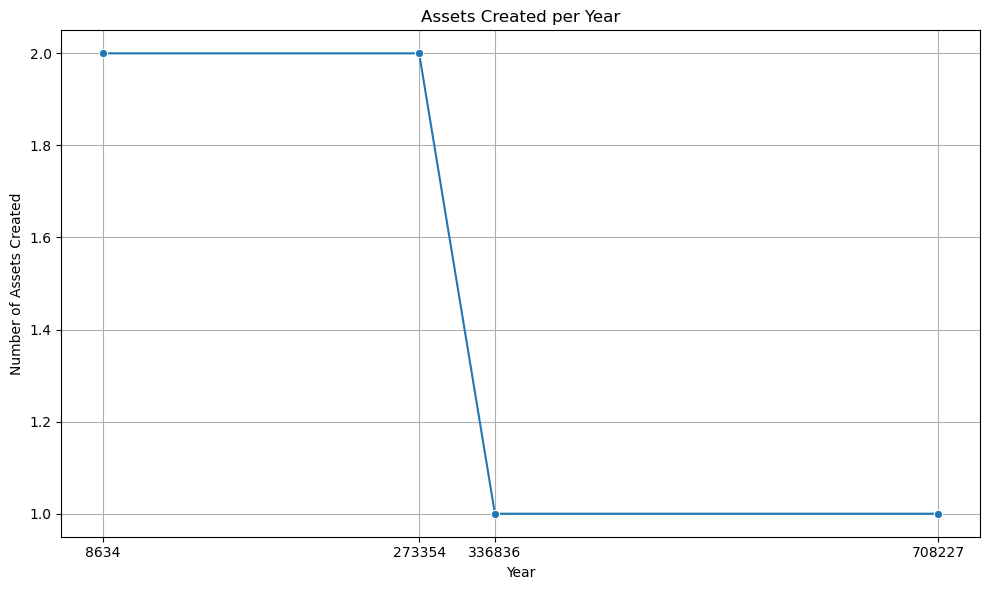


--- 8. Data Quality Checks ---

  Missing values in Assets table:
+---+-----+-----+----+-------+--------------+----------+-------------------+-------------------+----------------------------+------------------+-----------------+------+--------+---------+-------+-------+---------+---------+----------+---------+---------+----------+--------+-------------+--------------+-------------------------+--------------------+-------------------+--------------------+--------------------------+----------+----------------------+---------+-------------+-----+-------------------+------+--------------------+-------+-----------+----------------+-------------------+--------------+-----------------------+-------+----------+-----------------------------+-------------+--------------------+-------------------------+-------------+-------------------+-------------------+------------------+------------------+-----------------------+--------------------+-----------+------------+-------+--------------------+
| ID

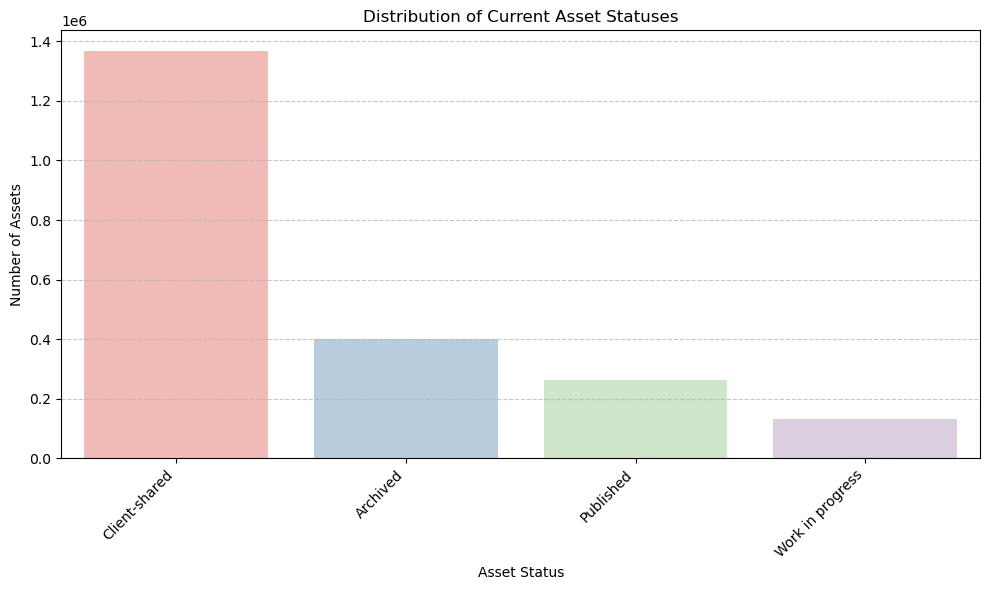


--- 13. Asset Class Attribute Completeness ---
  Found 104463 attribute completeness records.

  Asset Class Attribute Completeness (Top 20 by Completeness):
+----------------------------------------------+---------------------------------+--------------+-------------+----------------------+
|AssetClassName                                |AttributeName                    |PopulatedCount|TotalRequired|CompletenessPercentage|
+----------------------------------------------+---------------------------------+--------------+-------------+----------------------+
|(C2) North Portal Chiltern Tunnels to Brackley|Design Stage                     |0             |2            |0.0                   |
|(C2) North Portal Chiltern Tunnels to Brackley|Document Number                  |0             |2            |0.0                   |
|(C2) North Portal Chiltern Tunnels to Brackley|Document Revision Number         |0             |2            |0.0                   |
|(C2) North Portal Chiltern Tun

In [22]:
# Import necessary PySpark functions
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, countDistinct, when, isnull, avg, sum, min, max, round, concat_ws, lit, expr, year, month, quarter, to_date, current_date
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'spark' SparkSession is already available in Fabric Notebook

# --- Configuration ---
# IMPORTANT: Confirm these are correct for your Fabric environment.
DATABASE_NAME = "AimsDataFromBlob2025"
SCHEMA_NAME = "aims_dbo"

# --- Function to load a table (with better diagnostics) ---
def load_table(table_name):
    full_table_name = f"{DATABASE_NAME}.{SCHEMA_NAME}.{table_name}"
    print(f"Attempting to load table: {full_table_name}")
    try:
        df = spark.read.table(full_table_name)
        # IMPORTANT: Print schema and first few rows immediately after loading
        print(f"Successfully loaded {table_name}.")
        print(f"Schema for {table_name}:")
        df.printSchema() # This is CRUCIAL for debugging column casing!
        print(f"First 5 rows for {table_name}:")
        df.show(5, truncate=False)
        print(f"Row count for {table_name}: {df.count()}")
        return df
    except Exception as e:
        print(f"ERROR: Failed to load table {table_name} from {full_table_name}: {e}")
        return None

# --- Load Core Entities ---
# Explicitly list all DataFrames needed for the analyses.
df_assets = load_table("Assets_csv")
df_asset_classes = load_table("AssetClasses")
df_attributes = load_table("Attributes")
df_attribute_domains = load_table("AttributeDomains")
df_attribute_groups = load_table("AttributeGroups")
df_owners = load_table("Owners")
df_asset_attributes = load_table("AssetAttributes_csv")
df_stages = load_table("Stages")
df_asset_statuses = load_table("AssetStatuses")
df_people = load_table("People")
df_organisations = load_table("Organisations")
df_asset_locations = load_table("AssetLocations_csv")
df_links = load_table("Links")
df_relationships = load_table("Relationships_csv")
df_relationship_types = load_table("RelationshipTypes")
df_secondary_coding_systems = load_table("SecondaryCodingSystems")
df_secondary_codings = load_table("SecondaryCodings")
df_routes = load_table("Routes")
df_asset_class_attributes = load_table("AssetClassAttributes")

# --- Initial DataFrame Loading Status Check (Important diagnostic) ---
print("\n--- Initial DataFrame Loading Status Check ---")
dfs_to_check = {
    "df_assets": df_assets,
    "df_asset_classes": df_asset_classes,
    "df_owners": df_owners,
    "df_organisations": df_organisations,
    "df_stages": df_stages,
    "df_asset_statuses": df_asset_statuses,
    "df_asset_locations": df_asset_locations,
    "df_attributes": df_attributes,
    "df_asset_attributes": df_asset_attributes,
    "df_relationships": df_relationships,
    "df_relationship_types": df_relationship_types,
    "df_routes": df_routes,
    "df_asset_class_attributes": df_asset_class_attributes
}

for df_name, df_obj in dfs_to_check.items():
    if df_obj is None:
        print(f"  CRITICAL ERROR: {df_name} is None. Table failed to load. Check previous 'ERROR: Failed to load table' messages for details.")
    else:
        print(f"  {df_name} loaded successfully.")
print("\n--- End of Initial DataFrame Loading Status Check ---")


# --- Detailed Analysis Examples (All column references now use Spark's internal table aliases) ---

print("\n--- Starting Business Intelligence Insights Generation ---")

# 1. Asset Inventory by Class, Stage, and Owner
if all(df is not None for df in [df_assets, df_asset_classes, df_stages, df_asset_statuses, df_owners, df_asset_locations]):
    print("\n--- 1. Asset Inventory by Class, Stage, and Owner ---")
    print("  NOTE: 'OwnerOrganisationName' has been removed from this analysis as the provided 'Owners' schema does not contain an 'ORGANISATION' column to link to the 'Organisations' table.")

    # Join Assets with AssetLocations to get AssetClass
    assets_with_class = df_assets.join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "left")

    asset_summary = assets_with_class.join(df_asset_classes, assets_with_class.ASSETCLASS == df_asset_classes.ID, "left") \
                                     .join(df_stages, df_assets.STAGE == df_stages.ID, "left") \
                                     .join(df_asset_statuses, df_assets.STATUS == df_asset_statuses.ID, "left") \
                                     .join(df_owners, df_assets.OWNER == df_owners.ID, "left") \
                                     .groupBy(
                                         col("AssetClasses.NAME").alias("AssetClassName"),
                                         col("Stages.DESCRIPTION").alias("StageDescription"),
                                         col("AssetStatuses.NAME").alias("AssetStatus"),
                                         col("Owners.NAME").alias("OwnerName")
                                     ) \
                                     .agg(
                                         count(col("Assets_csv.ID")).alias("TotalAssets"), # Corrected from df_assets.ID
                                         avg(col("Assets_csv.LENGTH").cast("double")).alias("AverageLength") # Corrected from df_assets.LENGTH
                                     ) \
                                     .orderBy(col("TotalAssets").desc())

    num_asset_summary = asset_summary.count()
    print(f"  Found {num_asset_summary} asset inventory summaries.")
    if num_asset_summary > 0:
        asset_summary.show(truncate=False)
        if num_asset_summary < 1000: # Heuristic for plotting feasibility
            try:
                asset_summary_pd = asset_summary.toPandas()
                plt.figure(figsize=(12, 6))
                sns.barplot(data=asset_summary_pd.head(10), x="AssetClassName", y="TotalAssets", hue="StageDescription")
                plt.title('Top 10 Asset Classes by Total Assets and Stage')
                plt.xlabel('Asset Class')
                plt.ylabel('Total Assets')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Asset Inventory: {e}")
        else:
            print("  Too many rows for direct Pandas plotting. Displaying top 10 table results.")
    else:
        print("  No asset inventory data found.")
else:
    print("  Skipping Asset Inventory by Class, Stage, and Owner: Required DataFrames not loaded or schema mismatch (Owner Organisation).")


# 2. Most Common Asset Attributes
if df_asset_attributes is not None and df_attributes is not None:
    print("\n--- 2. Most Common Asset Attributes ---")
    common_attributes = df_asset_attributes.join(df_attributes, df_asset_attributes.ATTRIBUTE == df_attributes.ID, "left") \
                                            .groupBy(col("Attributes.NAME").alias("AttributeName"), col("Attributes.TYPE").alias("AttributeType")) \
                                            .agg(count(df_asset_attributes.ID).alias("AttributeUsageCount")) \
                                            .orderBy(col("AttributeUsageCount").desc())

    num_common_attributes = common_attributes.count()
    print(f"  Found {num_common_attributes} common attributes.")
    if num_common_attributes > 0:
        common_attributes.show(10, truncate=False)
        if num_common_attributes < 1000:
            try:
                common_attributes_pd = common_attributes.toPandas()
                plt.figure(figsize=(10, 6))
                sns.barplot(data=common_attributes_pd.head(10), x="AttributeName", y="AttributeUsageCount", hue="AttributeType")
                plt.title('Top 10 Most Used Asset Attributes')
                plt.xlabel('Attribute Name')
                plt.ylabel('Usage Count')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Most Common Asset Attributes: {e}")
    else:
        print("  No common asset attributes found.")
else:
    print("  Skipping Most Common Asset Attributes: Required DataFrames not loaded.")

# 3. Assets with Missing Critical Attributes (Example: Assets without a "Material" attribute)
if df_assets is not None and df_asset_attributes is not None and df_attributes is not None:
    print("\n--- 3. Assets with Missing Critical Attributes (e.g., 'Material') ---")
    # First, find the ID of the 'Material' attribute
    material_attribute_id_df = df_attributes.filter(col("NAME") == "Material").select("ID").collect()
    if material_attribute_id_df:
        material_attribute_id = material_attribute_id_df[0]["ID"]

        assets_with_material = df_asset_attributes.filter(col("ATTRIBUTE") == material_attribute_id) \
                                                  .select(col("ASSET").alias("AssetID_WithMaterial"))

        assets_without_material = df_assets.join(assets_with_material, df_assets.ID == assets_with_material.AssetID_WithMaterial, "left_anti")

        num_assets_without_material = assets_without_material.count()
        print(f"  Assets without 'Material' attribute: {num_assets_without_material} found.")
        if num_assets_without_material > 0:
            assets_without_material.select("ID", "NAME").show(10, truncate=False)
        else:
            print("  All assets appear to have a 'Material' attribute.")
    else:
        print("  'Material' attribute not found in Attributes table.")
else:
    print("  Skipping Assets with Missing Critical Attributes: Required DataFrames not loaded.")


# 4. Hierarchical Asset Class Analysis (Parent-Child relationships)
if df_asset_classes is not None and df_assets is not None and df_asset_locations is not None:
    print("\n--- 4. Hierarchical Asset Class Analysis ---")
    # Self-join to find parent-child relationships
    hierarchical_classes = df_asset_classes.alias("child") \
                                           .join(df_asset_classes.alias("parent"), col("child.PARENT") == col("parent.ID"), "left") \
                                           .select(
                                               col("child.NAME").alias("ChildAssetClass"),
                                               col("parent.NAME").alias("ParentAssetClass")
                                           )
    num_hierarchical_classes = hierarchical_classes.count()
    print(f"  Found {num_hierarchical_classes} asset class parent-child relationships.")
    if num_hierarchical_classes > 0:
        print("  Asset Class Parent-Child Relationships:")
        hierarchical_classes.show(10, truncate=False)

    root_classes = df_asset_classes.filter(col("PARENT").isNull())
    if df_assets is not None and df_asset_locations is not None:
        assets_by_root_class = df_assets.join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "inner") \
                                        .join(df_asset_classes, df_asset_locations.ASSETCLASS == df_asset_classes.ID, "inner") \
                                        .withColumn("root_asset_class",
                                            when(col("AssetClasses.PARENT").isNull(), col("AssetClasses.NAME")) \
                                            .otherwise("Nested Class")) \
                                        .groupBy("root_asset_class") \
                                        .agg(count(col("Assets_csv.ID")).alias("CountOfAssets")) \
                                        .orderBy(col("CountOfAssets").desc())
        num_assets_by_root_class = assets_by_root_class.count()
        print(f"  Found {num_assets_by_root_class} root asset classes with associated assets.")
        if num_assets_by_root_class > 0:
            print("\n  Assets by Root Asset Class:")
            assets_by_root_class.show(truncate=False)
        else:
            print("  No assets found associated with root asset classes.")
    else:
        print("  Skipping Assets by Root Asset Class: Required DataFrames (df_assets, df_asset_locations) not loaded.")
else:
    print("  Skipping Hierarchical Asset Class Analysis: Required DataFrames not loaded.")


# 5. Asset Relationship Analysis (e.g., "Connected To" or "Part Of")
if df_relationships is not None and df_relationship_types is not None and df_assets is not None:
    print("\n--- 5. Asset Relationship Analysis ---")
    asset_relationships_detail = df_relationships.join(df_relationship_types, df_relationships.RELATIONSHIPTYPE == df_relationship_types.ID, "left") \
                                                .join(df_assets.alias("source_asset"), df_relationships.SOURCEASSET == col("source_asset.ID"), "left") \
                                                .join(df_assets.alias("target_asset"), df_relationships.TARGETASSET == col("target_asset.ID"), "left") \
                                                .select(
                                                    col("source_asset.NAME").alias("SourceAssetName"),
                                                    col("source_asset.NOTES").alias("SourceAssetDescription"), # CORRECTED: Changed from DESCRIPTION to NOTES
                                                    col("RelationshipTypes.DESCRIPTION").alias("RelationshipType"),
                                                    col("target_asset.NAME").alias("TargetAssetName"),
                                                    col("target_asset.NOTES").alias("TargetAssetDescription") # CORRECTED: Changed from DESCRIPTION to NOTES
                                                )
    num_relationships_detail = asset_relationships_detail.count()
    print(f"  Found {num_relationships_detail} detailed asset relationships.")
    if num_relationships_detail > 0:
        print("  Detailed Asset Relationships:")
        asset_relationships_detail.show(10, truncate=False)

    relationship_type_counts = asset_relationships_detail.groupBy("RelationshipType").agg(count("RelationshipType").alias("Count"))
    num_relationship_type_counts = relationship_type_counts.count()
    print(f"  Found {num_relationship_type_counts} relationship types.")
    if num_relationship_type_counts > 0:
        print("\n  Relationship Type Counts:")
        relationship_type_counts.show(truncate=False)
    else:
        print("  No relationship type counts found.")
else:
    print("  Skipping Asset Relationship Analysis: Required DataFrames not loaded.")


# 6. Analysis of Assets by Location (e.g., count assets per route)
if df_assets is not None and df_asset_locations is not None and df_routes is not None:
    print("\n--- 6. Assets by Location/Route ---")
    assets_by_route = df_asset_locations.join(df_assets, df_asset_locations.ASSET == df_assets.ID, "left") \
                                        .join(df_routes, df_asset_locations.ROUTE == df_routes.ID, "left") \
                                        .groupBy(col("Routes.DESCRIPTION").alias("RouteDescription"), col("Routes.CODE").alias("RouteCode")) \
                                        .agg(count(col("Assets_csv.ID")).alias("TotalAssetsOnRoute")) \
                                        .orderBy(col("TotalAssetsOnRoute").desc())
    num_assets_by_route = assets_by_route.count()
    print(f"  Found {num_assets_by_route} routes with assets.")
    if num_assets_by_route > 0:
        print("  Total Assets by Route:")
        assets_by_route.show(10, truncate=False)
    else:
        print("  No assets found on any routes.")
else:
    print("  Skipping Assets by Location/Route: Required DataFrames not loaded.")

# 7. Time-based Analysis (Assets created per month/year)
# 'KINO_CWHEN' is present in Assets_csv schema
if df_assets is not None and "KINO_CWHEN" in df_assets.columns:
    print("\n--- 7. Assets Created Over Time ---")
    # Cast KINO_CWHEN to DateType for date functions.
    # Filter out rows where CreationDate could not be parsed (is null)
    df_assets_with_date = df_assets.withColumn("CreationDate", to_date(col("KINO_CWHEN"))) \
                                   .filter(col("CreationDate").isNotNull()) \
                                   .withColumn("CreationYear", year(col("CreationDate"))) \
                                   .withColumn("CreationQuarter", quarter(col("CreationDate"))) \
                                   .withColumn("CreationMonth", month(col("CreationDate")))

    quarterly_assets = df_assets_with_date.groupBy("CreationYear", "CreationQuarter") \
                                              .agg(count("ID").alias("AssetsCreated")) \
                                              .orderBy("CreationYear", "CreationQuarter")
    num_quarterly_periods = quarterly_assets.count()
    print(f"  Found {num_quarterly_periods} quarterly periods with asset creation data.")
    if num_quarterly_periods > 0:
        print("\n  Quarterly Asset Creation:")
        quarterly_assets.show(20, truncate=False)
    else:
        print("  No quarterly asset creation data found.")

    yearly_assets = df_assets_with_date.groupBy("CreationYear") \
                                          .agg(count("ID").alias("AssetsCreated")) \
                                          .orderBy("CreationYear")
    num_yearly_periods = yearly_assets.count()
    print(f"  Found {num_yearly_periods} yearly periods with asset creation data.")
    if num_yearly_periods > 0:
        print("\n  Yearly Asset Creation:")
        yearly_assets.show(20, truncate=False)
        if num_yearly_periods > 0 and num_yearly_periods < 30: # Heuristic for reasonable plot size
            try:
                yearly_assets_pd = yearly_assets.toPandas()
                # Ensure the 'CreationYear' column is of an integer type for xticks
                # Fill NaN (if any slipped through for some reason) with a placeholder or drop
                yearly_assets_pd["CreationYear"] = yearly_assets_pd["CreationYear"].fillna(0).astype(int) # Fill NaNs and convert to int

                plt.figure(figsize=(10, 6))
                sns.lineplot(data=yearly_assets_pd, x="CreationYear", y="AssetsCreated", marker='o')
                plt.title('Assets Created per Year')
                plt.xlabel('Year')
                plt.ylabel('Number of Assets Created')
                # Use unique years from the DataFrame for xticks to avoid issues with non-integer values
                plt.xticks(yearly_assets_pd["CreationYear"].unique())
                plt.grid(True)
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Yearly Asset Creation: {e}")
                # Print the head of the Pandas DataFrame if a plot error occurs
                if 'yearly_assets_pd' in locals():
                    print("  Debug info: First 5 rows of yearly_assets_pd that caused error:")
                    print(yearly_assets_pd.head())
        else:
            print("  Too many years for direct line plot visualization or no data.")
    else:
        print("  No yearly asset creation data found.")
else:
    print("  Skipping Assets Created Over Time: Required DataFrame df_assets not loaded or 'KINO_CWHEN' column missing.")

# 8. Data Quality Checks (Missing Values, Duplicates, etc.)
print("\n--- 8. Data Quality Checks ---")
if df_assets:
    print("\n  Missing values in Assets table:")
    df_assets.select([count(when(isnull(c), c)).alias(c) for c in df_assets.columns]).show()

    print("\n  Duplicate Asset IDs:")
    duplicate_ids = df_assets.groupBy("ID").agg(count("ID").alias("Count")).filter("Count > 1")
    num_duplicate_ids = duplicate_ids.count()
    print(f"  Found {num_duplicate_ids} duplicate Asset IDs.")
    if num_duplicate_ids > 0:
        duplicate_ids.show(truncate=False)
    else:
        print("  No duplicate Asset IDs found.")
else:
    print("  Skipping Data Quality Checks: df_assets not loaded.")

# 9. Value Distribution for Key Categorical Attributes (Asset Class via AssetLocations)
if df_assets is not None and df_asset_locations is not None and df_asset_classes is not None:
    print("\n--- 9. Value Distribution: Asset Class ---")
    asset_class_distribution = df_assets.join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "left") \
             .join(df_asset_classes, df_asset_locations.ASSETCLASS == df_asset_classes.ID, "left") \
             .groupBy(col("AssetClasses.NAME").alias("AssetClassName")) \
             .agg(count(col("Assets_csv.ID")).alias("AssetCount")) \
             .orderBy(col("AssetCount").desc())
    num_asset_class_distribution = asset_class_distribution.count()
    print(f"  Found {num_asset_class_distribution} asset classes with associated assets.")
    if num_asset_class_distribution > 0:
        asset_class_distribution.show(20, truncate=False)
    else:
        print("  No asset class distribution data found.")
else:
    print("  Skipping Value Distribution: Asset Class: Required DataFrames not loaded.")

# 10. Analyzing Specific Attribute Values (e.g., average length of bridges)
if all(df is not None for df in [df_asset_attributes, df_attributes, df_assets, df_asset_locations, df_asset_classes]):
    print("\n--- 10. Analyzing Specific Attribute Values (e.g., 'Length' for 'Bridge') ---")
    # 'Length' and 'ID' from Attributes table
    length_attribute_id_df = df_attributes.filter(col("NAME") == "Length").select("ID").collect()
    # 'Bridge' and 'ID' from AssetClasses table
    bridge_asset_class_id_df = df_asset_classes.filter(col("NAME") == "Bridge").select("ID").collect()

    if length_attribute_id_df and bridge_asset_class_id_df:
        length_attr_id = length_attribute_id_df[0]["ID"]
        bridge_class_id = bridge_class_id_df[0]["ID"]

        # Use ASSET, ATTRIBUTE, ASSETCLASS. NUMERICVALUE confirmed as column in AssetAttributes
        bridge_lengths = df_asset_attributes.filter(col("ATTRIBUTE") == length_attr_id) \
                                            .join(df_assets, df_asset_attributes.ASSET == df_assets.ID, "inner") \
                                            .join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "inner") \
                                            .filter(col("AssetLocations_csv.ASSETCLASS") == bridge_class_id) \
                                            .select(col("NUMERICVALUE").cast("double").alias("Length"))

        num_bridge_lengths = bridge_lengths.count()
        print(f"  Found {num_bridge_lengths} 'Length' attribute records for 'Bridge' assets.")
        if num_bridge_lengths > 0:
            bridge_lengths_stats = bridge_lengths.agg(
                avg("Length").alias("AverageBridgeLength"),
                min("Length").alias("MinBridgeLength"),
                max("Length").alias("MaxBridgeLength")
            )
            print("  Statistics for 'Length' attribute on 'Bridge' assets:")
            bridge_lengths_stats.show(truncate=False)
        else:
            print("  No 'Length' attributes found for 'Bridge' assets.")
    else:
        print("  Could not find 'Length' attribute or 'Bridge' asset class in the lookup tables.")
else:
    print("  Skipping Analyzing Specific Attribute Values: Required DataFrames not loaded.")


# --- NEW ADVANCED ANALYSES ---

# 11. Asset Age Distribution
# Leverage the df_assets_with_date created in section 7
if df_assets is not None and "KINO_CWHEN" in df_assets.columns:
    print("\n--- 11. Asset Age Distribution ---")
    # Ensure df_assets_with_date is defined and 'CreationDate' is not null
    df_assets_for_age = df_assets.withColumn("CreationDate", to_date(col("KINO_CWHEN"))) \
                                 .filter(col("CreationDate").isNotNull())

    if df_assets_for_age.count() > 0:
        # Calculate age in full years
        asset_age_df = df_assets_for_age.withColumn("AssetAgeYears", year(current_date()) - year(col("CreationDate"))) \
                                        .filter(col("AssetAgeYears") >= 0) # Filter out potential future dates/bad data

        asset_age_distribution = asset_age_df.groupBy("AssetAgeYears") \
                                             .agg(count("ID").alias("NumberOfAssets")) \
                                             .orderBy("AssetAgeYears")

        num_age_bins = asset_age_distribution.count()
        print(f"  Found {num_age_bins} distinct asset age bins.")
        if num_age_bins > 0:
            print("\n  Asset Age Distribution:")
            asset_age_distribution.show(20, truncate=False)

            if num_age_bins < 50: # Heuristic for plot readability
                try:
                    asset_age_pd = asset_age_distribution.toPandas()
                    plt.figure(figsize=(12, 6))
                    # Use a bar plot for discrete age bins, or a histogram for more continuous view
                    sns.barplot(data=asset_age_pd, x="AssetAgeYears", y="NumberOfAssets", palette="viridis")
                    plt.title('Distribution of Asset Age (in Years)')
                    plt.xlabel('Asset Age (Years)')
                    plt.ylabel('Number of Assets')
                    plt.xticks(rotation=45, ha='right')
                    plt.grid(axis='y', linestyle='--', alpha=0.7)
                    plt.tight_layout()
                    plt.show()

                    # Adding a KDE plot for a smoothed distribution view (more intuitive for continuous-like data)
                    plt.figure(figsize=(10, 5))
                    sns.kdeplot(asset_age_pd['AssetAgeYears'], fill=True, color='skyblue')
                    plt.title('Kernel Density Estimate of Asset Age Distribution')
                    plt.xlabel('Asset Age (Years)')
                    plt.ylabel('Density')
                    plt.grid(True)
                    plt.tight_layout()
                    plt.show()

                except Exception as e:
                    print(f"  Error generating plot for Asset Age Distribution: {e}")
            else:
                print("  Too many age bins for direct plotting. Displaying table results.")
        else:
            print("  No asset age data found for distribution.")
    else:
        print("  No valid asset creation dates found for age analysis.")
else:
    print("  Skipping Asset Age Distribution: df_assets not loaded or 'KINO_CWHEN' column missing.")

# 12. Asset Status Distribution (Current Statuses)
if df_assets is not None and df_asset_statuses is not None:
    print("\n--- 12. Asset Status Distribution ---")
    asset_status_dist = df_assets.join(df_asset_statuses, df_assets.STATUS == df_asset_statuses.ID, "left") \
                                 .groupBy(col("AssetStatuses.NAME").alias("AssetStatusName")) \
                                 .agg(count(col("Assets_csv.ID")).alias("NumberOfAssets")) \
                                 .orderBy(col("NumberOfAssets").desc())

    num_statuses = asset_status_dist.count()
    print(f"  Found {num_statuses} distinct asset statuses.")
    if num_statuses > 0:
        print("\n  Asset Status Distribution:")
        asset_status_dist.show(truncate=False)

        if num_statuses < 50: # Heuristic for plot readability
            try:
                asset_status_pd = asset_status_dist.toPandas()
                plt.figure(figsize=(10, 6))
                sns.barplot(data=asset_status_pd, x="AssetStatusName", y="NumberOfAssets", palette="Pastel1")
                plt.title('Distribution of Current Asset Statuses')
                plt.xlabel('Asset Status')
                plt.ylabel('Number of Assets')
                plt.xticks(rotation=45, ha='right')
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Asset Status Distribution: {e}")
        else:
            print("  Too many statuses for direct plotting. Displaying table results.")
    else:
        print("  No asset status data found.")
else:
    print("  Skipping Asset Status Distribution: Required DataFrames not loaded.")


# 13. Asset Class Attribute Completeness (Advanced Data Quality)
if all(df is not None for df in [df_asset_classes, df_asset_class_attributes, df_attributes, df_asset_attributes, df_assets, df_asset_locations]): # Added df_assets, df_asset_locations to check
    print("\n--- 13. Asset Class Attribute Completeness ---")

    # Get all required attributes for each asset class
    required_attributes_per_class = df_asset_class_attributes.join(df_asset_classes, df_asset_class_attributes.ASSETCLASS == df_asset_classes.ID, "inner") \
                                                              .join(df_attributes, df_asset_class_attributes.ATTRIBUTE == df_attributes.ID, "inner") \
                                                              .select(
                                                                  col("AssetClasses.ID").alias("AssetClassID"), # ADDED THIS LINE
                                                                  col("AssetClasses.NAME").alias("AssetClassName"),
                                                                  col("Attributes.ID").alias("AttributeID"),
                                                                  col("Attributes.NAME").alias("AttributeName")
                                                              )
    # Print schema for debugging (optional, but good practice)
    # print("Schema for required_attributes_per_class:")
    # required_attributes_per_class.printSchema()

    # Count how many times each attribute is actually present for assets of that class
    # First, join AssetAttributes with Assets to get AssetClass
    asset_attribute_actual_presence = df_asset_attributes.join(df_assets, df_asset_attributes.ASSET == df_assets.ID, "inner") \
                                                         .join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "inner") \
                                                         .select(
                                                             col("AssetLocations_csv.ASSETCLASS").alias("ActualAssetClassID"),
                                                             col("AssetAttributes_csv.ATTRIBUTE").alias("ActualAttributeID"),
                                                             col("AssetAttributes_csv.ASSET").alias("AssetID_Actual")
                                                         ).distinct() # Distinct to count each asset's attribute once

    # Print schema for debugging (optional, but good practice)
    # print("Schema for asset_attribute_actual_presence:")
    # asset_attribute_actual_presence.printSchema()

    # Join required attributes with actual presence to find completeness
    attribute_completeness = required_attributes_per_class.alias("req") \
        .join(asset_attribute_actual_presence.alias("actual"),
              (col("req.AttributeID") == col("actual.ActualAttributeID")) &
              (col("req.AssetClassID") == col("actual.ActualAssetClassID")), # Now req.AssetClassID exists
              "left_outer") \
        .groupBy("req.AssetClassName", "req.AttributeName") \
        .agg(
            count(col("actual.AssetID_Actual")).alias("PopulatedCount"),
            count(lit(1)).alias("TotalRequired")
        ) \
        .withColumn("CompletenessPercentage", round((col("PopulatedCount") / col("TotalRequired")) * 100, 2)) \
        .orderBy(col("CompletenessPercentage"), col("AssetClassName"), col("AttributeName"))

    num_attribute_completeness = attribute_completeness.count()
    print(f"  Found {num_attribute_completeness} attribute completeness records.")

    if num_attribute_completeness > 0:
        print("\n  Asset Class Attribute Completeness (Top 20 by Completeness):")
        attribute_completeness.show(20, truncate=False)

        # Plotting completeness for key asset classes or attributes if feasible
        if num_attribute_completeness < 200: # Heuristic for plot readability
            try:
                # To visualize, let's focus on average completeness per asset class
                avg_completeness_per_class = attribute_completeness.groupBy("AssetClassName") \
                                                                    .agg(avg("CompletenessPercentage").alias("AvgCompleteness")) \
                                                                    .orderBy(col("AvgCompleteness").desc())

                avg_completeness_pd = avg_completeness_per_class.toPandas()

                plt.figure(figsize=(12, 7))
                sns.barplot(data=avg_completeness_pd.head(20), x="AssetClassName", y="AvgCompleteness", palette="coolwarm") # Limit to top 20 for plot readability
                plt.title('Average Attribute Completeness per Asset Class (Top 20)')
                plt.xlabel('Asset Class Name')
                plt.ylabel('Average Completeness (%)')
                plt.xticks(rotation=60, ha='right')
                plt.ylim(0, 100)
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.tight_layout()
                plt.show()

            except Exception as e:
                print(f"  Error generating plot for Asset Class Attribute Completeness: {e}")
        else:
            print("  Too many completeness records for direct plotting. Displaying table results.")
    else:
        print("  No asset class attribute completeness data found.")
else:
    print("  Skipping Asset Class Attribute Completeness: Required DataFrames not loaded or schema issue.")

# FINAL TESTING - WRITES RELEVANT TABLES TO A NEW SCHEMA IN THE LAKEHOUSE

In [23]:
# --- Configuration ---
DATABASE_NAME = "AimsDataFromBlob2025" # Your main database
SCHEMA_NAME = "aims_dbo" # Your source schema
INSIGHTS_SCHEMA_NAME = "aims_dbo_insights" # New schema for insights

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 25, Finished, Available, Finished)

In [24]:
print(f"\n--- Ensuring schema {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME} exists ---")
try:
    spark.sql(f"CREATE SCHEMA IF NOT EXISTS {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}")
    print(f"Schema {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME} ensured to exist.")
except Exception as e:
    print(f"ERROR: Failed to create/ensure schema {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}: {e}")

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 26, Finished, Available, Finished)


--- Ensuring schema AimsDataFromBlob2025.aims_dbo_insights exists ---
Schema AimsDataFromBlob2025.aims_dbo_insights ensured to exist.


StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 27, Finished, Available, Finished)


--- Ensuring schema AimsDataFromBlob2025.aims_dbo_insights exists ---
Schema AimsDataFromBlob2025.aims_dbo_insights ensured to exist.
Attempting to load table: AimsDataFromBlob2025.aims_dbo.Assets_csv
Successfully loaded Assets_csv.
Schema for Assets_csv:
root
 |-- ID: string (nullable = true)
 |-- OWNER: string (nullable = true)
 |-- PHASE: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- NOTES: string (nullable = true)
 |-- HYBRIDBILLCODE: string (nullable = true)
 |-- ACCESSDBID: string (nullable = true)
 |-- OWNERASSETATTRIBUTE: string (nullable = true)
 |-- PHASEASSETATTRIBUTE: string (nullable = true)
 |-- HYBRIDBILLCODEASSETATTRIBUTE: string (nullable = true)
 |-- NAMEASSETATTRIBUTE: string (nullable = true)
 |-- REFERENCECHAINAGE: string (nullable = true)
 |-- LENGTH: string (nullable = true)
 |-- LEGACYID: string (nullable = true)
 |-- VALIDFROM: string (nullable = true)
 |-- VALIDTO: string (nullable = true)
 |-- DELETED: string (nullable = true)
 |-- KINO_C

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


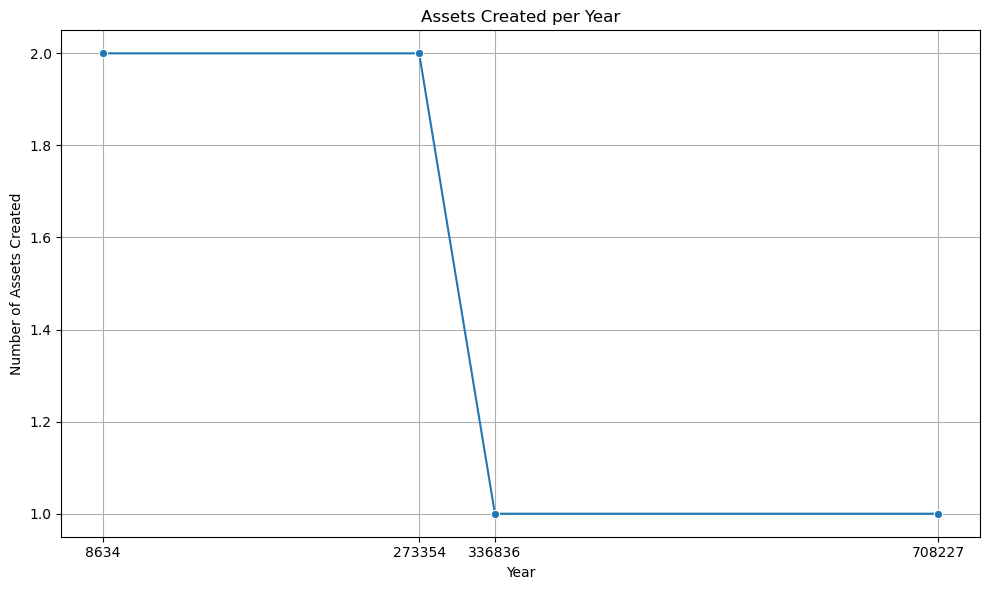


--- 8. Data Quality Checks ---

  Missing values in Assets table:
+---+-----+-----+----+-------+--------------+----------+-------------------+-------------------+----------------------------+------------------+-----------------+------+--------+---------+-------+-------+---------+---------+----------+---------+---------+----------+--------+-------------+--------------+-------------------------+--------------------+-------------------+--------------------+--------------------------+----------+----------------------+---------+-------------+-----+-------------------+------+--------------------+-------+-----------+----------------+-------------------+--------------+-----------------------+-------+----------+-----------------------------+-------------+--------------------+-------------------------+-------------+-------------------+-------------------+------------------+------------------+-----------------------+--------------------+-----------+------------+-------+--------------------+
| ID

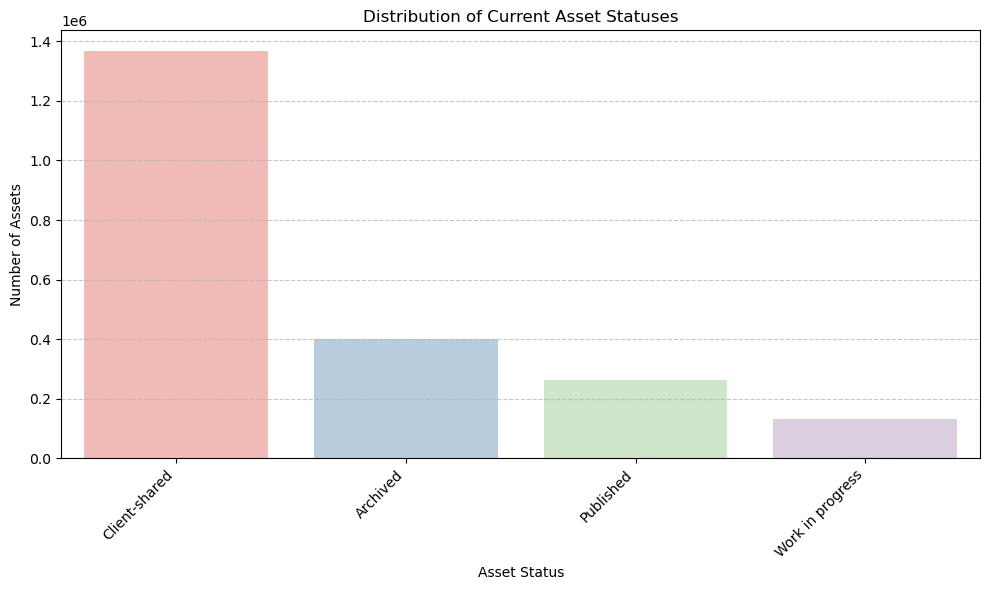


--- 13. Asset Class Attribute Completeness ---
  Found 104463 attribute completeness records.

  Asset Class Attribute Completeness (Top 20 by Completeness):
+----------------------------------------------+---------------------------------+--------------+-------------+----------------------+
|AssetClassName                                |AttributeName                    |PopulatedCount|TotalRequired|CompletenessPercentage|
+----------------------------------------------+---------------------------------+--------------+-------------+----------------------+
|(C2) North Portal Chiltern Tunnels to Brackley|Design Stage                     |0             |2            |0.0                   |
|(C2) North Portal Chiltern Tunnels to Brackley|Document Number                  |0             |2            |0.0                   |
|(C2) North Portal Chiltern Tunnels to Brackley|Document Revision Number         |0             |2            |0.0                   |
|(C2) North Portal Chiltern Tun

In [25]:
# Import necessary PySpark functions
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, countDistinct, when, isnull, avg, sum, min, max, round, concat_ws, lit, expr, year, month, quarter, to_date, current_date
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'spark' SparkSession is already available in Fabric Notebook

# # --- Configuration ---
# DATABASE_NAME = "AimsDataFromBlob2025" # Your main database
# SCHEMA_NAME = "aims_dbo" # Your source schema
# INSIGHTS_SCHEMA_NAME = "aims_dbo_insights" # New schema for insights

# --- Function to load a table (with better diagnostics) ---
def load_table(table_name):
    full_table_name = f"{DATABASE_NAME}.{SCHEMA_NAME}.{table_name}"
    print(f"Attempting to load table: {full_table_name}")
    try:
        df = spark.read.table(full_table_name)
        print(f"Successfully loaded {table_name}.")
        print(f"Schema for {table_name}:")
        df.printSchema()
        print(f"First 5 rows for {table_name}:")
        df.show(5, truncate=False)
        print(f"Row count for {table_name}: {df.count()}")
        return df
    except Exception as e:
        print(f"ERROR: Failed to load table {table_name} from {full_table_name}: {e}")
        return None

# --- Create the Insights Schema ---
print(f"\n--- Ensuring schema {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME} exists ---")
try:
    spark.sql(f"CREATE SCHEMA IF NOT EXISTS {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}")
    print(f"Schema {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME} ensured to exist.")
except Exception as e:
    print(f"ERROR: Failed to create/ensure schema {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}: {e}")

# --- Load Core Entities ---
df_assets = load_table("Assets_csv")
df_asset_classes = load_table("AssetClasses")
df_attributes = load_table("Attributes")
df_attribute_domains = load_table("AttributeDomains")
df_attribute_groups = load_table("AttributeGroups")
df_owners = load_table("Owners")
df_asset_attributes = load_table("AssetAttributes_csv")
df_stages = load_table("Stages")
df_asset_statuses = load_table("AssetStatuses")
df_people = load_table("People")
df_organisations = load_table("Organisations")
df_asset_locations = load_table("AssetLocations_csv")
df_links = load_table("Links")
df_relationships = load_table("Relationships_csv")
df_relationship_types = load_table("RelationshipTypes")
df_secondary_coding_systems = load_table("SecondaryCodingSystems")
df_secondary_codings = load_table("SecondaryCodings")
df_routes = load_table("Routes")
df_asset_class_attributes = load_table("AssetClassAttributes")


# --- Initial DataFrame Loading Status Check ---
print("\n--- Initial DataFrame Loading Status Check ---")
dfs_to_check = {
    "df_assets": df_assets,
    "df_asset_classes": df_asset_classes,
    "df_owners": df_owners,
    "df_organisations": df_organisations,
    "df_stages": df_stages,
    "df_asset_statuses": df_asset_statuses,
    "df_asset_locations": df_asset_locations,
    "df_attributes": df_attributes,
    "df_asset_attributes": df_asset_attributes,
    "df_relationships": df_relationships,
    "df_relationship_types": df_relationship_types,
    "df_routes": df_routes,
    "df_asset_class_attributes": df_asset_class_attributes
}

for df_name, df_obj in dfs_to_check.items():
    if df_obj is None:
        print(f"  CRITICAL ERROR: {df_name} is None. Table failed to load. Check previous 'ERROR: Failed to load table' messages for details.")
    else:
        print(f"  {df_name} loaded successfully.")
print("\n--- End of Initial DataFrame Loading Status Check ---")


# --- Detailed Analysis Examples ---

print("\n--- Starting Business Intelligence Insights Generation ---")

# 1. Asset Inventory by Class, Stage, and Owner
if all(df is not None for df in [df_assets, df_asset_classes, df_stages, df_asset_statuses, df_owners, df_asset_locations]):
    print("\n--- 1. Asset Inventory by Class, Stage, and Owner ---")
    print("  NOTE: 'OwnerOrganisationName' has been removed from this analysis as the provided 'Owners' schema does not contain an 'ORGANISATION' column to link to the 'Organisations' table.")

    assets_with_class = df_assets.join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "left")

    asset_summary = assets_with_class.join(df_asset_classes, assets_with_class.ASSETCLASS == df_asset_classes.ID, "left") \
                                     .join(df_stages, df_assets.STAGE == df_stages.ID, "left") \
                                     .join(df_asset_statuses, df_assets.STATUS == df_asset_statuses.ID, "left") \
                                     .join(df_owners, df_assets.OWNER == df_owners.ID, "left") \
                                     .groupBy(
                                         col("AssetClasses.NAME").alias("AssetClassName"),
                                         col("Stages.DESCRIPTION").alias("StageDescription"),
                                         col("AssetStatuses.NAME").alias("AssetStatus"),
                                         col("Owners.NAME").alias("OwnerName")
                                     ) \
                                     .agg(
                                         count(col("Assets_csv.ID")).alias("TotalAssets"),
                                         avg(col("Assets_csv.LENGTH").cast("double")).alias("AverageLength")
                                     ) \
                                     .orderBy(col("TotalAssets").desc())

    num_asset_summary = asset_summary.count()
    print(f"  Found {num_asset_summary} asset inventory summaries.")
    if num_asset_summary > 0:
        asset_summary.show(truncate=False)
        # Persist to Delta Table
        try:
            asset_summary.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetInventorySummary")
            print(f"  Successfully persisted AssetInventorySummary to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetInventorySummary")
        except Exception as e:
            print(f"  ERROR: Failed to persist AssetInventorySummary: {e}")

        if num_asset_summary < 1000:
            try:
                asset_summary_pd = asset_summary.toPandas()
                plt.figure(figsize=(12, 6))
                sns.barplot(data=asset_summary_pd.head(10), x="AssetClassName", y="TotalAssets", hue="StageDescription")
                plt.title('Top 10 Asset Classes by Total Assets and Stage')
                plt.xlabel('Asset Class')
                plt.ylabel('Total Assets')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Asset Inventory: {e}")
        else:
            print("  Too many rows for direct Pandas plotting. Displaying top 10 table results.")
    else:
        print("  No asset inventory data found.")
else:
    print("  Skipping Asset Inventory by Class, Stage, and Owner: Required DataFrames not loaded or schema mismatch (Owner Organisation).")


# 2. Most Common Asset Attributes
if df_asset_attributes is not None and df_attributes is not None:
    print("\n--- 2. Most Common Asset Attributes ---")
    common_attributes = df_asset_attributes.join(df_attributes, df_asset_attributes.ATTRIBUTE == df_attributes.ID, "left") \
                                            .groupBy(col("Attributes.NAME").alias("AttributeName"), col("Attributes.TYPE").alias("AttributeType")) \
                                            .agg(count(df_asset_attributes.ID).alias("AttributeUsageCount")) \
                                            .orderBy(col("AttributeUsageCount").desc())

    num_common_attributes = common_attributes.count()
    print(f"  Found {num_common_attributes} common attributes.")
    if num_common_attributes > 0:
        common_attributes.show(10, truncate=False)
        # Persist to Delta Table
        try:
            common_attributes.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.MostCommonAttributes")
            print(f"  Successfully persisted MostCommonAttributes to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.MostCommonAttributes")
        except Exception as e:
            print(f"  ERROR: Failed to persist MostCommonAttributes: {e}")

        if num_common_attributes < 1000:
            try:
                common_attributes_pd = common_attributes.toPandas()
                plt.figure(figsize=(10, 6))
                sns.barplot(data=common_attributes_pd.head(10), x="AttributeName", y="AttributeUsageCount", hue="AttributeType")
                plt.title('Top 10 Most Used Asset Attributes')
                plt.xlabel('Attribute Name')
                plt.ylabel('Usage Count')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Most Common Asset Attributes: {e}")
    else:
        print("  No common asset attributes found.")
else:
    print("  Skipping Most Common Asset Attributes: Required DataFrames not loaded.")

# 3. Assets with Missing Critical Attributes (Example: Assets without a "Material" attribute)
if df_assets is not None and df_asset_attributes is not None and df_attributes is not None:
    print("\n--- 3. Assets with Missing Critical Attributes (e.g., 'Material') ---")
    material_attribute_id_df = df_attributes.filter(col("NAME") == "Material").select("ID").collect()
    if material_attribute_id_df:
        material_attribute_id = material_attribute_id_df[0]["ID"]

        assets_with_material = df_asset_attributes.filter(col("ATTRIBUTE") == material_attribute_id) \
                                                  .select(col("ASSET").alias("AssetID_WithMaterial"))

        assets_without_material = df_assets.join(assets_with_material, df_assets.ID == assets_with_material.AssetID_WithMaterial, "left_anti")

        num_assets_without_material = assets_without_material.count()
        print(f"  Assets without 'Material' attribute: {num_assets_without_material} found.")
        if num_assets_without_material > 0:
            assets_without_material.select("ID", "NAME").show(10, truncate=False)
            # Persist to Delta Table
            try:
                assets_without_material.select("ID", "NAME").write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetsWithoutMaterial")
                print(f"  Successfully persisted AssetsWithoutMaterial to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetsWithoutMaterial")
            except Exception as e:
                print(f"  ERROR: Failed to persist AssetsWithoutMaterial: {e}")
        else:
            print("  All assets appear to have a 'Material' attribute.")
    else:
        print("  'Material' attribute not found in Attributes table.")
else:
    print("  Skipping Assets with Missing Critical Attributes: Required DataFrames not loaded.")


# 4. Hierarchical Asset Class Analysis (Parent-Child relationships)
if df_asset_classes is not None and df_assets is not None and df_asset_locations is not None:
    print("\n--- 4. Hierarchical Asset Class Analysis ---")
    hierarchical_classes = df_asset_classes.alias("child") \
                                           .join(df_asset_classes.alias("parent"), col("child.PARENT") == col("parent.ID"), "left") \
                                           .select(
                                               col("child.NAME").alias("ChildAssetClass"),
                                               col("parent.NAME").alias("ParentAssetClass")
                                           )
    num_hierarchical_classes = hierarchical_classes.count()
    print(f"  Found {num_hierarchical_classes} asset class parent-child relationships.")
    if num_hierarchical_classes > 0:
        print("  Asset Class Parent-Child Relationships:")
        hierarchical_classes.show(10, truncate=False)
        # Persist to Delta Table
        try:
            hierarchical_classes.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetClassHierarchy")
            print(f"  Successfully persisted AssetClassHierarchy to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetClassHierarchy")
        except Exception as e:
            print(f"  ERROR: Failed to persist AssetClassHierarchy: {e}")

    root_classes = df_asset_classes.filter(col("PARENT").isNull())
    if df_assets is not None and df_asset_locations is not None:
        assets_by_root_class = df_assets.join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "inner") \
                                        .join(df_asset_classes, df_asset_locations.ASSETCLASS == df_asset_classes.ID, "inner") \
                                        .withColumn("root_asset_class",
                                            when(col("AssetClasses.PARENT").isNull(), col("AssetClasses.NAME")) \
                                            .otherwise("Nested Class")) \
                                        .groupBy("root_asset_class") \
                                        .agg(count(col("Assets_csv.ID")).alias("CountOfAssets")) \
                                        .orderBy(col("CountOfAssets").desc())
        num_assets_by_root_class = assets_by_root_class.count()
        print(f"  Found {num_assets_by_root_class} root asset classes with associated assets.")
        if num_assets_by_root_class > 0:
            print("\n  Assets by Root Asset Class:")
            assets_by_root_class.show(truncate=False)
            # Persist to Delta Table
            try:
                assets_by_root_class.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetsByRootClass")
                print(f"  Successfully persisted AssetsByRootClass to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetsByRootClass")
            except Exception as e:
                print(f"  ERROR: Failed to persist AssetsByRootClass: {e}")
        else:
            print("  No assets found associated with root asset classes.")
    else:
        print("  Skipping Assets by Root Asset Class: Required DataFrames (df_assets, df_asset_locations) not loaded.")
else:
    print("  Skipping Hierarchical Asset Class Analysis: Required DataFrames not loaded.")


# 5. Asset Relationship Analysis (e.g., "Connected To" or "Part Of")
if df_relationships is not None and df_relationship_types is not None and df_assets is not None:
    print("\n--- 5. Asset Relationship Analysis ---")
    asset_relationships_detail = df_relationships.join(df_relationship_types, df_relationships.RELATIONSHIPTYPE == df_relationship_types.ID, "left") \
                                                .join(df_assets.alias("source_asset"), df_relationships.SOURCEASSET == col("source_asset.ID"), "left") \
                                                .join(df_assets.alias("target_asset"), df_relationships.TARGETASSET == col("target_asset.ID"), "left") \
                                                .select(
                                                    col("source_asset.NAME").alias("SourceAssetName"),
                                                    col("source_asset.NOTES").alias("SourceAssetDescription"),
                                                    col("RelationshipTypes.DESCRIPTION").alias("RelationshipType"),
                                                    col("target_asset.NAME").alias("TargetAssetName"),
                                                    col("target_asset.NOTES").alias("TargetAssetDescription")
                                                )
    num_relationships_detail = asset_relationships_detail.count()
    print(f"  Found {num_relationships_detail} detailed asset relationships.")
    if num_relationships_detail > 0:
        print("  Detailed Asset Relationships:")
        asset_relationships_detail.show(10, truncate=False)
        # Persist to Delta Table
        try:
            asset_relationships_detail.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetRelationshipDetails")
            print(f"  Successfully persisted AssetRelationshipDetails to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetRelationshipDetails")
        except Exception as e:
            print(f"  ERROR: Failed to persist AssetRelationshipDetails: {e}")

    relationship_type_counts = asset_relationships_detail.groupBy("RelationshipType").agg(count("RelationshipType").alias("Count"))
    num_relationship_type_counts = relationship_type_counts.count()
    print(f"  Found {num_relationship_type_counts} relationship types.")
    if num_relationship_type_counts > 0:
        print("\n  Relationship Type Counts:")
        relationship_type_counts.show(truncate=False)
        # Persist to Delta Table
        try:
            relationship_type_counts.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetRelationshipTypeCounts")
            print(f"  Successfully persisted AssetRelationshipTypeCounts to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetRelationshipTypeCounts")
        except Exception as e:
            print(f"  ERROR: Failed to persist AssetRelationshipTypeCounts: {e}")
    else:
        print("  No relationship type counts found.")
else:
    print("  Skipping Asset Relationship Analysis: Required DataFrames not loaded.")


# 6. Analysis of Assets by Location (e.g., count assets per route)
if df_assets is not None and df_asset_locations is not None and df_routes is not None:
    print("\n--- 6. Assets by Location/Route ---")
    assets_by_route = df_asset_locations.join(df_assets, df_asset_locations.ASSET == df_assets.ID, "left") \
                                        .join(df_routes, df_asset_locations.ROUTE == df_routes.ID, "left") \
                                        .groupBy(col("Routes.DESCRIPTION").alias("RouteDescription"), col("Routes.CODE").alias("RouteCode")) \
                                        .agg(count(col("Assets_csv.ID")).alias("TotalAssetsOnRoute")) \
                                        .orderBy(col("TotalAssetsOnRoute").desc())
    num_assets_by_route = assets_by_route.count()
    print(f"  Found {num_assets_by_route} routes with assets.")
    if num_assets_by_route > 0:
        print("  Total Assets by Route:")
        assets_by_route.show(10, truncate=False)
        # Persist to Delta Table
        try:
            assets_by_route.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetsByRoute")
            print(f"  Successfully persisted AssetsByRoute to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetsByRoute")
        except Exception as e:
            print(f"  ERROR: Failed to persist AssetsByRoute: {e}")
    else:
        print("  No assets found on any routes.")
else:
    print("  Skipping Assets by Location/Route: Required DataFrames not loaded.")

# 7. Time-based Analysis (Assets created per month/year)
if df_assets is not None and "KINO_CWHEN" in df_assets.columns:
    print("\n--- 7. Assets Created Over Time ---")
    df_assets_with_date = df_assets.withColumn("CreationDate", to_date(col("KINO_CWHEN"))) \
                                   .filter(col("CreationDate").isNotNull()) \
                                   .withColumn("CreationYear", year(col("CreationDate"))) \
                                   .withColumn("CreationQuarter", quarter(col("CreationDate"))) \
                                   .withColumn("CreationMonth", month(col("CreationDate")))

    quarterly_assets = df_assets_with_date.groupBy("CreationYear", "CreationQuarter") \
                                              .agg(count("ID").alias("AssetsCreated")) \
                                              .orderBy("CreationYear", "CreationQuarter")
    num_quarterly_periods = quarterly_assets.count()
    print(f"  Found {num_quarterly_periods} quarterly periods with asset creation data.")
    if num_quarterly_periods > 0:
        print("\n  Quarterly Asset Creation:")
        quarterly_assets.show(20, truncate=False)
        # Persist to Delta Table
        try:
            quarterly_assets.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.QuarterlyAssetCreation")
            print(f"  Successfully persisted QuarterlyAssetCreation to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.QuarterlyAssetCreation")
        except Exception as e:
            print(f"  ERROR: Failed to persist QuarterlyAssetCreation: {e}")

    yearly_assets = df_assets_with_date.groupBy("CreationYear") \
                                          .agg(count("ID").alias("AssetsCreated")) \
                                          .orderBy("CreationYear")
    num_yearly_periods = yearly_assets.count()
    print(f"  Found {num_yearly_periods} yearly periods with asset creation data.")
    if num_yearly_periods > 0:
        print("\n  Yearly Asset Creation:")
        yearly_assets.show(20, truncate=False)
        # Persist to Delta Table
        try:
            yearly_assets.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.YearlyAssetCreation")
            print(f"  Successfully persisted YearlyAssetCreation to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.YearlyAssetCreation")
        except Exception as e:
            print(f"  ERROR: Failed to persist YearlyAssetCreation: {e}")

        if num_yearly_periods > 0 and num_yearly_periods < 30:
            try:
                yearly_assets_pd = yearly_assets.toPandas()
                yearly_assets_pd["CreationYear"] = yearly_assets_pd["CreationYear"].fillna(0).astype(int)

                plt.figure(figsize=(10, 6))
                sns.lineplot(data=yearly_assets_pd, x="CreationYear", y="AssetsCreated", marker='o')
                plt.title('Assets Created per Year')
                plt.xlabel('Year')
                plt.ylabel('Number of Assets Created')
                plt.xticks(yearly_assets_pd["CreationYear"].unique())
                plt.grid(True)
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Yearly Asset Creation: {e}")
                if 'yearly_assets_pd' in locals():
                    print("  Debug info: First 5 rows of yearly_assets_pd that caused error:")
                    print(yearly_assets_pd.head())
        else:
            print("  Too many years for direct line plot visualization or no data.")
    else:
        print("  No yearly asset creation data found.")
else:
    print("  Skipping Assets Created Over Time: Required DataFrame df_assets not loaded or 'KINO_CWHEN' column missing.")

# 8. Data Quality Checks (Missing Values, Duplicates, etc.)
print("\n--- 8. Data Quality Checks ---")
if df_assets:
    print("\n  Missing values in Assets table:")
    missing_values_df = df_assets.select([count(when(isnull(c), c)).alias(c) for c in df_assets.columns])
    missing_values_df.show()
    # Persist to Delta Table (Transpose for easier consumption if needed)
    try:
        # It's often easier to consume this as a single row or transposed
        # For simplicity, let's keep it as is, but note it's wide
        missing_values_df.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetsMissingValuesSummary")
        print(f"  Successfully persisted AssetsMissingValuesSummary to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetsMissingValuesSummary")
    except Exception as e:
        print(f"  ERROR: Failed to persist AssetsMissingValuesSummary: {e}")

    print("\n  Duplicate Asset IDs:")
    duplicate_ids = df_assets.groupBy("ID").agg(count("ID").alias("Count")).filter("Count > 1")
    num_duplicate_ids = duplicate_ids.count()
    print(f"  Found {num_duplicate_ids} duplicate Asset IDs.")
    if num_duplicate_ids > 0:
        duplicate_ids.show(truncate=False)
        # Persist to Delta Table
        try:
            duplicate_ids.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.DuplicateAssetIDs")
            print(f"  Successfully persisted DuplicateAssetIDs to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.DuplicateAssetIDs")
        except Exception as e:
            print(f"  ERROR: Failed to persist DuplicateAssetIDs: {e}")
    else:
        print("  No duplicate Asset IDs found.")
else:
    print("  Skipping Data Quality Checks: df_assets not loaded.")

# 9. Value Distribution for Key Categorical Attributes (Asset Class via AssetLocations)
if df_assets is not None and df_asset_locations is not None and df_asset_classes is not None:
    print("\n--- 9. Value Distribution: Asset Class ---")
    asset_class_distribution = df_assets.join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "left") \
             .join(df_asset_classes, df_asset_locations.ASSETCLASS == df_asset_classes.ID, "left") \
             .groupBy(col("AssetClasses.NAME").alias("AssetClassName")) \
             .agg(count(col("Assets_csv.ID")).alias("AssetCount")) \
             .orderBy(col("AssetCount").desc())
    num_asset_class_distribution = asset_class_distribution.count()
    print(f"  Found {num_asset_class_distribution} asset classes with associated assets.")
    if num_asset_class_distribution > 0:
        asset_class_distribution.show(20, truncate=False)
        # Persist to Delta Table
        try:
            asset_class_distribution.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetClassDistribution")
            print(f"  Successfully persisted AssetClassDistribution to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetClassDistribution")
        except Exception as e:
            print(f"  ERROR: Failed to persist AssetClassDistribution: {e}")
    else:
        print("  No asset class distribution data found.")
else:
    print("  Skipping Value Distribution: Asset Class: Required DataFrames not loaded.")

# 10. Analyzing Specific Attribute Values (e.g., average length of bridges)
if all(df is not None for df in [df_asset_attributes, df_attributes, df_assets, df_asset_locations, df_asset_classes]):
    print("\n--- 10. Analyzing Specific Attribute Values (e.g., 'Length' for 'Bridge') ---")
    length_attribute_id_df = df_attributes.filter(col("NAME") == "Length").select("ID").collect()
    bridge_asset_class_id_df = df_asset_classes.filter(col("NAME") == "Bridge").select("ID").collect()

    if length_attribute_id_df and bridge_asset_class_id_df:
        length_attr_id = length_attribute_id_df[0]["ID"]
        bridge_class_id = bridge_class_id_df[0]["ID"]

        bridge_lengths = df_asset_attributes.filter(col("ATTRIBUTE") == length_attr_id) \
                                            .join(df_assets, df_asset_attributes.ASSET == df_assets.ID, "inner") \
                                            .join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "inner") \
                                            .filter(col("AssetLocations_csv.ASSETCLASS") == bridge_class_id) \
                                            .select(col("NUMERICVALUE").cast("double").alias("Length"))

        num_bridge_lengths = bridge_lengths.count()
        print(f"  Found {num_bridge_lengths} 'Length' attribute records for 'Bridge' assets.")
        if num_bridge_lengths > 0:
            bridge_lengths_stats = bridge_lengths.agg(
                avg("Length").alias("AverageBridgeLength"),
                min("Length").alias("MinBridgeLength"),
                max("Length").alias("MaxBridgeLength")
            )
            print("  Statistics for 'Length' attribute on 'Bridge' assets:")
            bridge_lengths_stats.show(truncate=False)
            # Persist to Delta Table
            try:
                bridge_lengths_stats.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.BridgeLengthStatistics")
                print(f"  Successfully persisted BridgeLengthStatistics to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.BridgeLengthStatistics")
            except Exception as e:
                print(f"  ERROR: Failed to persist BridgeLengthStatistics: {e}")
        else:
            print("  No 'Length' attributes found for 'Bridge' assets.")
    else:
        print("  Could not find 'Length' attribute or 'Bridge' asset class in the lookup tables.")
else:
    print("  Skipping Analyzing Specific Attribute Values: Required DataFrames not loaded.")


# --- NEW ADVANCED ANALYSES ---

# 11. Asset Age Distribution
if df_assets is not None and "KINO_CWHEN" in df_assets.columns:
    print("\n--- 11. Asset Age Distribution ---")
    df_assets_for_age = df_assets.withColumn("CreationDate", to_date(col("KINO_CWHEN"))) \
                                 .filter(col("CreationDate").isNotNull())

    if df_assets_for_age.count() > 0:
        asset_age_df = df_assets_for_age.withColumn("AssetAgeYears", year(current_date()) - year(col("CreationDate"))) \
                                        .filter(col("AssetAgeYears") >= 0)

        asset_age_distribution = asset_age_df.groupBy("AssetAgeYears") \
                                             .agg(count("ID").alias("NumberOfAssets")) \
                                             .orderBy("AssetAgeYears")

        num_age_bins = asset_age_distribution.count()
        print(f"  Found {num_age_bins} distinct asset age bins.")
        if num_age_bins > 0:
            print("\n  Asset Age Distribution:")
            asset_age_distribution.show(20, truncate=False)
            # Persist to Delta Table
            try:
                asset_age_distribution.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetAgeDistribution")
                print(f"  Successfully persisted AssetAgeDistribution to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetAgeDistribution")
            except Exception as e:
                print(f"  ERROR: Failed to persist AssetAgeDistribution: {e}")

            if num_age_bins < 50:
                try:
                    asset_age_pd = asset_age_distribution.toPandas()
                    plt.figure(figsize=(12, 6))
                    sns.barplot(data=asset_age_pd, x="AssetAgeYears", y="NumberOfAssets", palette="viridis")
                    plt.title('Distribution of Asset Age (in Years)')
                    plt.xlabel('Asset Age (Years)')
                    plt.ylabel('Number of Assets')
                    plt.xticks(rotation=45, ha='right')
                    plt.grid(axis='y', linestyle='--', alpha=0.7)
                    plt.tight_layout()
                    plt.show()

                    plt.figure(figsize=(10, 5))
                    sns.kdeplot(asset_age_pd['AssetAgeYears'], fill=True, color='skyblue')
                    plt.title('Kernel Density Estimate of Asset Age Distribution')
                    plt.xlabel('Asset Age (Years)')
                    plt.ylabel('Density')
                    plt.grid(True)
                    plt.tight_layout()
                    plt.show()

                except Exception as e:
                    print(f"  Error generating plot for Asset Age Distribution: {e}")
            else:
                print("  Too many age bins for direct plotting. Displaying table results.")
        else:
            print("  No asset age data found for distribution.")
    else:
        print("  No valid asset creation dates found for age analysis.")
else:
    print("  Skipping Asset Age Distribution: df_assets not loaded or 'KINO_CWHEN' column missing.")

# 12. Asset Status Distribution (Current Statuses)
if df_assets is not None and df_asset_statuses is not None:
    print("\n--- 12. Asset Status Distribution ---")
    asset_status_dist = df_assets.join(df_asset_statuses, df_assets.STATUS == df_asset_statuses.ID, "left") \
                                 .groupBy(col("AssetStatuses.NAME").alias("AssetStatusName")) \
                                 .agg(count(col("Assets_csv.ID")).alias("NumberOfAssets")) \
                                 .orderBy(col("NumberOfAssets").desc())

    num_statuses = asset_status_dist.count()
    print(f"  Found {num_statuses} distinct asset statuses.")
    if num_statuses > 0:
        print("\n  Asset Status Distribution:")
        asset_status_dist.show(truncate=False)
        # Persist to Delta Table
        try:
            asset_status_dist.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetStatusDistribution")
            print(f"  Successfully persisted AssetStatusDistribution to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetStatusDistribution")
        except Exception as e:
            print(f"  ERROR: Failed to persist AssetStatusDistribution: {e}")

        if num_statuses < 50:
            try:
                asset_status_pd = asset_status_dist.toPandas()
                plt.figure(figsize=(10, 6))
                sns.barplot(data=asset_status_pd, x="AssetStatusName", y="NumberOfAssets", palette="Pastel1")
                plt.title('Distribution of Current Asset Statuses')
                plt.xlabel('Asset Status')
                plt.ylabel('Number of Assets')
                plt.xticks(rotation=45, ha='right')
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"  Error generating plot for Asset Status Distribution: {e}")
        else:
            print("  Too many statuses for direct plotting. Displaying table results.")
    else:
        print("  No asset status data found.")
else:
    print("  Skipping Asset Status Distribution: Required DataFrames not loaded.")


# 13. Asset Class Attribute Completeness (Advanced Data Quality)
if all(df is not None for df in [df_asset_classes, df_asset_class_attributes, df_attributes, df_asset_attributes, df_assets, df_asset_locations]):
    print("\n--- 13. Asset Class Attribute Completeness ---")

    required_attributes_per_class = df_asset_class_attributes.join(df_asset_classes, df_asset_class_attributes.ASSETCLASS == df_asset_classes.ID, "inner") \
                                                              .join(df_attributes, df_asset_class_attributes.ATTRIBUTE == df_attributes.ID, "inner") \
                                                              .select(
                                                                  col("AssetClasses.ID").alias("AssetClassID"),
                                                                  col("AssetClasses.NAME").alias("AssetClassName"),
                                                                  col("Attributes.ID").alias("AttributeID"),
                                                                  col("Attributes.NAME").alias("AttributeName")
                                                              )

    asset_attribute_actual_presence = df_asset_attributes.join(df_assets, df_asset_attributes.ASSET == df_assets.ID, "inner") \
                                                         .join(df_asset_locations, df_assets.ID == df_asset_locations.ASSET, "inner") \
                                                         .select(
                                                             col("AssetLocations_csv.ASSETCLASS").alias("ActualAssetClassID"),
                                                             col("AssetAttributes_csv.ATTRIBUTE").alias("ActualAttributeID"),
                                                             col("AssetAttributes_csv.ASSET").alias("AssetID_Actual")
                                                         ).distinct()

    attribute_completeness = required_attributes_per_class.alias("req") \
        .join(asset_attribute_actual_presence.alias("actual"),
              (col("req.AttributeID") == col("actual.ActualAttributeID")) &
              (col("req.AssetClassID") == col("actual.ActualAssetClassID")),
              "left_outer") \
        .groupBy("req.AssetClassName", "req.AttributeName") \
        .agg(
            count(col("actual.AssetID_Actual")).alias("PopulatedCount"),
            count(lit(1)).alias("TotalRequired")
        ) \
        .withColumn("CompletenessPercentage", round((col("PopulatedCount") / col("TotalRequired")) * 100, 2)) \
        .orderBy(col("CompletenessPercentage"), col("AssetClassName"), col("AttributeName"))

    num_attribute_completeness = attribute_completeness.count()
    print(f"  Found {num_attribute_completeness} attribute completeness records.")

    if num_attribute_completeness > 0:
        print("\n  Asset Class Attribute Completeness (Top 20 by Completeness):")
        attribute_completeness.show(20, truncate=False)
        # Persist to Delta Table
        try:
            attribute_completeness.write.mode("overwrite").format("delta").saveAsTable(f"{DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetClassAttributeCompleteness")
            print(f"  Successfully persisted AssetClassAttributeCompleteness to {DATABASE_NAME}.{INSIGHTS_SCHEMA_NAME}.AssetClassAttributeCompleteness")
        except Exception as e:
            print(f"  ERROR: Failed to persist AssetClassAttributeCompleteness: {e}")

        if num_attribute_completeness < 200:
            try:
                avg_completeness_per_class = attribute_completeness.groupBy("AssetClassName") \
                                                                    .agg(avg("CompletenessPercentage").alias("AvgCompleteness")) \
                                                                    .orderBy(col("AvgCompleteness").desc())

                avg_completeness_pd = avg_completeness_per_class.toPandas()

                plt.figure(figsize=(12, 7))
                sns.barplot(data=avg_completeness_pd.head(20), x="AssetClassName", y="AvgCompleteness", palette="coolwarm")
                plt.title('Average Attribute Completeness per Asset Class (Top 20)')
                plt.xlabel('Asset Class Name')
                plt.ylabel('Average Completeness (%)')
                plt.xticks(rotation=60, ha='right')
                plt.ylim(0, 100)
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.tight_layout()
                plt.show()

            except Exception as e:
                print(f"  Error generating plot for Asset Class Attribute Completeness: {e}")
        else:
            print("  Too many completeness records for direct plotting. Displaying table results.")
    else:
        print("  No asset class attribute completeness data found.")
else:
    print("  Skipping Asset Class Attribute Completeness: Required DataFrames not loaded.")


print("\n--- Advanced Analysis Complete ---")
print(f"\n--- All generated insights are being persisted to tables in the '{INSIGHTS_SCHEMA_NAME}' schema within your '{DATABASE_NAME}' data lake. ---")

In [26]:
df = spark.sql("SELECT * FROM AimsDataFromBlob2025.aims_dbo_insights.assetsbyrootclass LIMIT 1000")
display(df)

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 28, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 2ec537cd-6a9a-42bd-a22e-db0dd84bd37a)

In [27]:
df = spark.sql("SELECT * FROM AimsDataFromBlob2025.aims_dbo_insights.assetsmissingvaluessummary LIMIT 1000")
display(df)

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 29, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, ed14b1d4-64c9-4a5a-9ca7-3a8516c9e242)

In [28]:
df = spark.sql("SELECT * FROM AimsDataFromBlob2025.aims_dbo_insights.assetclassattributecompleteness LIMIT 1000")
display(df)

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 30, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 73b45e2b-0eac-4a51-aab7-6c97f4a5febf)

In [29]:
df = spark.sql("SELECT * FROM AimsDataFromBlob2025.aims_dbo_insights.assetinventorysummary LIMIT 1000")
display(df)

StatementMeta(, cc620579-3ad5-48db-8335-5a8cd68b5cf3, 31, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 1a954f86-86cb-4761-97cd-94a64a54f4fa)

In [22]:
from notebookutils import mssparkutils
import os
from urllib.parse import urlparse

def list_csv_files_recursive(base_path):
    csv_files = []

    def walk(path):
        for item in mssparkutils.fs.ls(path):
            if item.isDir:
                walk(item.path)
            elif item.path.endswith(".csv") or item.path.endswith(".csv.gz"):
                csv_files.append(item.path)

    walk(base_path)
    return csv_files

# ✅ Use this to get all CSV files
csv_files = list_csv_files_recursive("Files/")
print(f"📁 Found {len(csv_files)} CSV files")

def detect_header_and_read_csv(path, lines_to_check=20):
    # Step 1: Read file as raw lines with line numbers
    raw_lines_rdd = spark.read.text(path).rdd.map(lambda r: r[0])
    total_raw_rows = raw_lines_rdd.count() # Count total raw rows
    
    # Add line numbers to raw lines for header detection
    raw_lines_with_index = raw_lines_rdd.zipWithIndex()
    preview = raw_lines_with_index.take(lines_to_check)

    # Step 2: Score lines to find best candidate for header
    def score(line_tuple):
        line = line_tuple[0]
        return line.count(",") + line.count('"')

    header_line = max(preview, key=score)
    header_index = header_line[1]
    header_raw = header_line[0]

    # Step 3: Parse header fields
    header_fields = [col.strip().strip('"').replace('\ufeff', '') for col in header_raw.split(",")]
    num_fields = len(header_fields)

    print(f"📌 Header detected in {path} at line {header_index}: {header_fields}")

    # Step 4: Get only data lines AFTER the header
    data_lines_after_header_rdd = (
        raw_lines_with_index
        .filter(lambda x: x[1] > header_index)
        .map(lambda x: x[0])
    )
    rows_after_header = data_lines_after_header_rdd.count() # Count lines after header

    # Filter for valid lines based on number of fields
    valid_data_lines_rdd = data_lines_after_header_rdd.filter(lambda line: line.count(",") >= num_fields - 1)
    valid_rows = valid_data_lines_rdd.count()

    invalid_rows = rows_after_header - valid_rows

    # Step 5: Save cleaned lines to OneLake temp location
    filename = os.path.splitext(os.path.basename(path))[0].replace(".", "_").lower()
    temp_path = f"{output_path}/{filename}"

    try:
        fs = spark._jvm.org.apache.hadoop.fs.FileSystem.get(spark._jsc.hadoopConfiguration())
        hadoop_path = spark._jvm.org.apache.hadoop.fs.Path(temp_path)
        if fs.exists(hadoop_path):
            fs.delete(hadoop_path, True)
    except Exception as cleanup_err:
        print(f"⚠️ Could not clean temp path: {cleanup_err}")

    valid_data_lines_rdd.saveAsTextFile(temp_path)

    # Step 6: Read back the cleaned lines
    df = spark.read.option("header", "false").csv(temp_path)
    
    # Step 7: Force column count alignment
    actual_fields = len(df.columns)
    if actual_fields != num_fields:
        print(f"⚠️ Mismatch: {actual_fields} fields in data vs {num_fields} in header. Trimming/padding...")

        # Pad with dummy columns or trim extra columns
        if actual_fields > num_fields:
            df = df.select(df.columns[:num_fields])
        else:
            df = df.selectExpr("*", *["null as dummy_col_" + str(i) for i in range(num_fields - actual_fields)])

    df = df.toDF(*header_fields)

    return df, {
        "raw_rows": total_raw_rows,
        "rows_after_header": rows_after_header,
        "valid_rows": valid_rows,
        "invalid_rows": invalid_rows,
        "filename": os.path.basename(path)
    }

# Setup
parsed_dfs = {}
successfully_loaded = []
failed_to_load = []

successfully_written = []
failed_to_write = []

processing_summary = [] # New list to store summary data

TARGET_SCHEMA = "aims_dbo3"  # e.g., 'bronze', 'staging'
TABLE_SAVE_MODE = "overwrite"       # or "append"
# Assuming 'output_path_' is defined elsewhere in your notebook environment
output_path = "abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/v2_processed_raw_source_data_aims2025/"  # Placeholder, replace with actual output_path_

# STEP 1: Load all CSVs
for path in csv_files:
    file_name = os.path.basename(path)
    try:
        print(f"\n🔍 Inspecting: {path}")
        df, stats = detect_header_and_read_csv(path)
        parsed_dfs[path] = df
        successfully_loaded.append(path)
        df.printSchema()
        df.show(2)
        
        # Add status to stats for summary
        stats["status"] = "SUCCESS"
        processing_summary.append(stats)

    except Exception as e:
        print(f"❌ Error loading {path}: {e}")
        failed_to_load.append((path, str(e)))
        # Add failed status to stats for summary, with default counts
        processing_summary.append({
            "raw_rows": 0,
            "rows_after_header": 0,
            "valid_rows": 0,
            "invalid_rows": 0,
            "filename": file_name,
            "status": "FAILED"
        })


# STEP 2: Write to tables
for path, df in parsed_dfs.items():
    table_name = os.path.splitext(os.path.basename(path))[0].replace(".", "_").lower()
    full_table_name = f"{TARGET_SCHEMA}.{table_name}"

    try:
        print(f"\n💾 Writing to table: {full_table_name}")
        df.write.format("delta").mode(TABLE_SAVE_MODE).saveAsTable(full_table_name)
        print(f"✅ Successfully written: {full_table_name}")
        successfully_written.append(full_table_name)
    except Exception as e:
        print(f"❌ Failed to write {full_table_name}: {e}")
        failed_to_write.append((full_table_name, str(e)))

# STEP 3: Summary Report
print("\n📊 LOAD SUMMARY")
print(f"✅ Loaded: {len(successfully_loaded)} files")
print(f"❌ Failed to load: {len(failed_to_load)} files")
if failed_to_load:
    for path, err in failed_to_load:
        print(f"   - {path} → {err}")

print("\n📊 WRITE SUMMARY")
print(f"✅ Written to tables: {len(successfully_written)}")
print(f"❌ Failed to write: {len(failed_to_write)}")
if failed_to_write:
    for tbl, err in failed_to_write:
        print(f"   - {tbl} → {err}")

# STEP 4: Processing Summary Table
print("\n--- Processing Summary ---")
header = [
    "File Name",
    "Raw Rows",
    "Rows After Header",
    "Valid Rows",
    "Invalid Rows",
    "Delta (%)",
    "Status"
]
# Determine maximum column widths for formatting
col_widths = {
    "File Name": max(len(s["filename"]) for s in processing_summary) if processing_summary else len("File Name"),
    "Raw Rows": max(len(str(s["raw_rows"])) for s in processing_summary) if processing_summary else len("Raw Rows"),
    "Rows After Header": max(len(str(s["rows_after_header"])) for s in processing_summary) if processing_summary else len("Rows After Header"),
    "Valid Rows": max(len(str(s["valid_rows"])) for s in processing_summary) if processing_summary else len("Valid Rows"),
    "Invalid Rows": max(len(str(s["invalid_rows"])) for s in processing_summary) if processing_summary else len("Invalid Rows"),
    "Delta (%)": len("Delta (%)"), # Fixed width for percentage
    "Status": max(len(s["status"]) for s in processing_summary) if processing_summary else len("Status")
}

# Adjust header widths if they are longer than any data
for h in header:
    col_widths[h] = max(col_widths[h], len(h))

# Print header
header_str = " | ".join([f"{h:<{col_widths[h]}}" for h in header])
print(header_str)
print("-" * len(header_str))

# Print data rows
for stats in processing_summary:
    delta_percent = 0.0
    if stats["rows_after_header"] > 0:
        delta_percent = ((stats["rows_after_header"] - stats["valid_rows"]) / stats["rows_after_header"]) * 100
    
    row_data = [
        f"{stats['filename']:<{col_widths['File Name']}}",
        f"{stats['raw_rows']:>{col_widths['Raw Rows']}}",
        f"{stats['rows_after_header']:>{col_widths['Rows After Header']}}",
        f"{stats['valid_rows']:>{col_widths['Valid Rows']}}",
        f"{stats['invalid_rows']:>{col_widths['Invalid Rows']}}",
        f"{delta_percent:>{col_widths['Delta (%)']}.2f}%", # CORRECTED LINE
        f"{stats['status']:<{col_widths['Status']}}"
    ]
    print(" | ".join(row_data))

print("\n--- End of Summary ---")

StatementMeta(, f9c16098-10b3-493b-9400-31edae36405a, 23, Finished, Available, Finished)

📁 Found 28 CSV files

🔍 Inspecting: abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetAttributes.csv.gz
📌 Header detected in abfss://abc64232-25a2-499d-90ae-9fe5939ae437@onelake.dfs.fabric.microsoft.com/61b591cb-dc34-45e9-bc7f-b0e8c426e39a/Files/AssetAttributes.csv.gz at line 1: ['ID', 'ASSET', 'ATTRIBUTE', 'TEXTVALUE', 'NUMERICVALUE', 'DATEVALUE', 'DECIMALVALUE2DP', 'SELECTIONVALUE', 'LOCATION', 'VALIDFROM', 'VALIDTO', 'KINO_CSID', 'HS2_KINO_CUID', 'KINO_CWHEN', 'KINO_USID', 'KINO_UUID', 'KINO_UWHEN', 'BASEDON', 'OWNER', 'PHASE', 'PERSON', 'ORGANISATION', 'TEXTSTOREFORTYPETRANSITION', 'DECIMALSTOREFORTYPETRANSITION', 'NUMERICSTOREFORTYPETRANSITION', 'STARTCHAINAGE', 'ENDCHAINAGE', 'NUMERICENDVALUE', 'DECIMALENDVALUE2DP', 'ISBEINGSPLIT', 'SPLITATCHAINAGE', 'AFTERNUMERICSTARTVALUE', 'AFTERNUMERICENDVALUE', 'AFTERDECIMALSTARTVALUE2DP', 'AFTERDECIMALENDVALUE2DP', 'AFTERTEXTVALUE', 'AFTERDATEVALUE', 'AFTERSELECTION

In [21]:
# STEP 4: Processing Summary Table
print("\n--- Processing Summary ---")
header = [
    "File Name",
    "Raw Rows",
    "Rows After Header",
    "Valid Rows",
    "Invalid Rows",
    "Delta (%)",
    "Status"
]
# Determine maximum column widths for formatting
col_widths = {
    "File Name": max(len(s["filename"]) for s in processing_summary) if processing_summary else len("File Name"),
    "Raw Rows": max(len(str(s["raw_rows"])) for s in processing_summary) if processing_summary else len("Raw Rows"),
    "Rows After Header": max(len(str(s["rows_after_header"])) for s in processing_summary) if processing_summary else len("Rows After Header"),
    "Valid Rows": max(len(str(s["valid_rows"])) for s in processing_summary) if processing_summary else len("Valid Rows"),
    "Invalid Rows": max(len(str(s["invalid_rows"])) for s in processing_summary) if processing_summary else len("Invalid Rows"),
    "Delta (%)": len("Delta (%)"), # Fixed width for percentage
    "Status": max(len(s["status"]) for s in processing_summary) if processing_summary else len("Status")
}

# Adjust header widths if they are longer than any data
for h in header:
    col_widths[h] = max(col_widths[h], len(h))

# Print header
header_str = " | ".join([f"{h:<{col_widths[h]}}" for h in header])
print(header_str)
print("-" * len(header_str))

# Print data rows
for stats in processing_summary:
    delta_percent = 0.0
    if stats["rows_after_header"] > 0:
        delta_percent = ((stats["rows_after_header"] - stats["valid_rows"]) / stats["rows_after_header"]) * 100
    
    row_data = [
        f"{stats['filename']:<{col_widths['File Name']}}",
        f"{stats['raw_rows']:>{col_widths['Raw Rows']}}",
        f"{stats['rows_after_header']:>{col_widths['Rows After Header']}}",
        f"{stats['valid_rows']:>{col_widths['Valid Rows']}}",
        f"{stats['invalid_rows']:>{col_widths['Invalid Rows']}}",
        f"{delta_percent:>{col_widths['Delta (%)']}.2f}%", # CORRECTED LINE
        f"{stats['status']:<{col_widths['Status']}}"
    ]
    print(" | ".join(row_data))

print("\n--- End of Summary ---")

StatementMeta(, f9c16098-10b3-493b-9400-31edae36405a, 22, Finished, Available, Finished)


--- Processing Summary ---
File Name                    | Raw Rows | Rows After Header | Valid Rows | Invalid Rows | Delta (%) | Status 
-------------------------------------------------------------------------------------------------------------
AssetAttributes.csv.gz       | 58234448 |          58234446 |   58092468 |       141978 |      0.24% | SUCCESS
AssetClassAttributes.csv     |   126726 |            126723 |     126706 |           17 |      0.01% | SUCCESS
AssetClassChangeLogs.csv     |    29272 |             29269 |       5791 |        23478 |     80.21% | SUCCESS
AssetClassRelationships.csv  |    47629 |             47626 |      47622 |            4 |      0.01% | SUCCESS
AssetClasses.csv             |     5465 |              5462 |       4917 |          545 |      9.98% | SUCCESS
AssetHierarchyMap.csv.gz     |  3898464 |           3898461 |    3898460 |            1 |      0.00% | SUCCESS
AssetLocations.csv.gz        |  2187069 |           2187066 |    2187059 |            